In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.3
pandas: 0.23.0


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


In [3]:
file = "data/186069.snps.filtered.count.with_nearests_OR.txt"

In [4]:
import glob
print(glob.glob(file))

['data/186069.snps.filtered.count.with_nearests_OR.txt']


In [5]:
df = pandas.read_csv(file, delimiter="\t")

In [6]:
df.head()

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
0,chr1,12807,TTCG,TCGA,TCG,C>T,T[C>T]G,+,CCTGTCTCCTGGAGAGGCTTCGATGCCCCTCCACACCCTCT,26,8,3,3,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,882703.0
1,chr1,13770,TTCT,TCTC,TCT,C>G,T[C>G]T,+,CGTGGCCGAGGGCCAGGCTTCTCACTGGGCCTCTGCAGGAG,29,5,2,2,1,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,881740.0
2,chr1,13838,ACCC,CCCA,CCC,C>T,C[C>T]C,+,AGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCT,23,7,5,5,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,881672.0
3,chr1,14653,AACG,ACGG,ACG,C>T,A[C>T]G,+,CTGTGTCCATGTCAGAGCAACGGCCCAAGTCTGGGTCTGGG,25,5,4,4,0,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,880857.0
4,chr1,15045,AACG,ACGG,ACG,C>T,A[C>T]G,+,GCTCGTGGCTCTCACTGCAACGGGAAAGCCACAGACTGGGG,26,5,2,2,1,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,880465.0



FYI. This distance is HERV position - Mutation position


In [7]:
df[df['#chr'] == "chrM"]['nearest HERV dist'].head()

813863   NaN
813864   NaN
813865   NaN
813866   NaN
813867   NaN
Name: nearest HERV dist, dtype: float64

In [8]:
df = df[df['#chr'] != "chrM"]

In [9]:
df['nearest HERV dist'].head()

0    882703.0
1    881740.0
2    881672.0
3    880857.0
4    880465.0
Name: nearest HERV dist, dtype: float64

In [10]:
df['nearest HERV dist'].max()

3711920.0

In [11]:
df['nearest HERV dist'].min()

-3699578.0

In [12]:
df['nearest HERV dist'][df['nearest HERV dist'] < 100000].head()

531    96892.0
532    96848.0
533    95822.0
534    95464.0
535    94739.0
Name: nearest HERV dist, dtype: float64

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams["figure.figsize"] = [16.0,6.0]

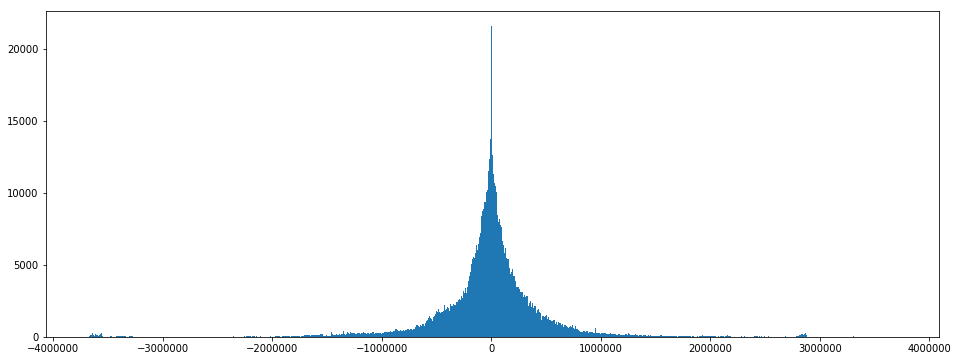

In [15]:
plt.hist(df['nearest HERV dist'], bins='auto')
plt.show()

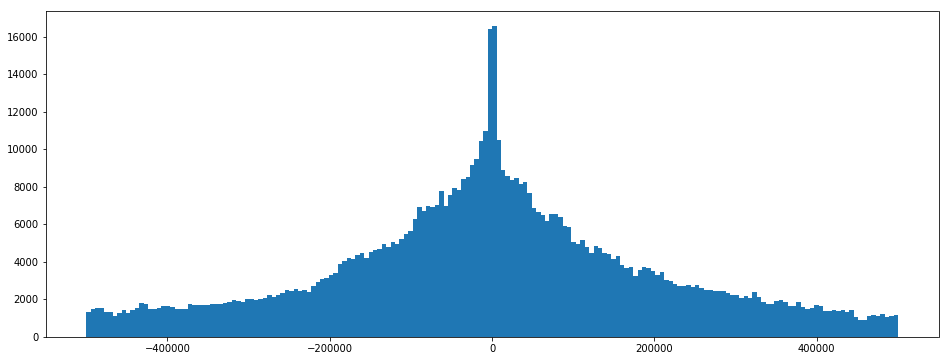

In [16]:
plt.hist(df[df['nearest HERV dist'].abs() < 500000]['nearest HERV dist'], bins='auto')
plt.show()

In [17]:
df[ (df['trinuc_mut'] == 'C[C>T]A' ) & ( df['nearest HERV dist'].abs() < 500000 )]

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
314,chr1,505074,TCCA,CCAT,CCA,C>T,C[C>T]A,+,ATGATAGGACCACTGAACTCCATCCTGAGTGACAGGGCAAG,21,7,4,4,2,2,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,390436.0
322,chr1,511562,GCCA,CCAC,CCA,C>T,C[C>T]A,+,CTGGAATTATAGGGATGTGCCACAACGCCTAGCTAACTGTT,19,2,0,0,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,383948.0
382,chr1,620181,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TCACTTAAAATGCTGTGTCCCACCTCACTTTTCAGTGTCTC,18,6,4,4,2,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,275329.0
487,chr1,744312,CCCA,CCAA,CCA,C>T,C[C>T]A,+,TGGTCAACTTGTAGCACCCCCAAGCTCGCAGGACATATGCT,22,3,1,1,0,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,151198.0
583,chr1,826352,GCCA,CCAT,CCA,C>T,C[C>T]A,+,TGGAAACTTTATGCCACAGCCATTAAATACAGAGATCATAC,15,4,2,2,0,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510.0,69158.0
1104,chr1,1743851,ACCA,CCAA,CCA,C>T,C[C>T]A,+,TGATGAAACTCCGTCTCTACCAAAAATACAAAAATTAGCCA,14,5,3,3,1,1,NaN,"END_ERV_0216552,HERVIP10F-int,LTR10A",1511404.0,-232447.0
1197,chr1,1964784,TCCA,CCAT,CCA,C>T,C[C>T]A,+,TGGGCGACAGAGTGAGACTCCATCTCAAAAAAAAGCAAAAG,18,7,3,3,2,0,NaN,"BEGIN_ERV_0001783,HERV16-int",2009838.0,45054.0
1210,chr1,1969238,CCCA,CCAG,CCA,C>T,C[C>T]A,+,CAGCCCTGCCCTGCCCAACCCAGCCCTGCCCAGCCCTGCCC,32,0,0,0,0,0,NaN,"BEGIN_ERV_0001783,HERV16-int",2009838.0,40600.0
1503,chr1,2653081,ACCA,CCAA,CCA,C>T,C[C>T]A,+,CTGAACGCACGGAGCAGCACCAAAACCCCTAGGGGAGCATC,25,4,1,1,1,0,NaN,"END_ERV_0002181,HERVL-int",2626288.0,-26793.0
1516,chr1,2654165,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TGAACGCACGGAGCAGCACCCACACCCCCAGGCGAGCATCC,28,4,1,1,1,0,NaN,"END_ERV_0002181,HERVL-int",2626288.0,-27877.0


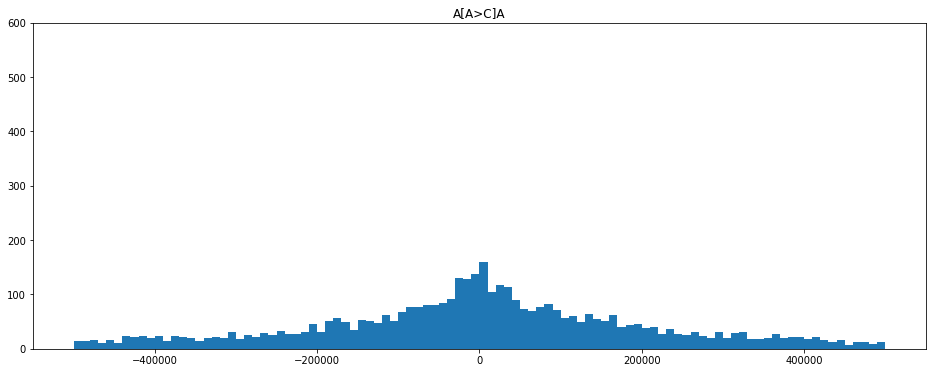

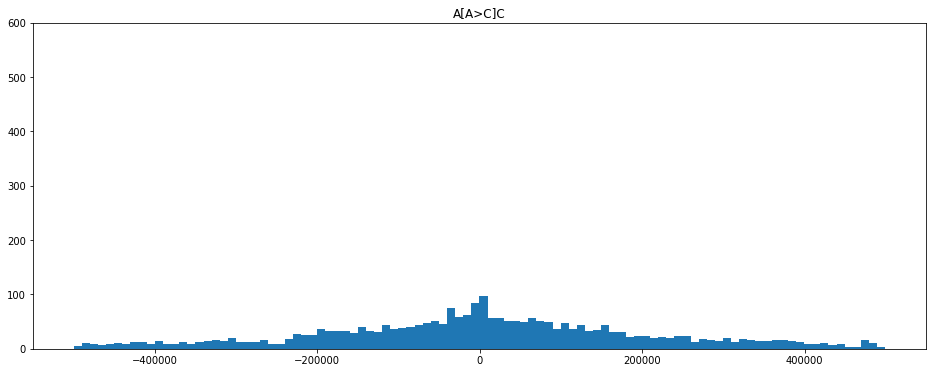

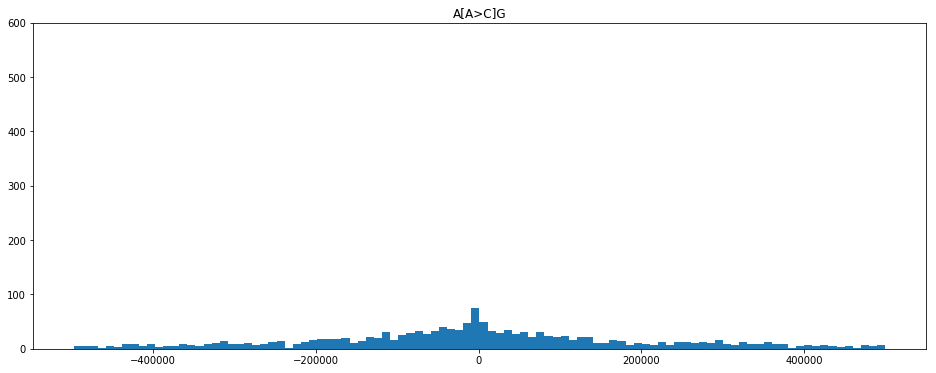

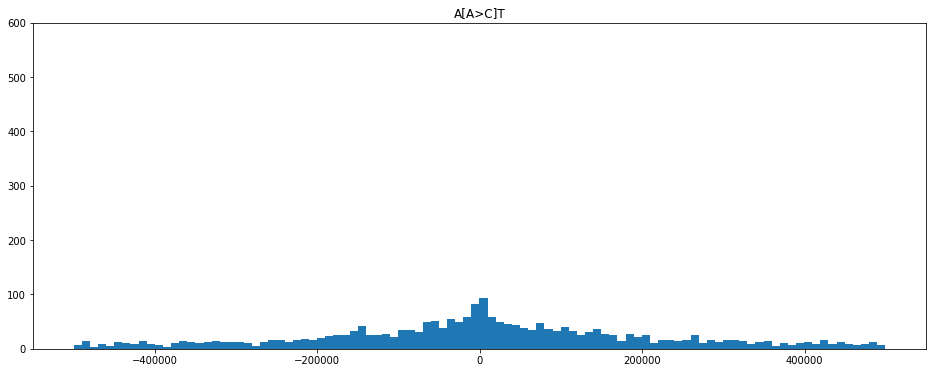

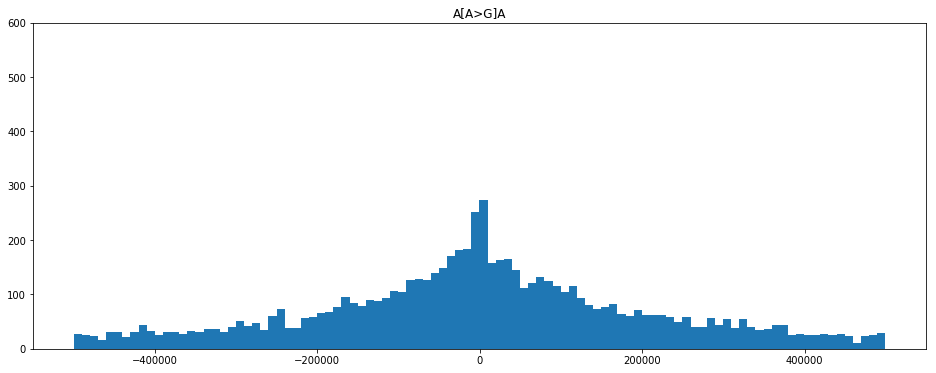

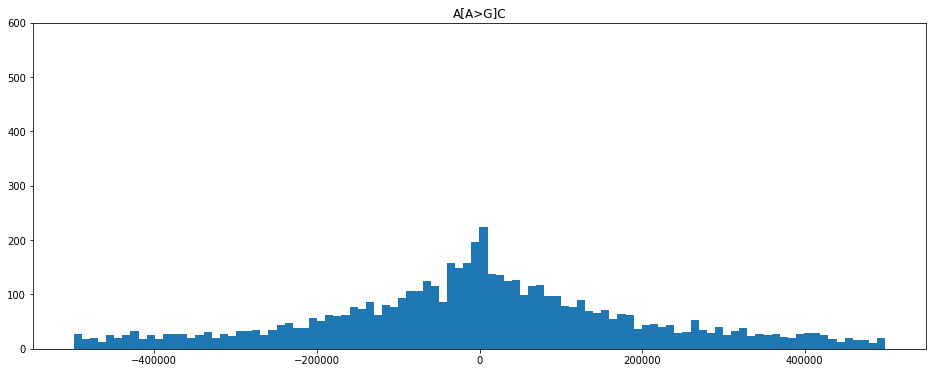

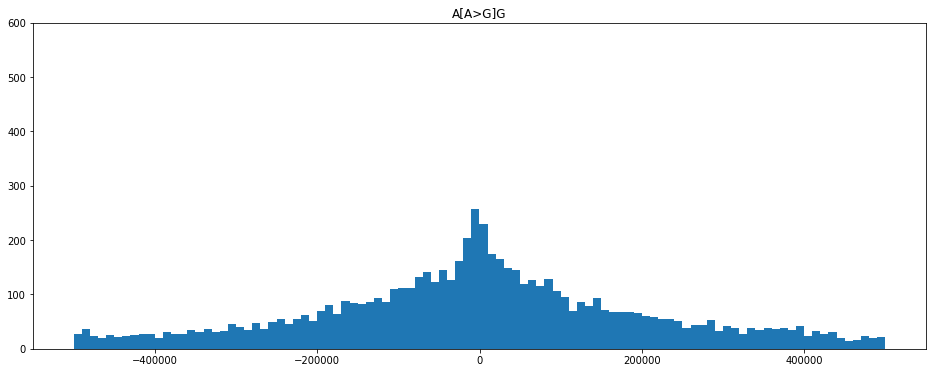

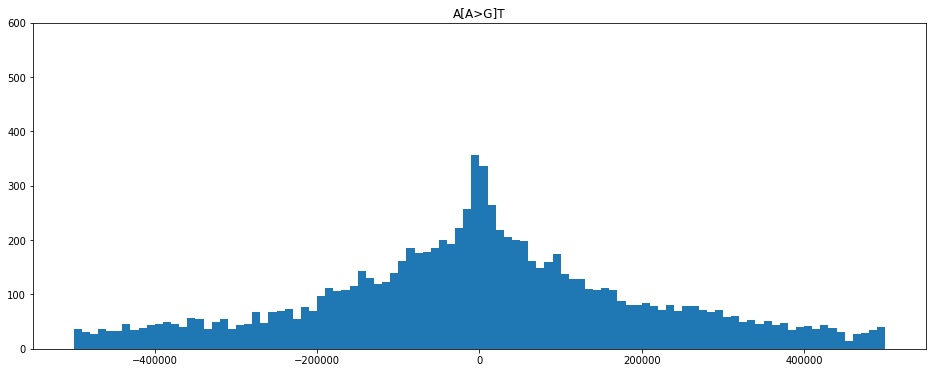

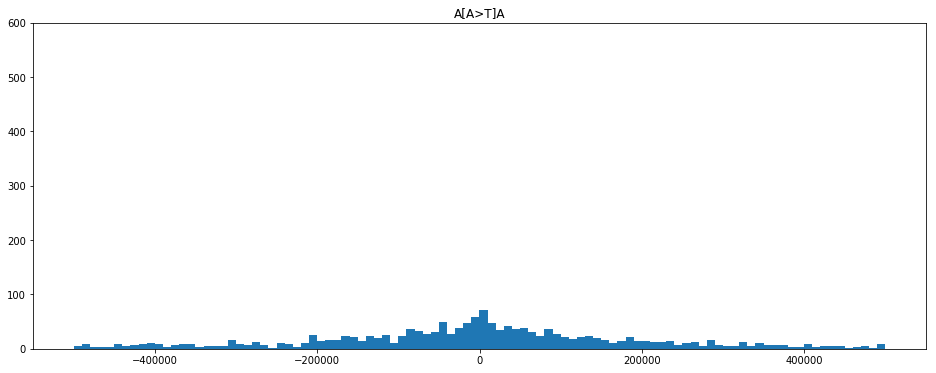

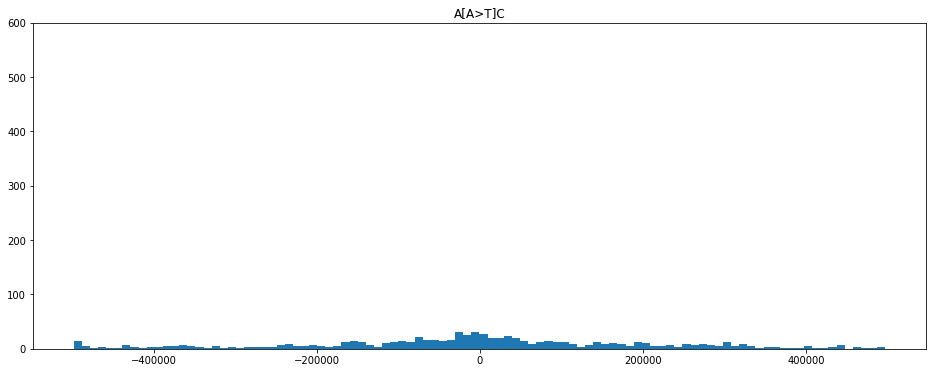

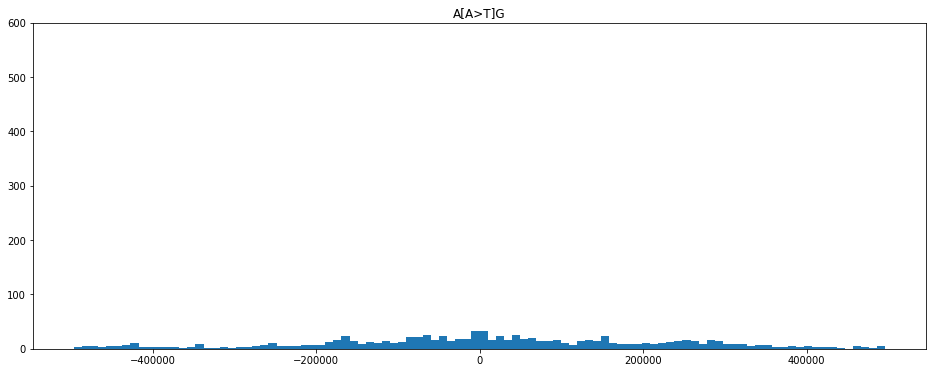

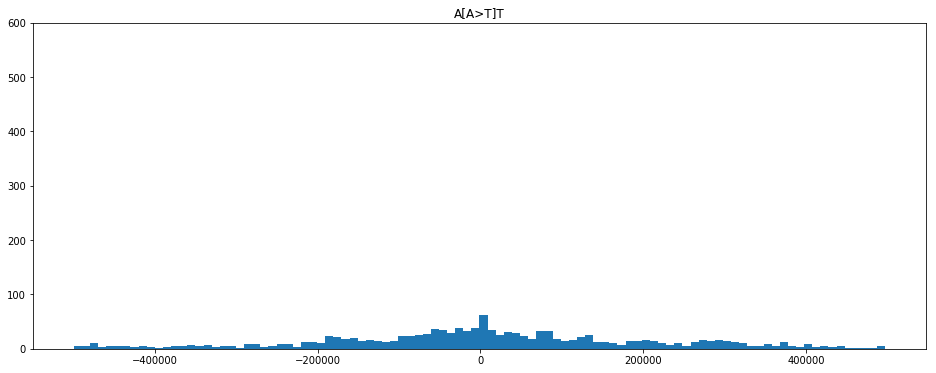

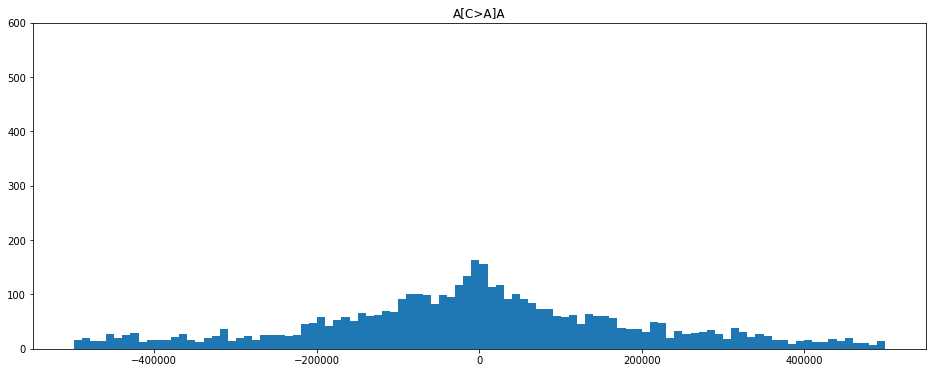

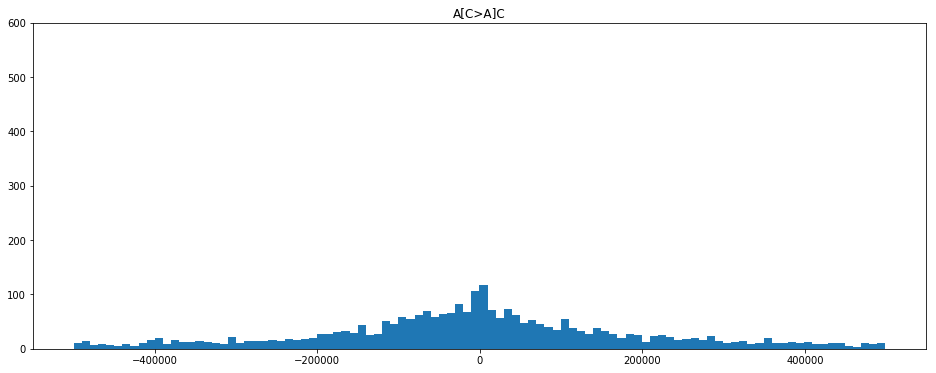

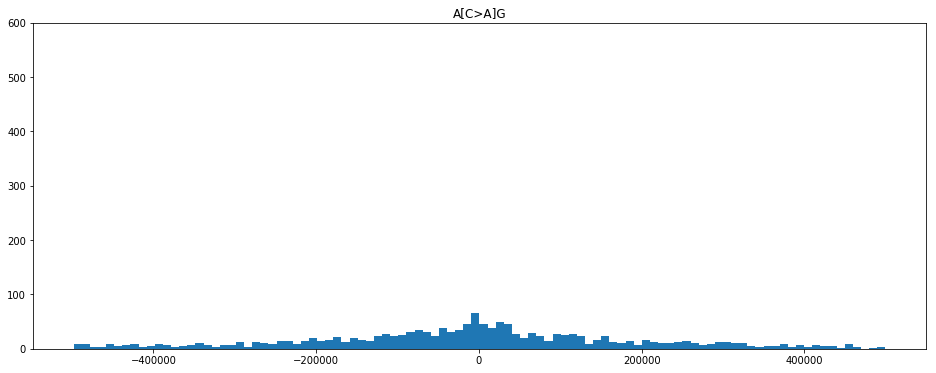

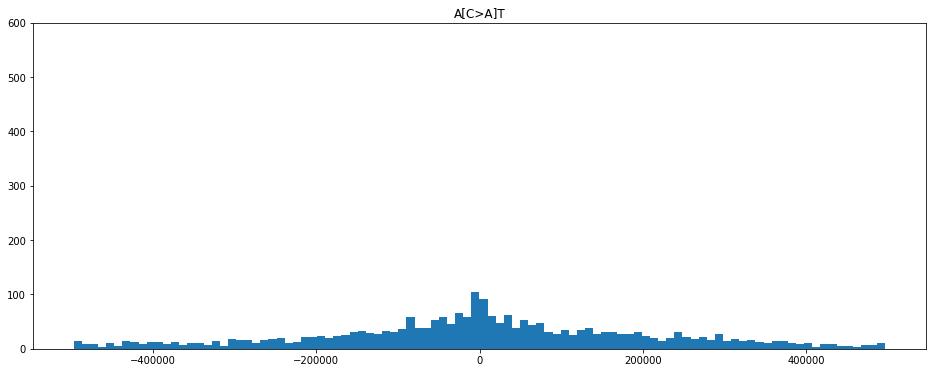

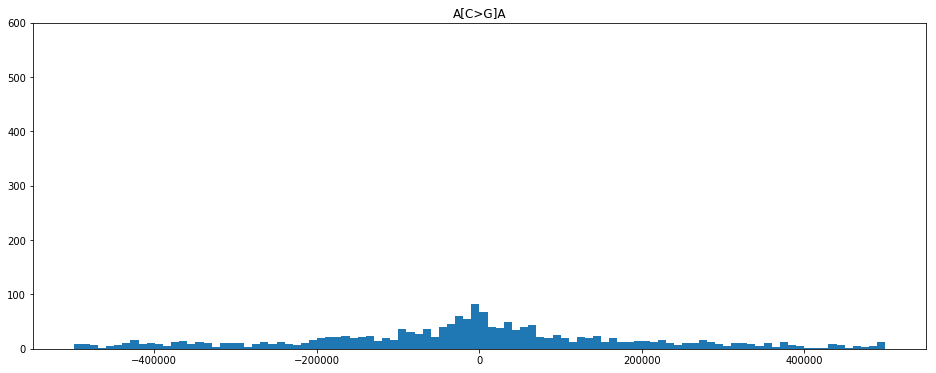

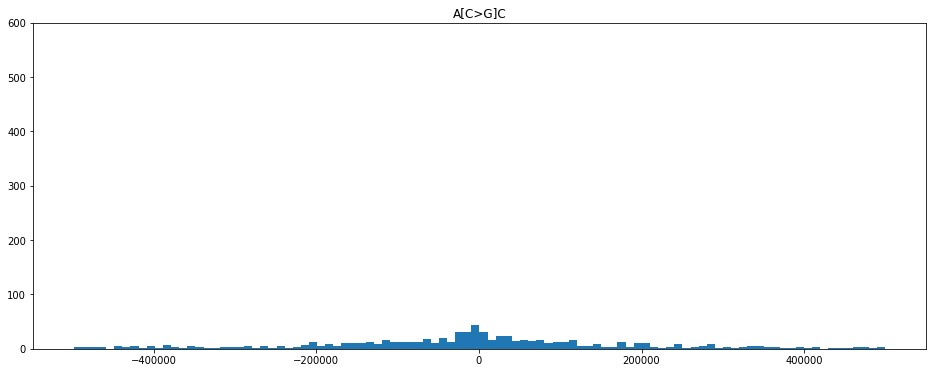

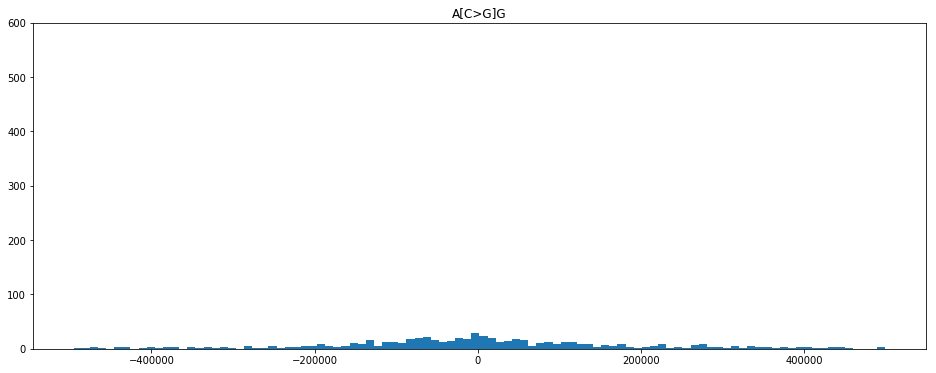

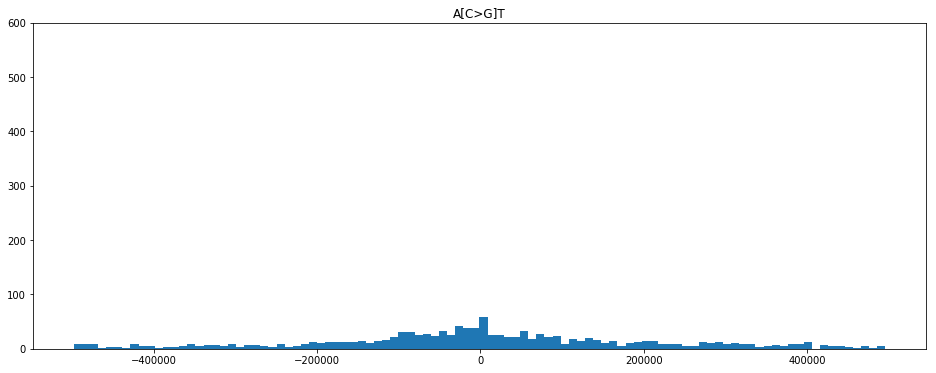

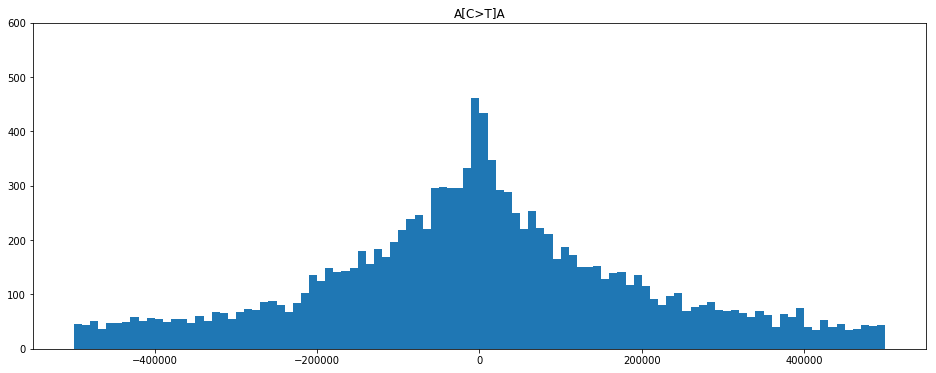

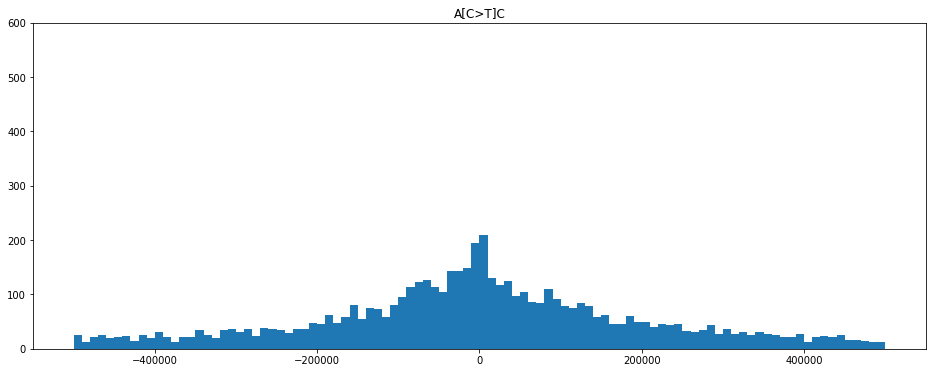

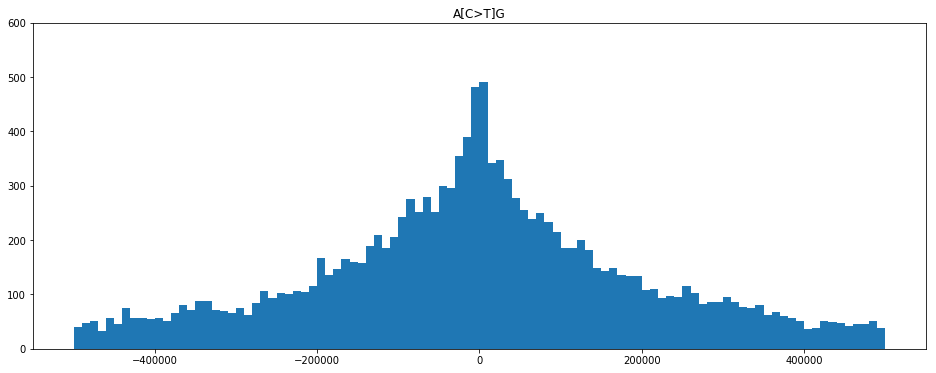

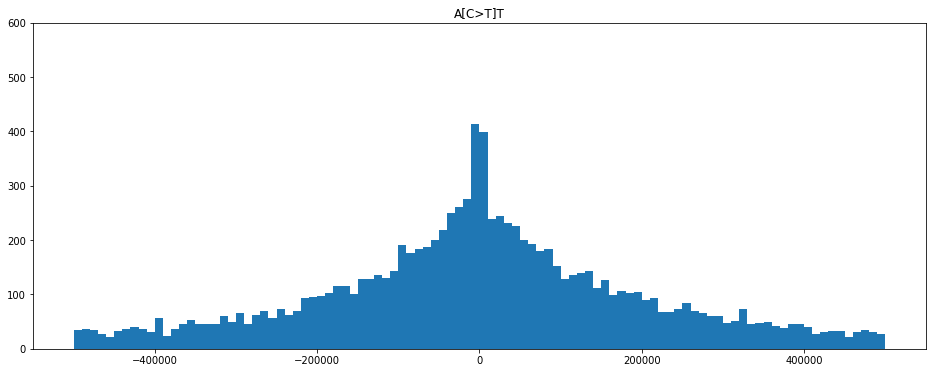

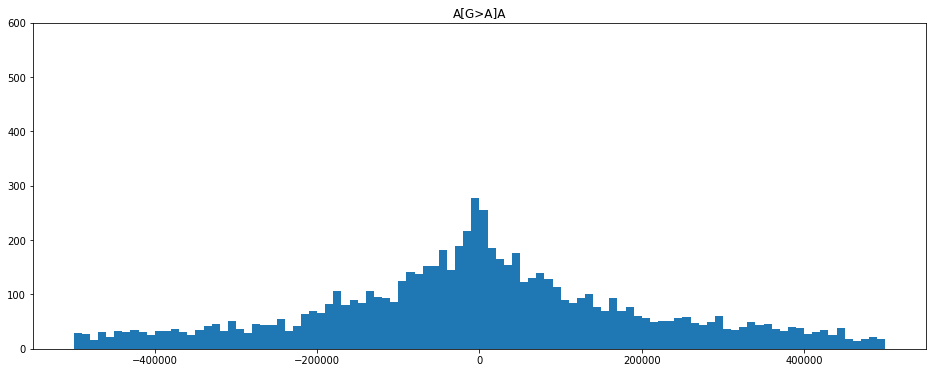

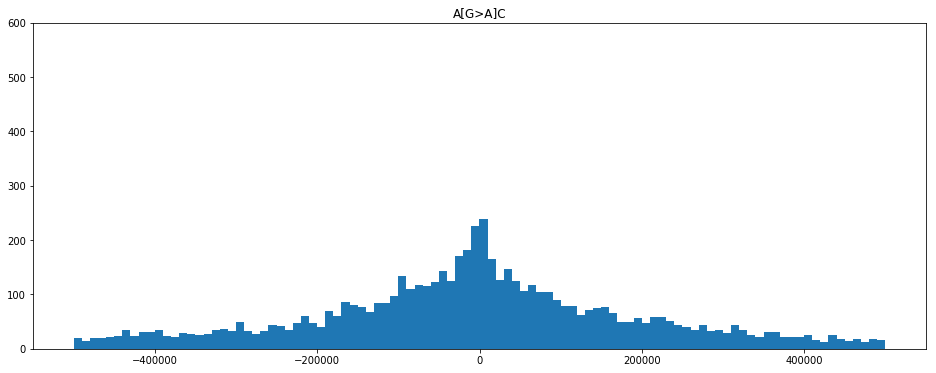

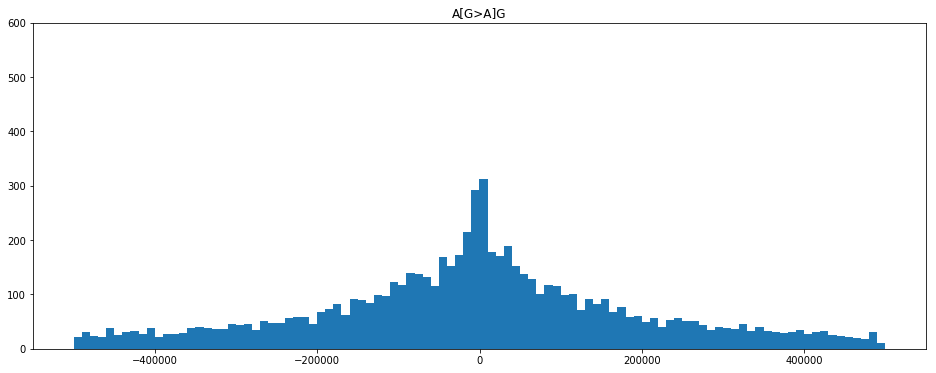

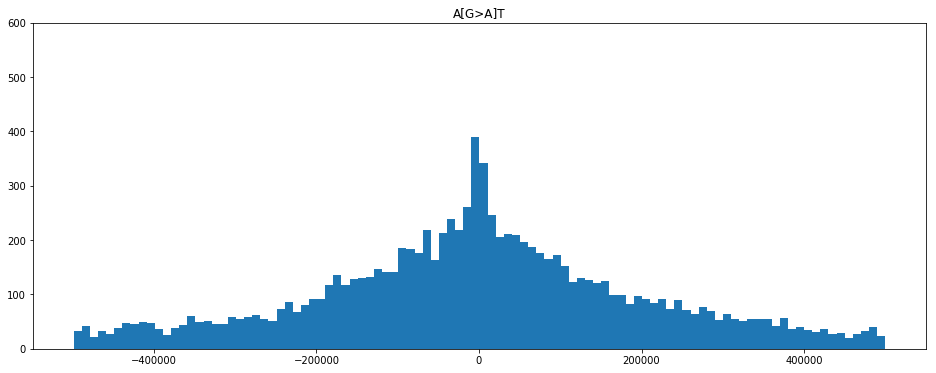

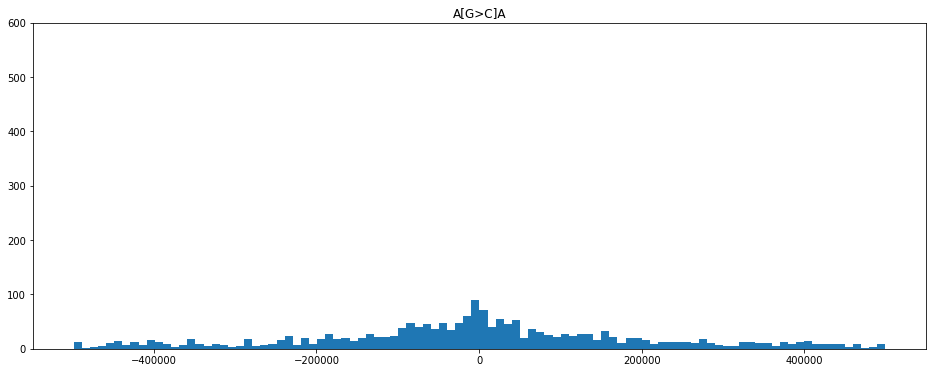

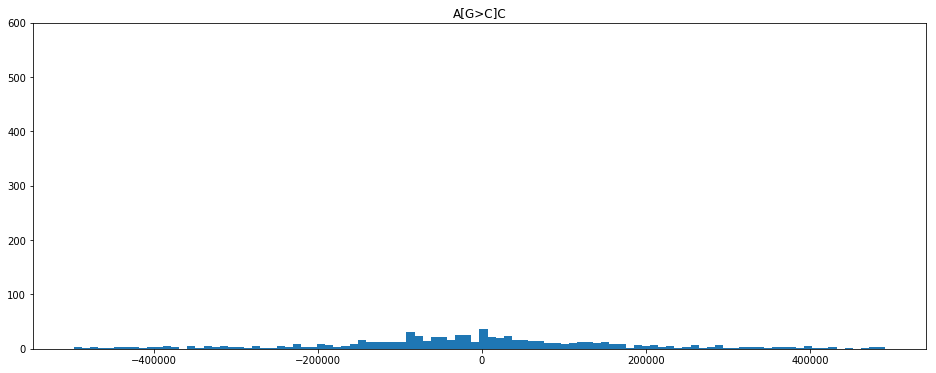

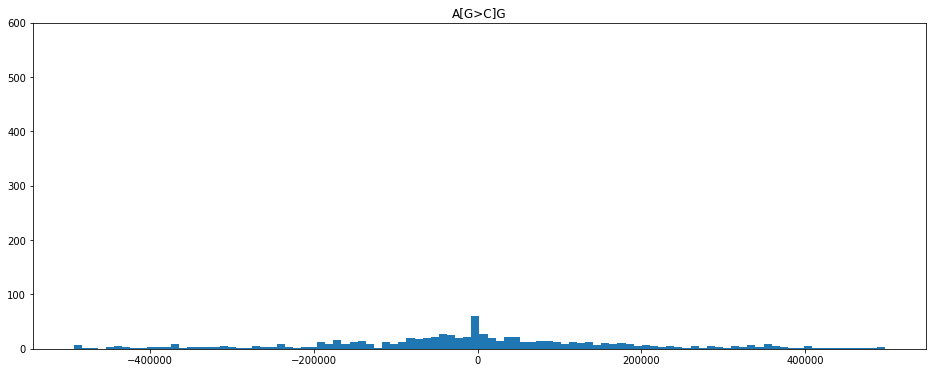

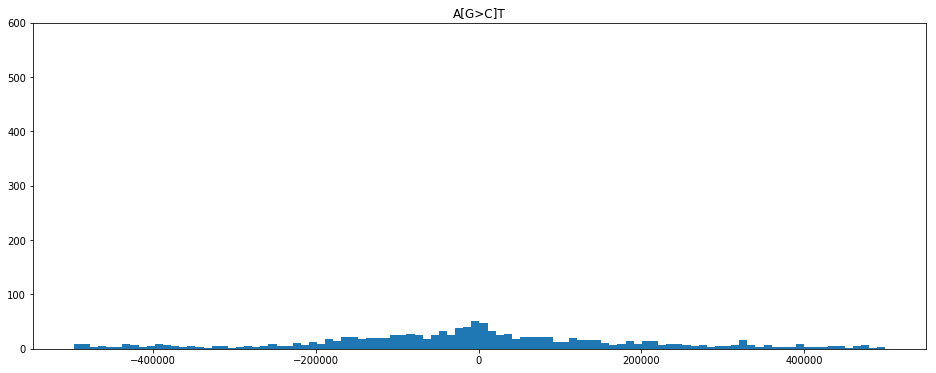

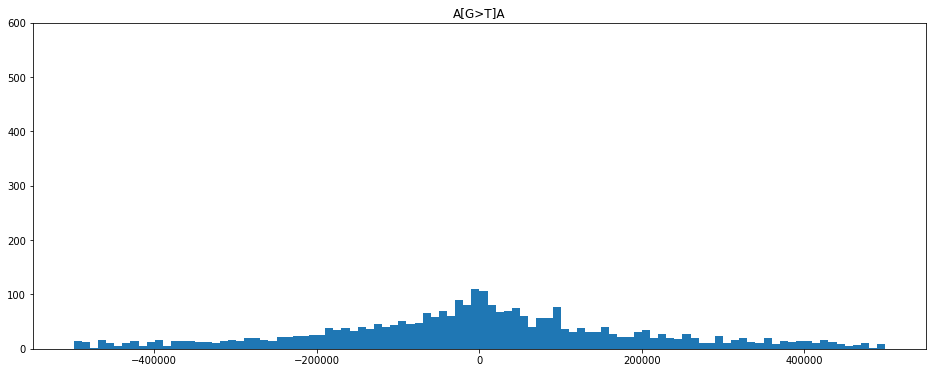

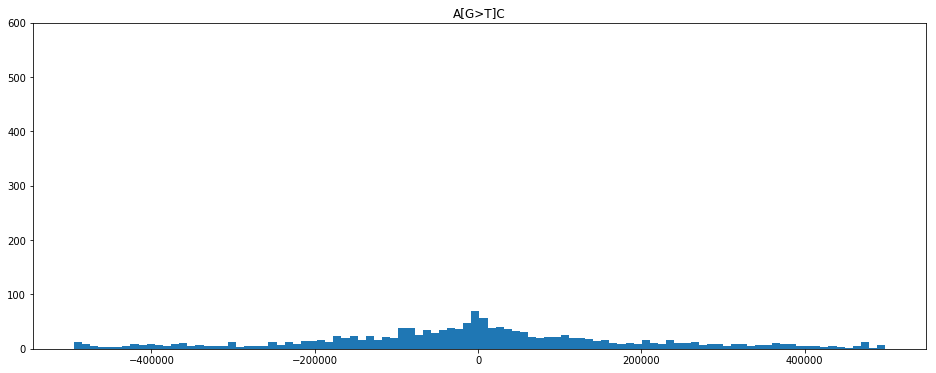

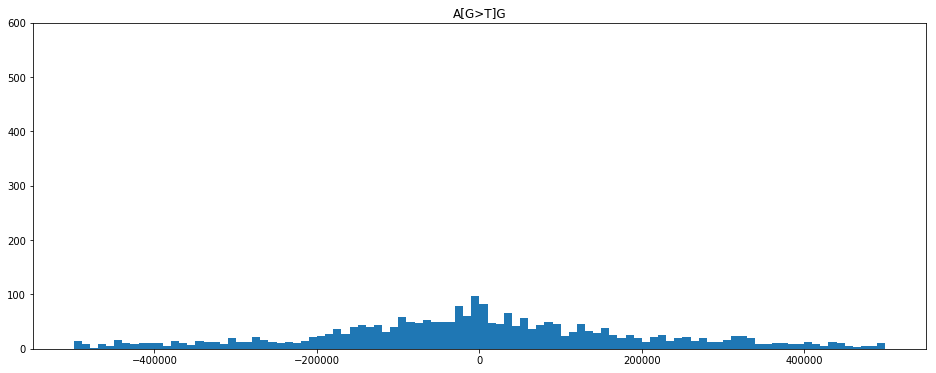

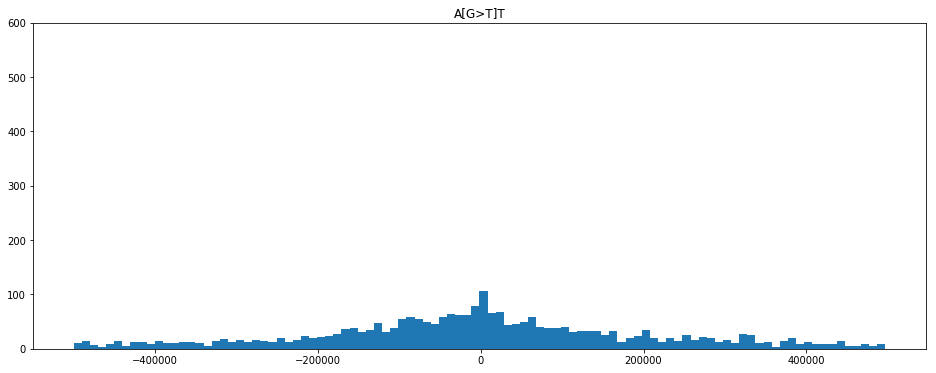

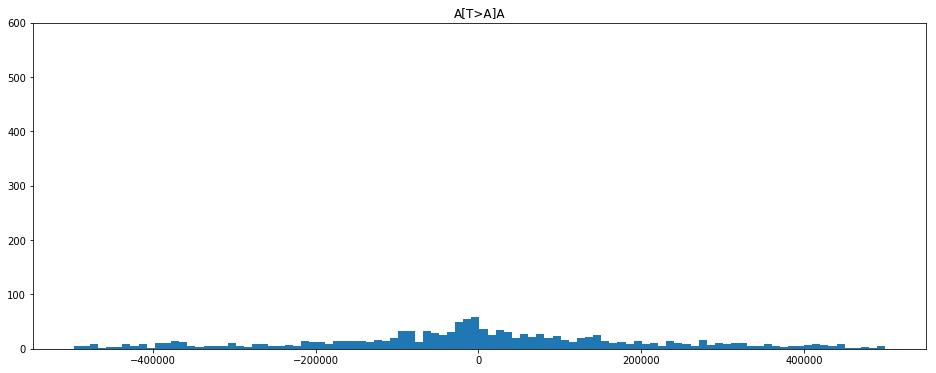

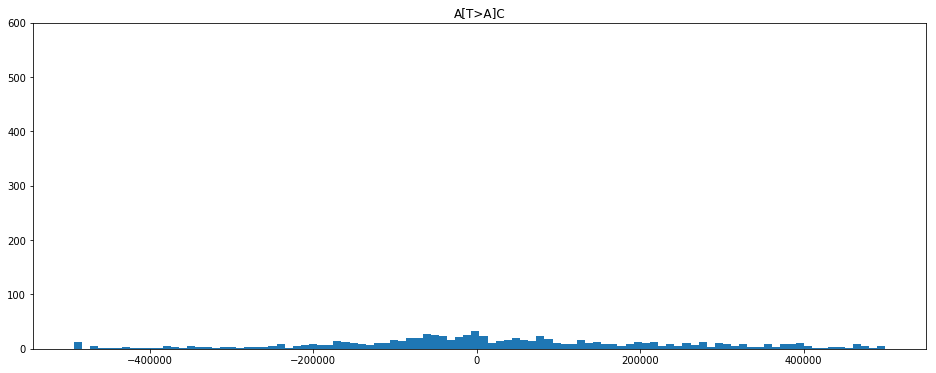

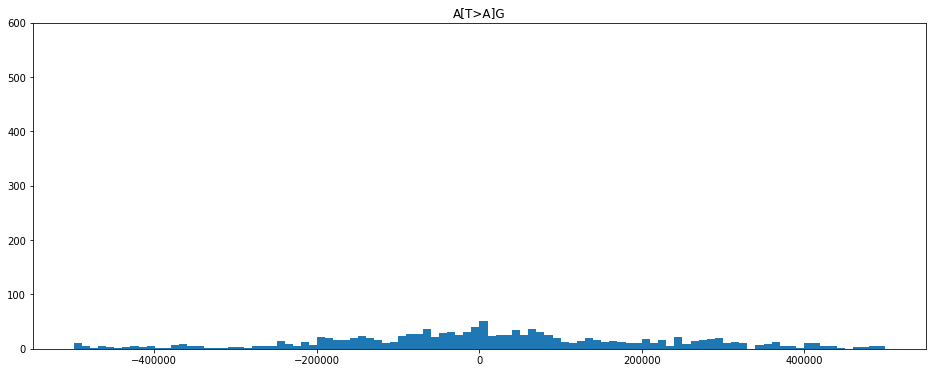

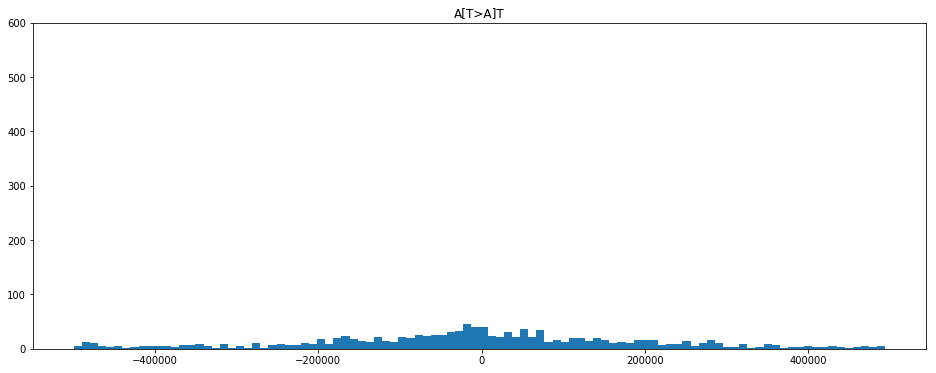

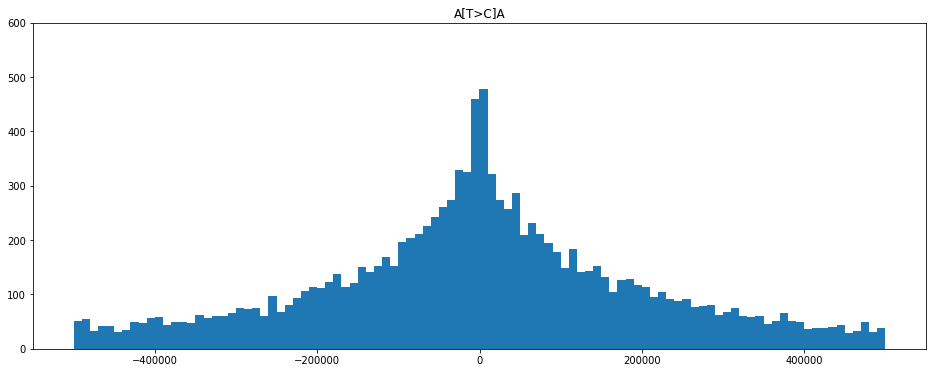

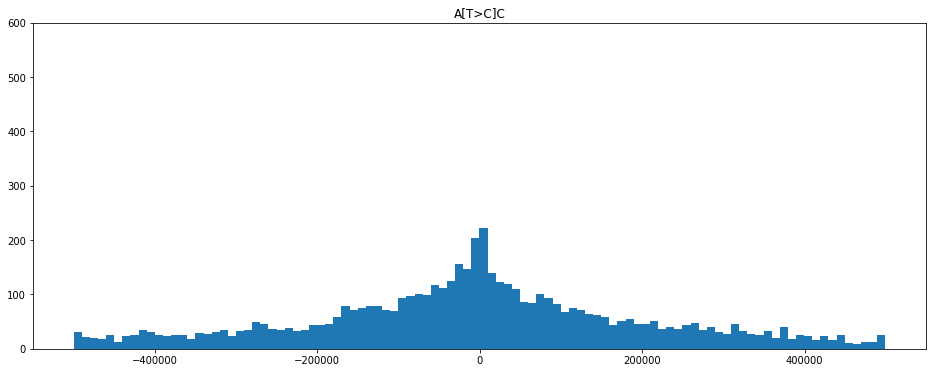

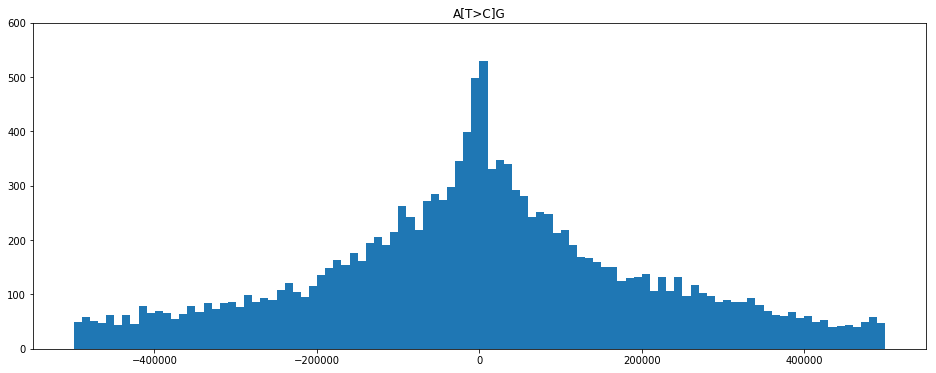

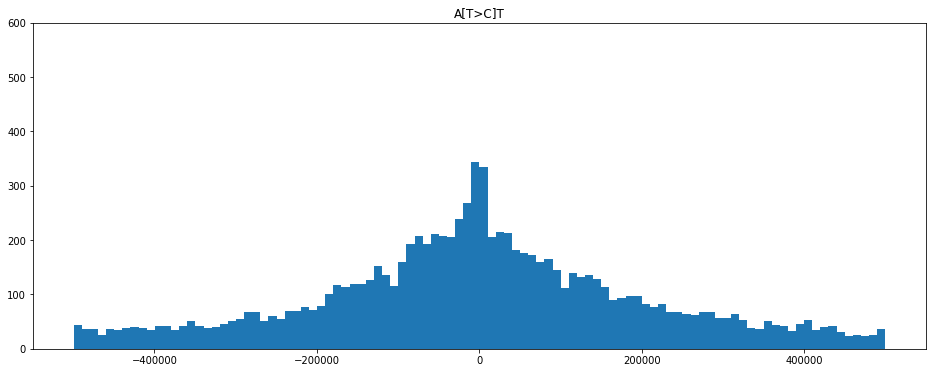

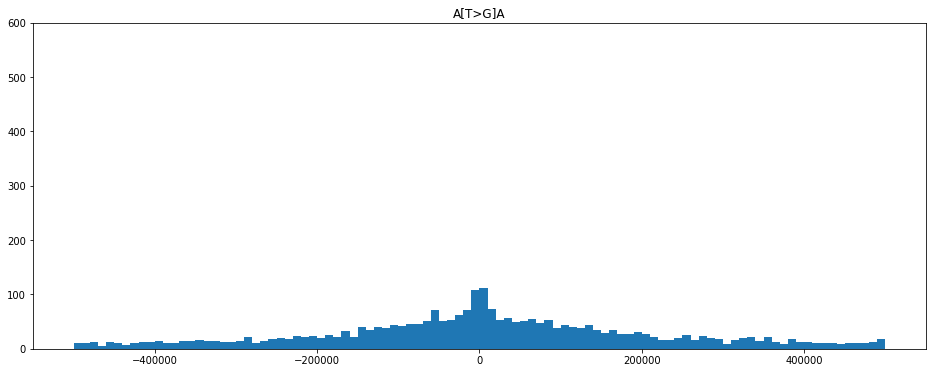

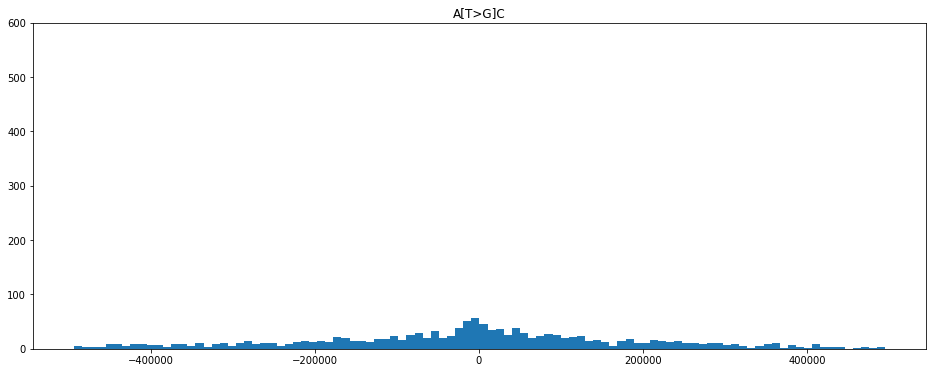

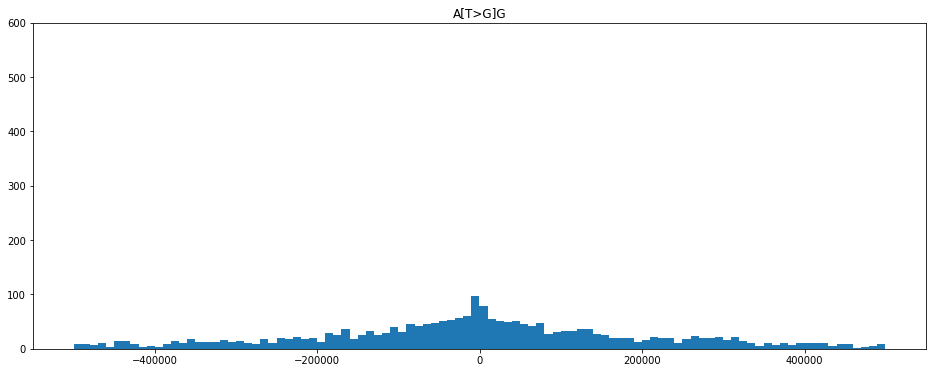

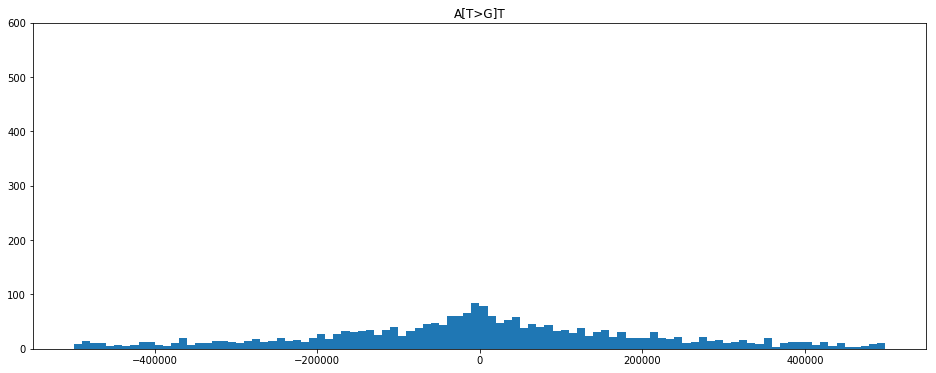

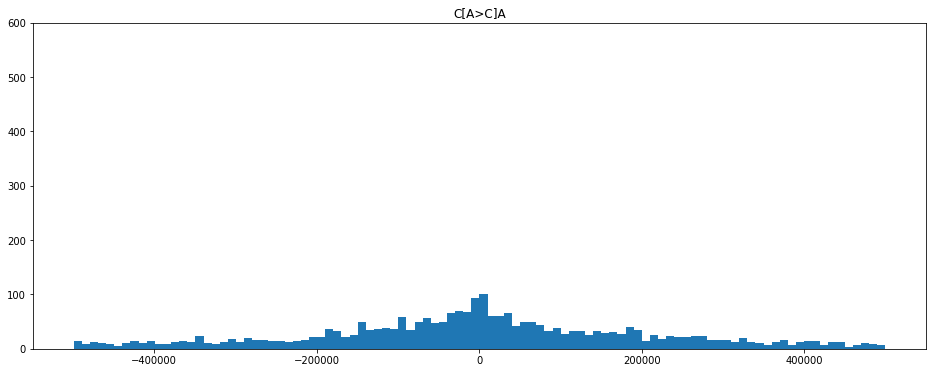

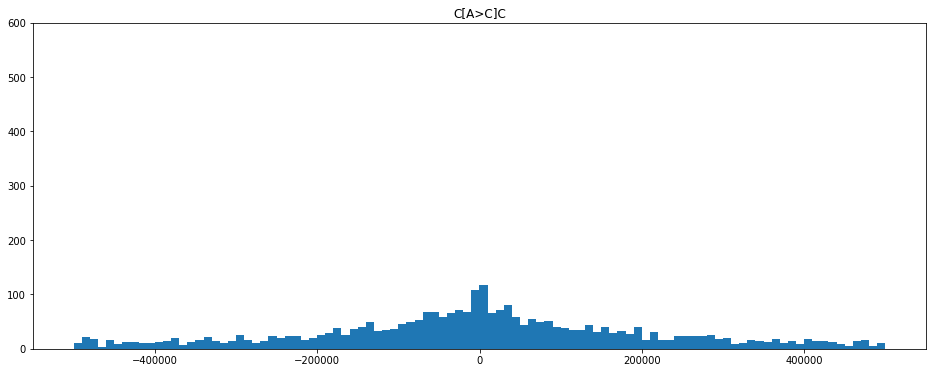

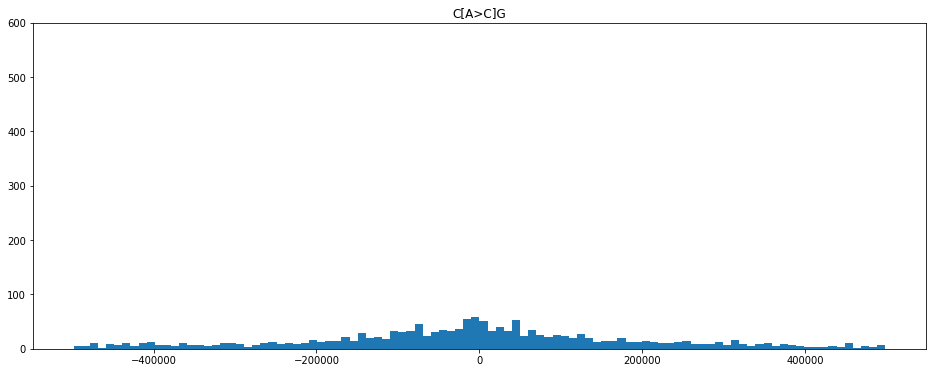

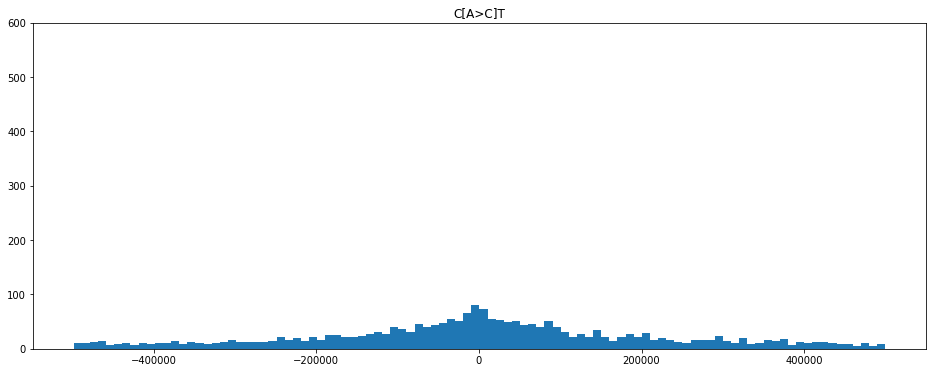

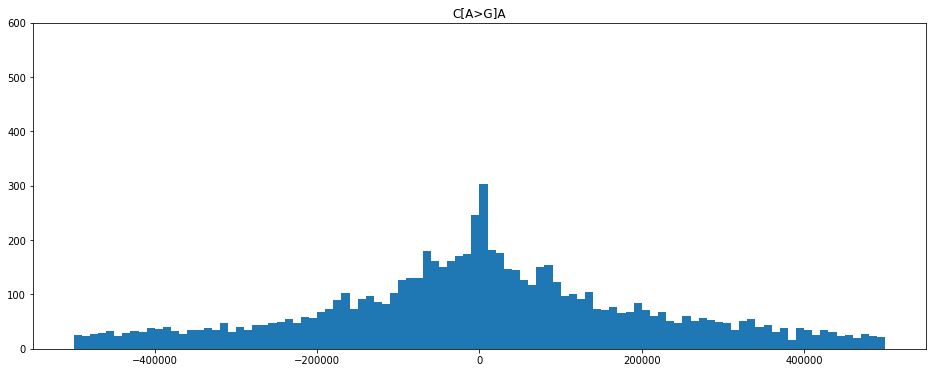

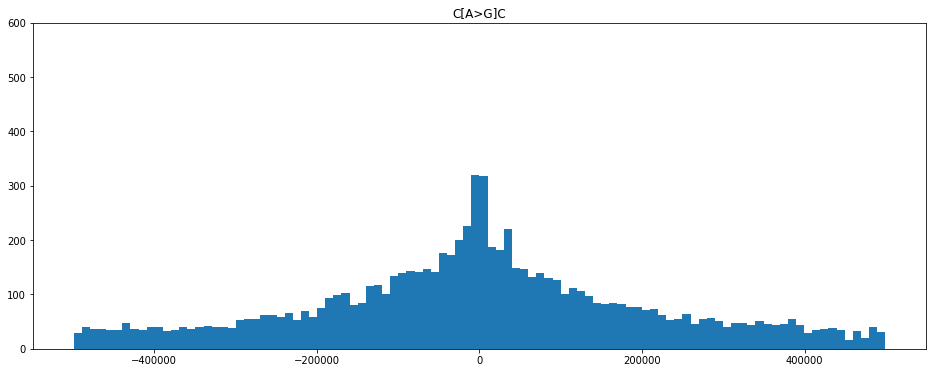

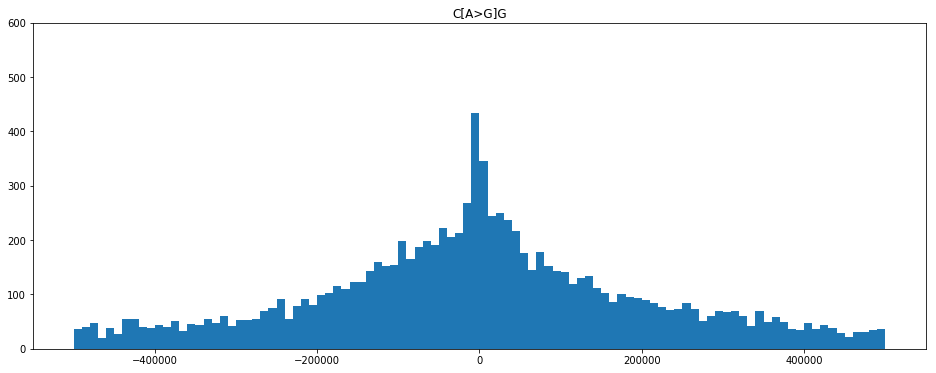

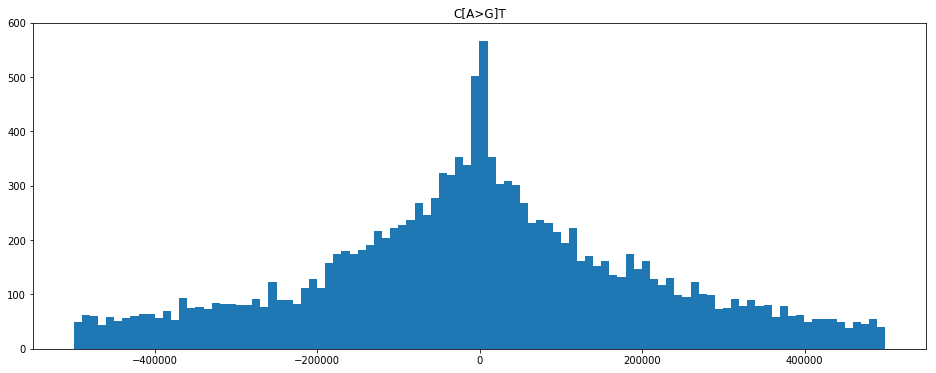

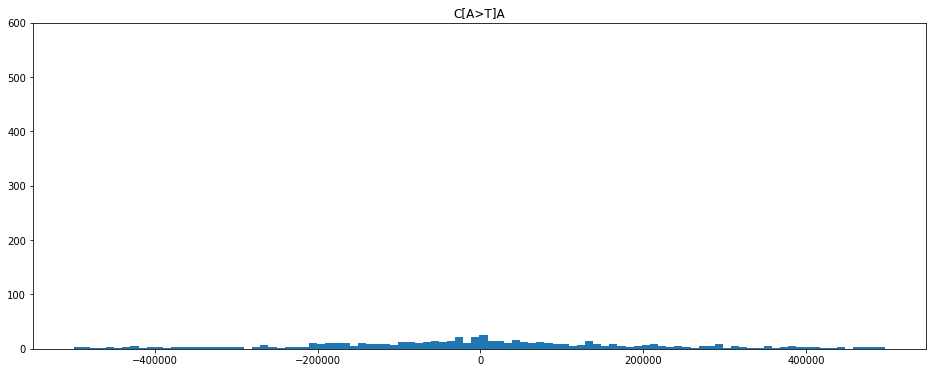

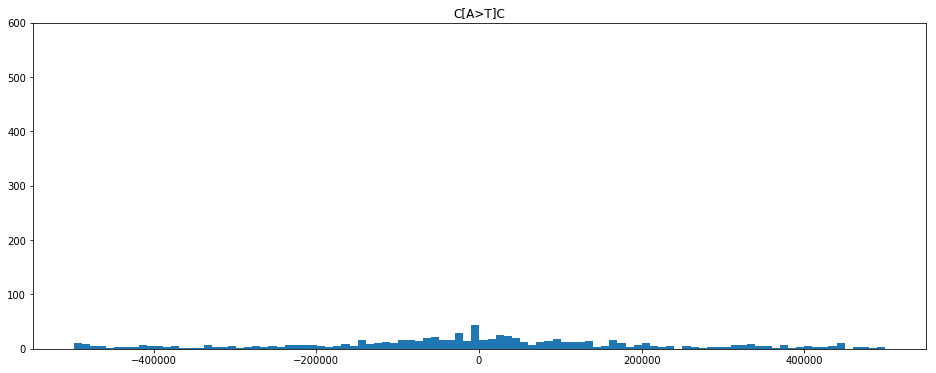

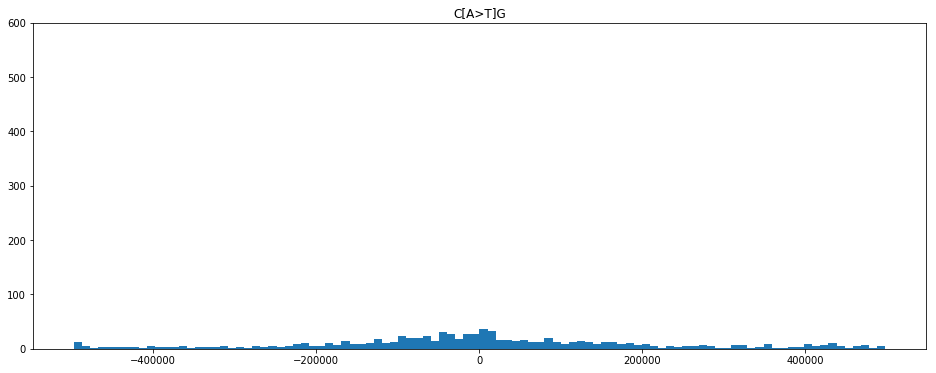

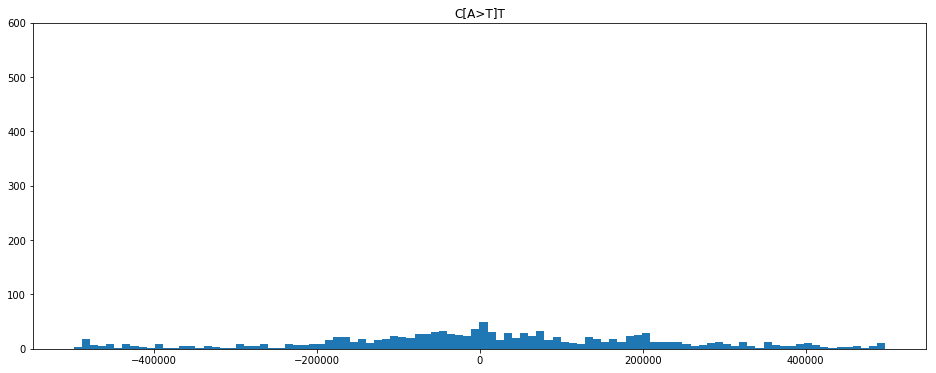

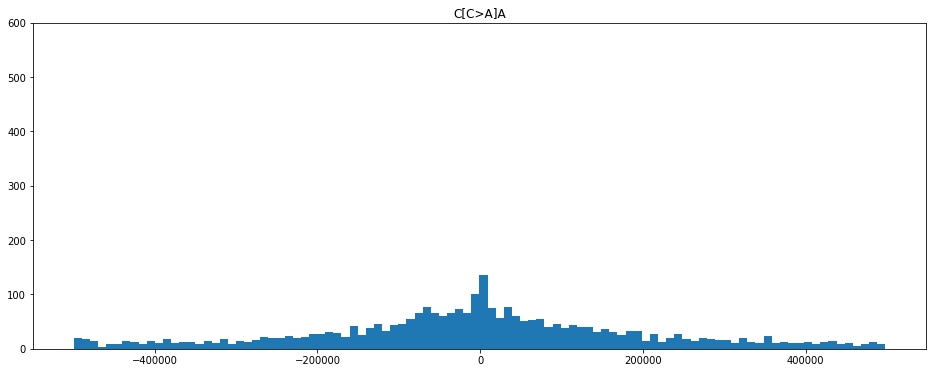

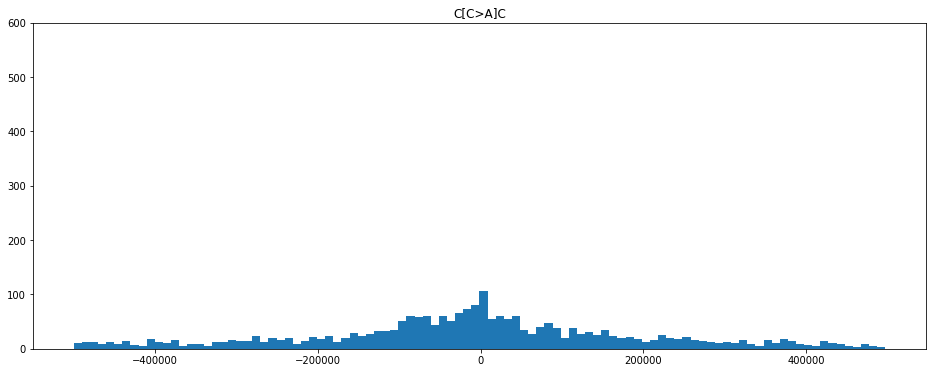

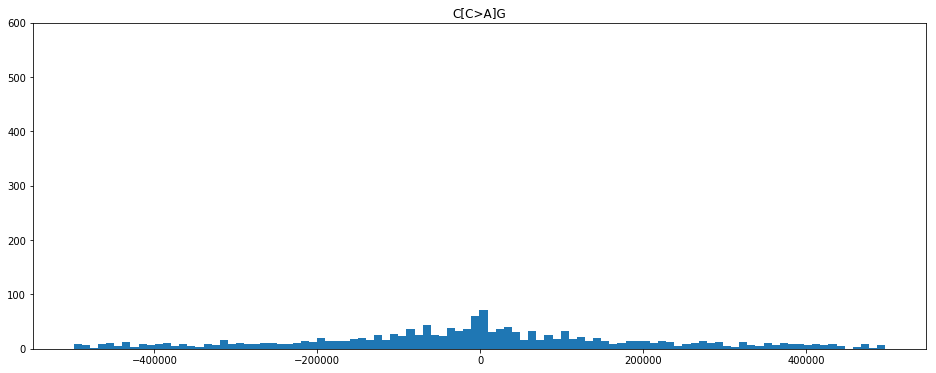

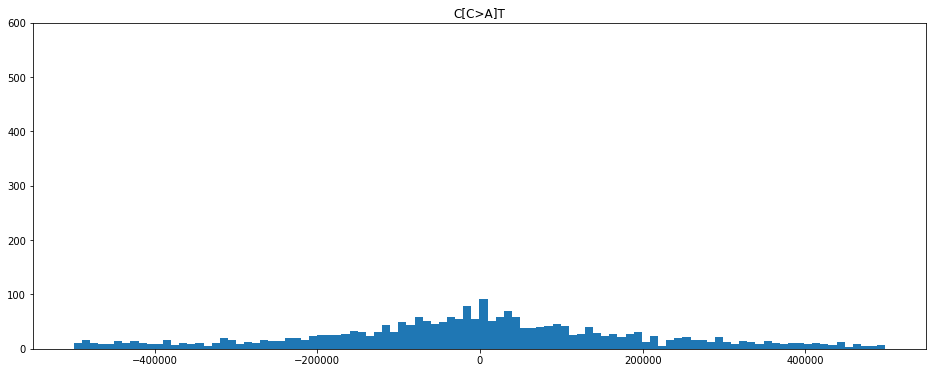

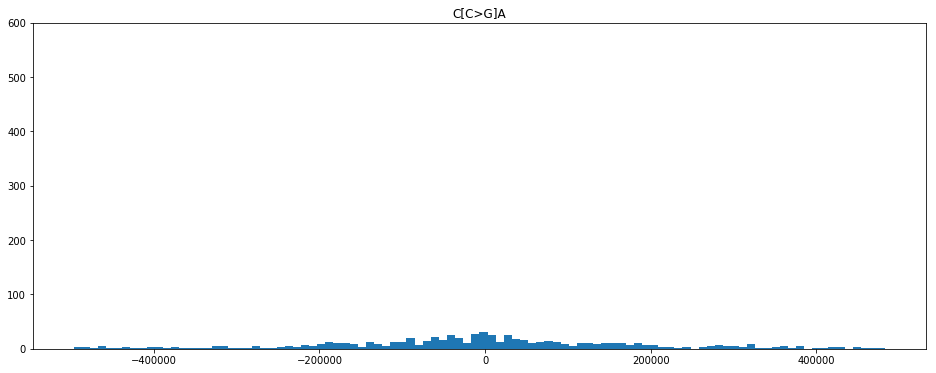

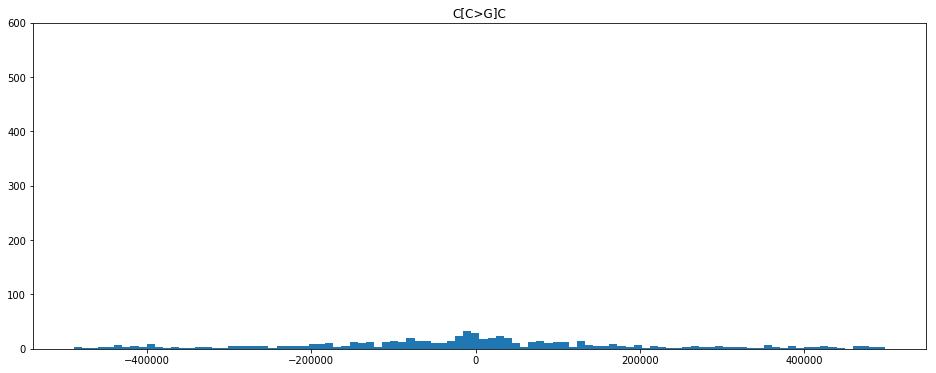

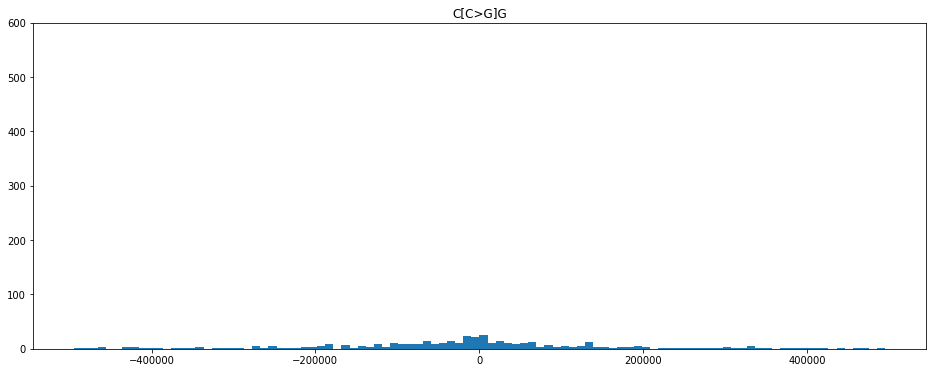

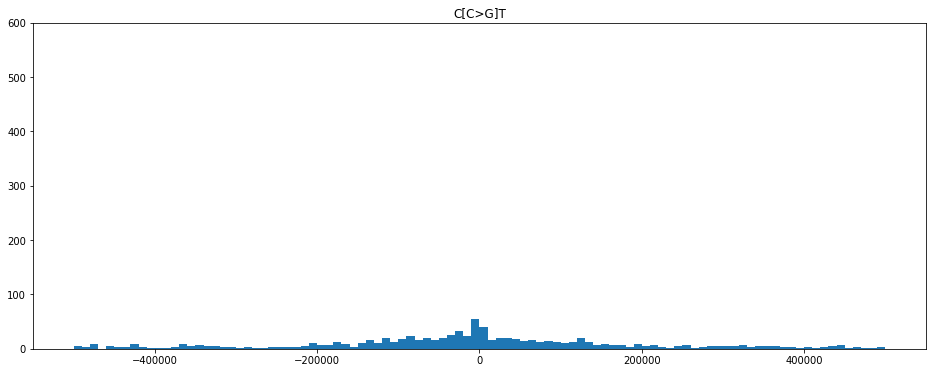

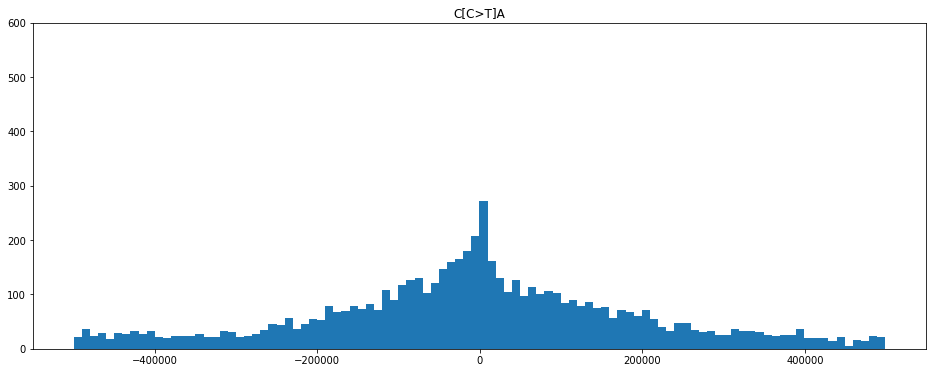

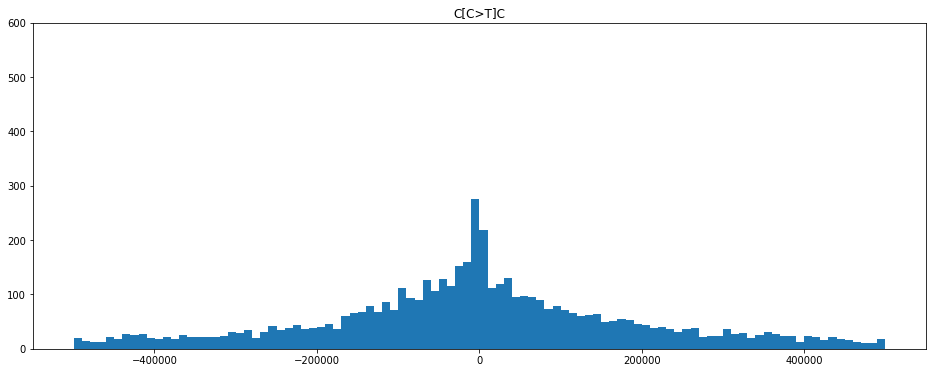

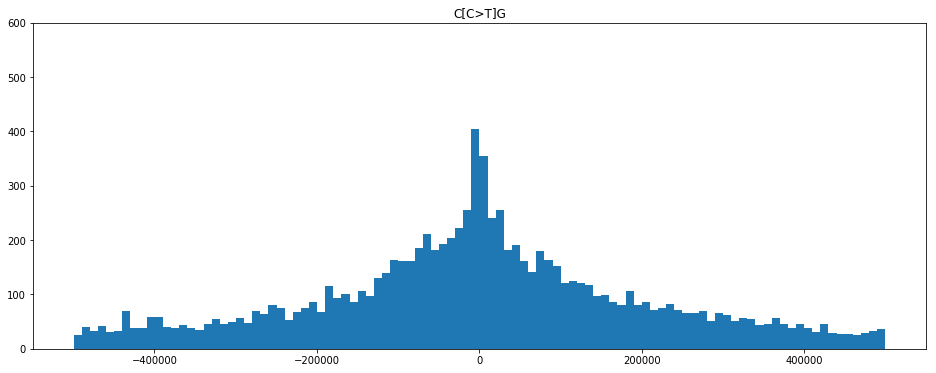

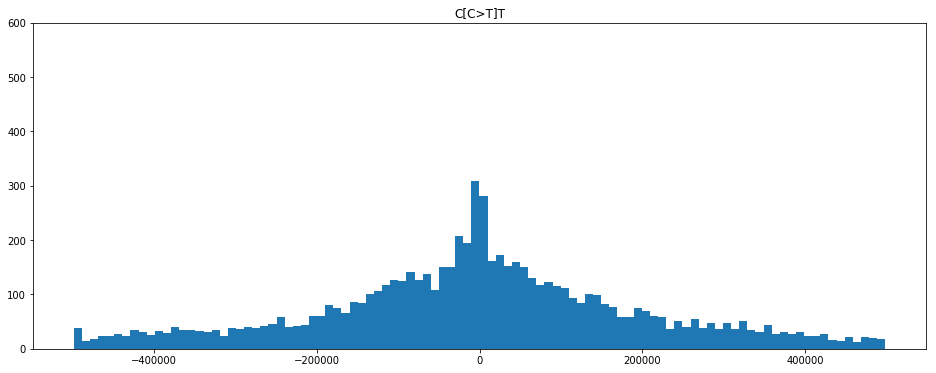

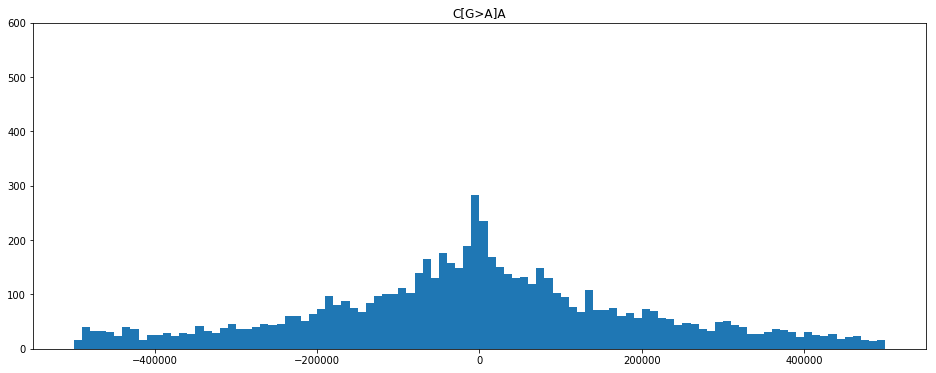

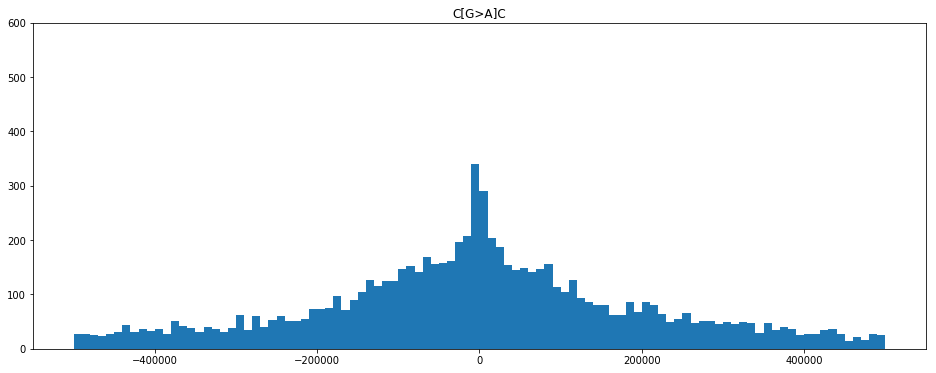

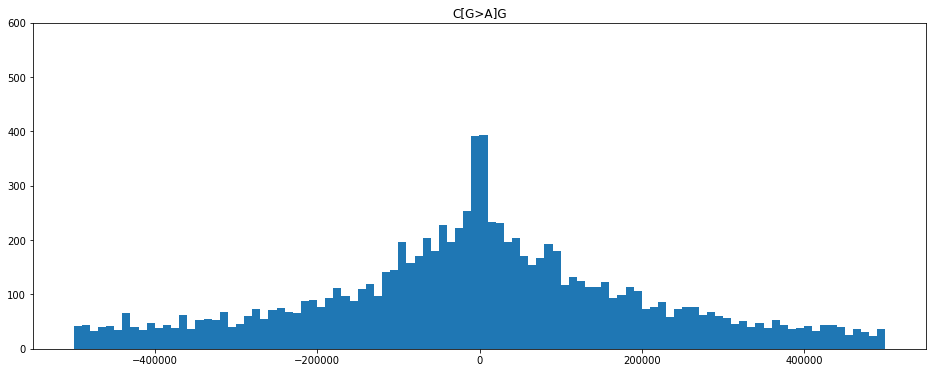

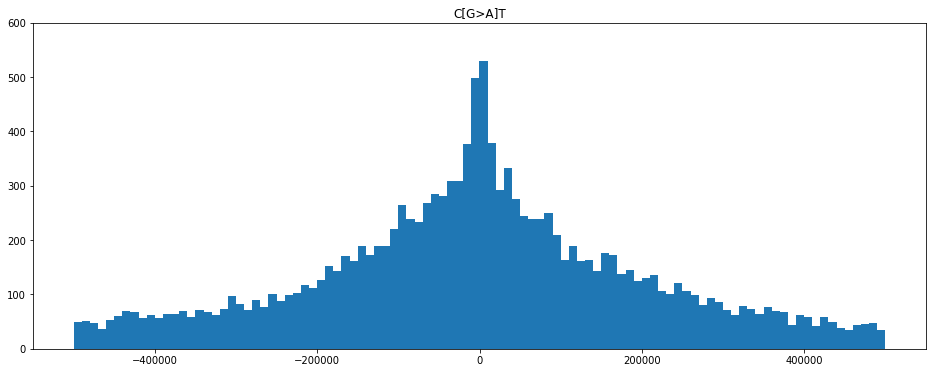

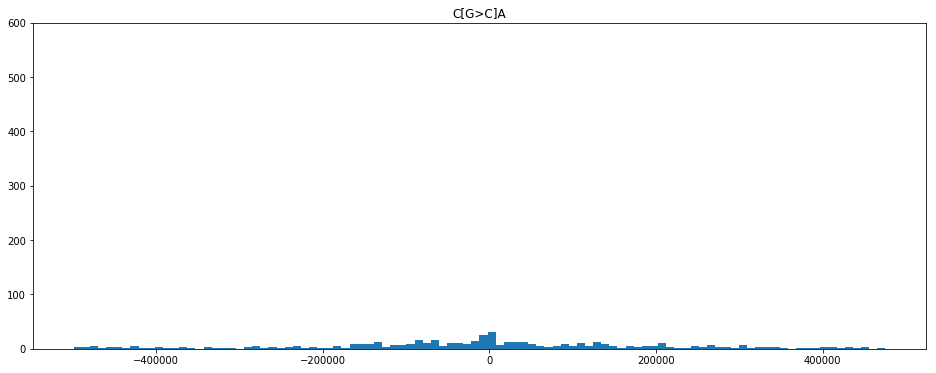

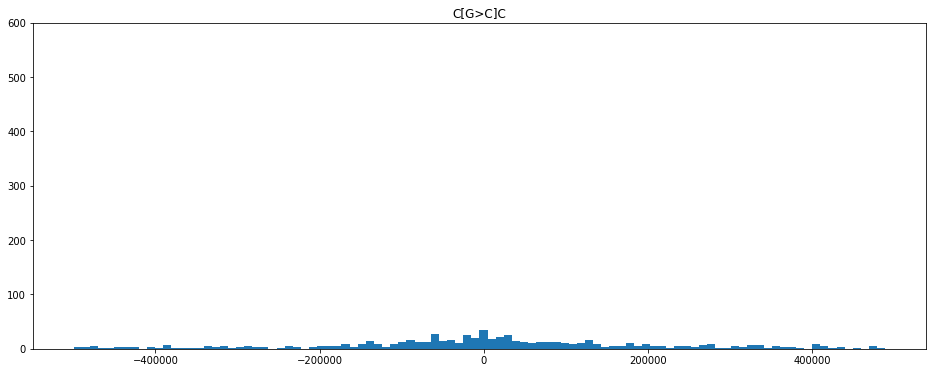

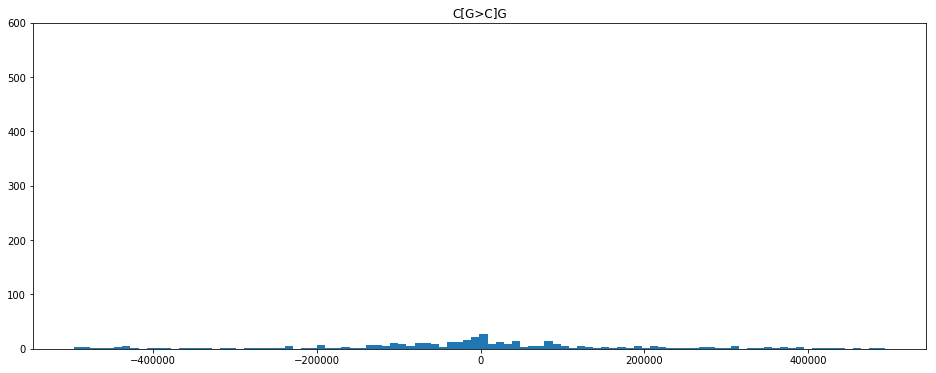

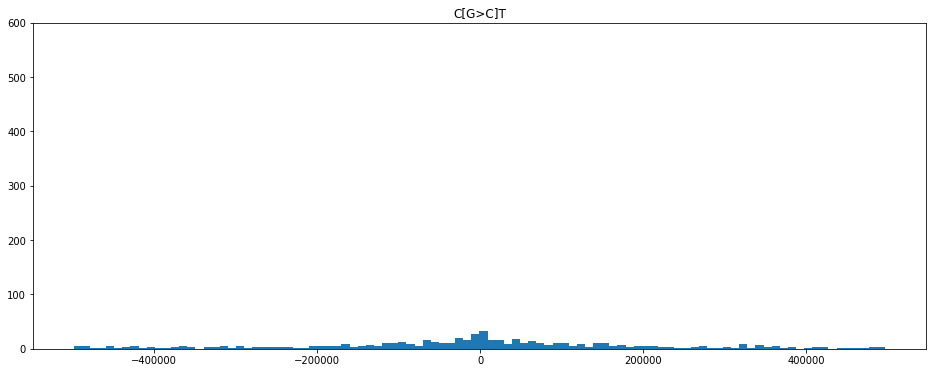

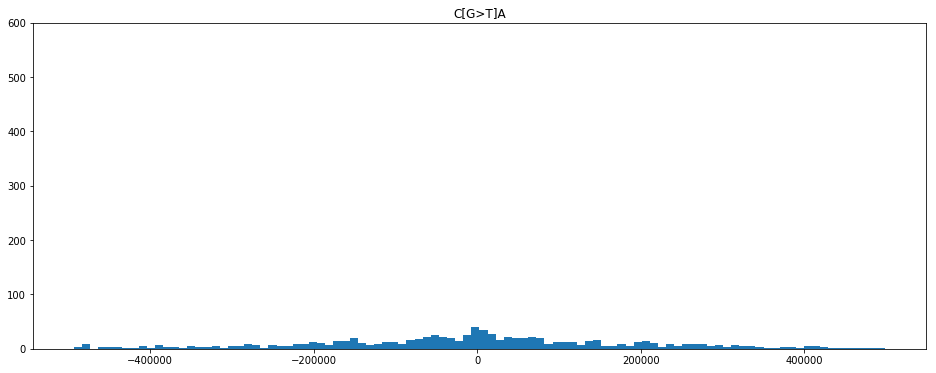

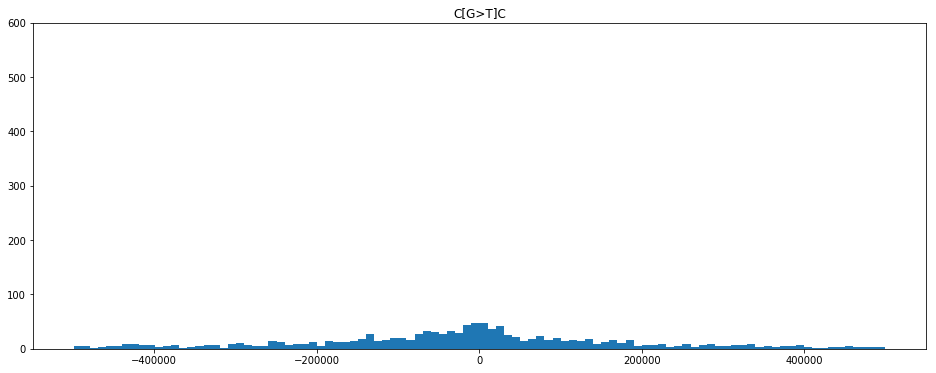

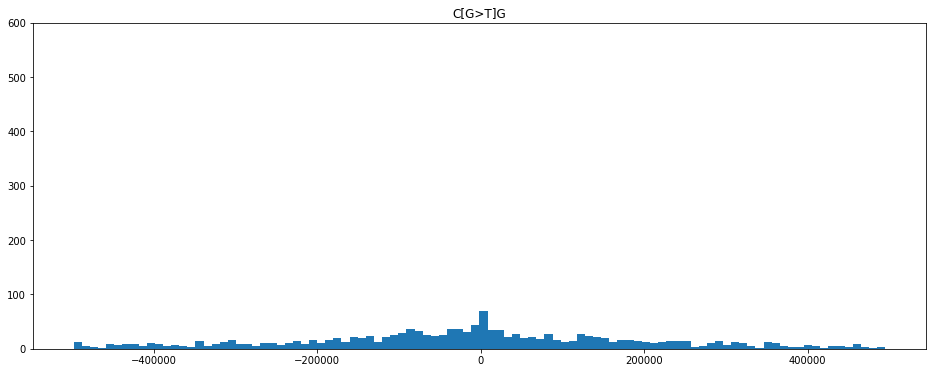

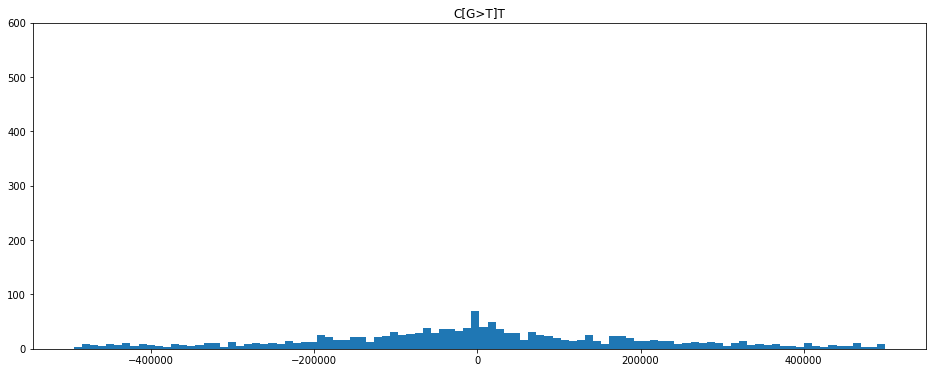

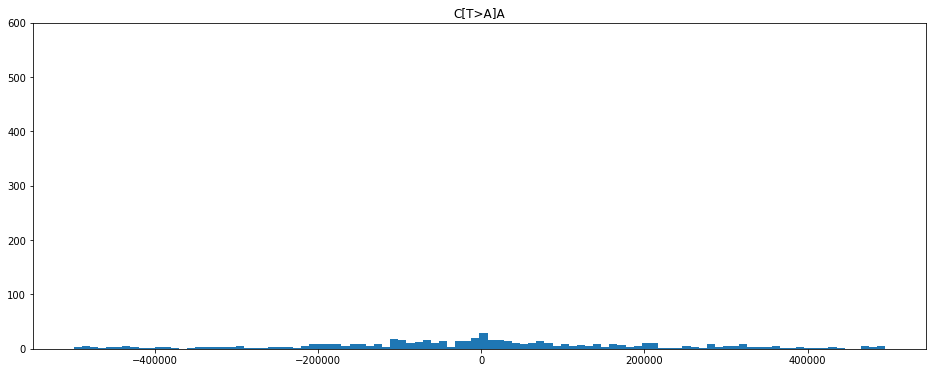

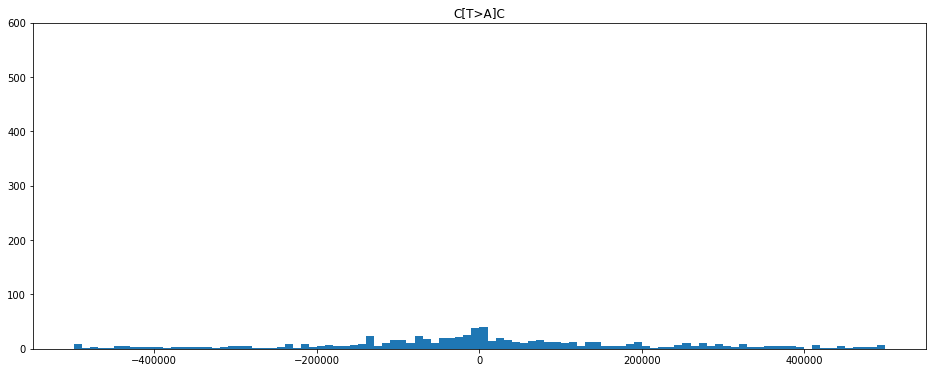

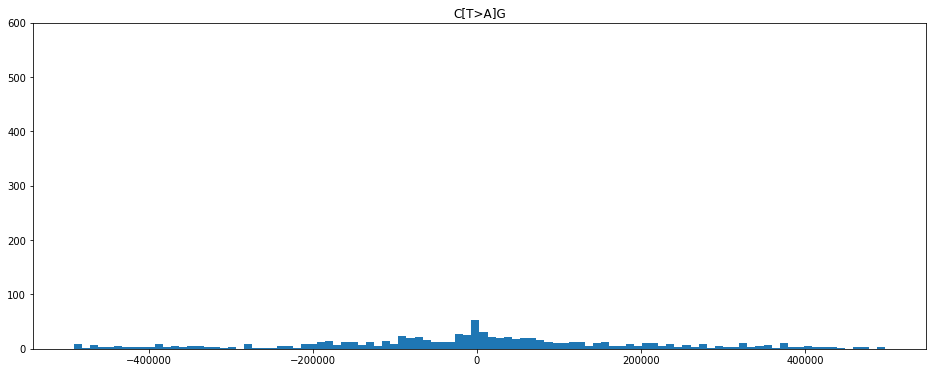

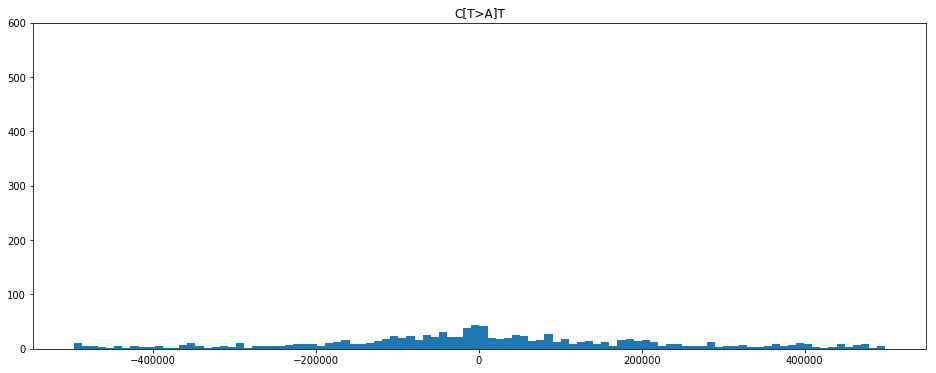

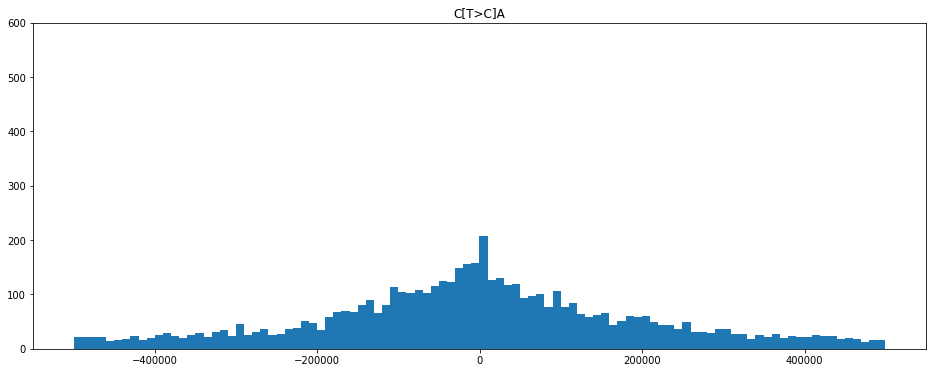

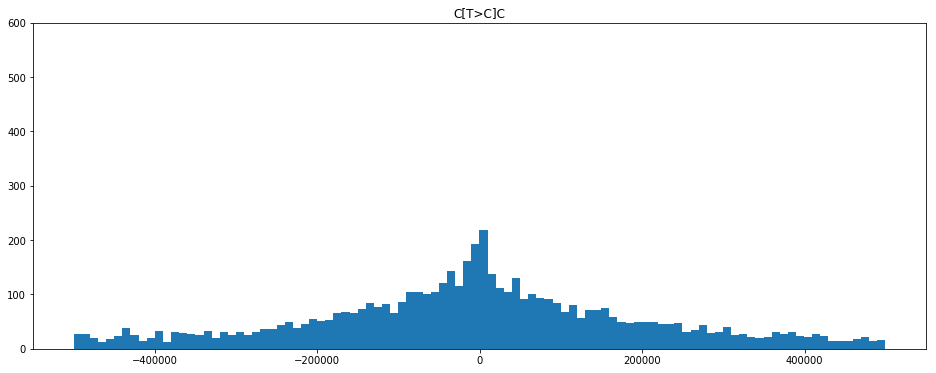

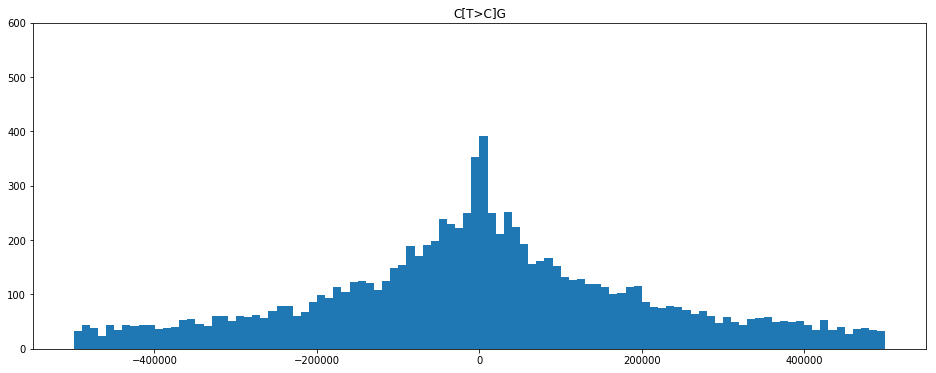

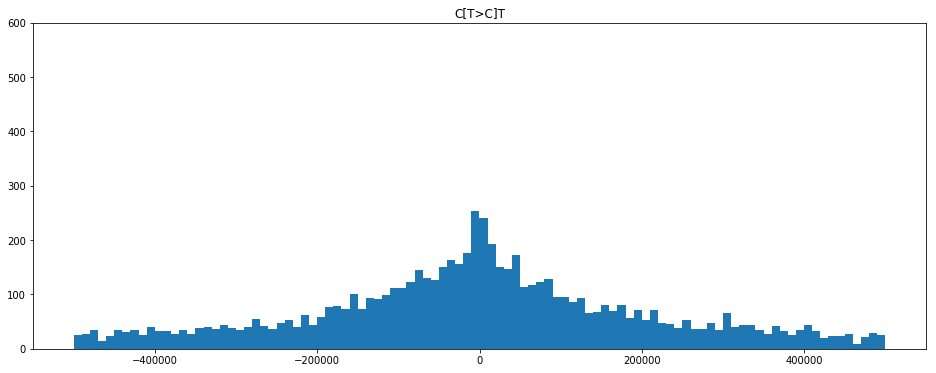

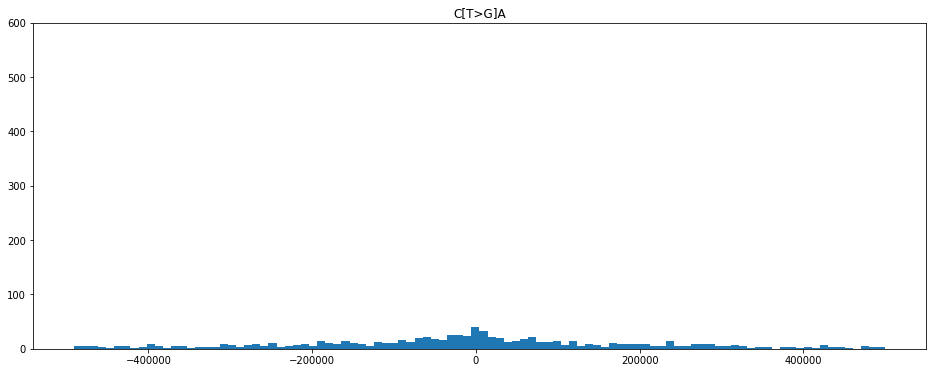

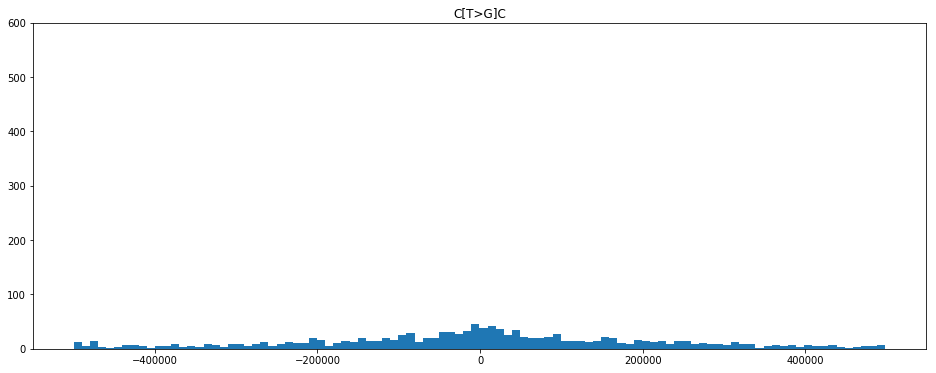

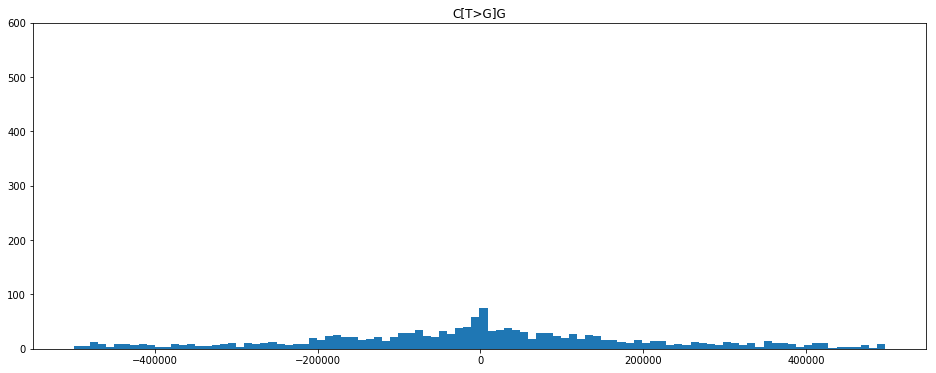

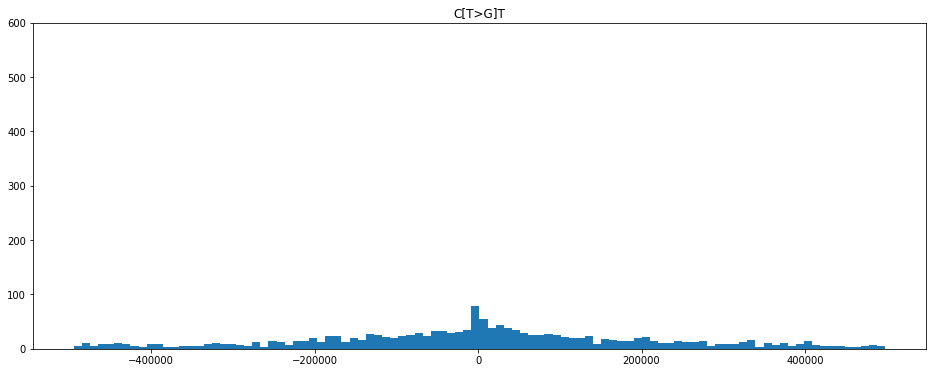

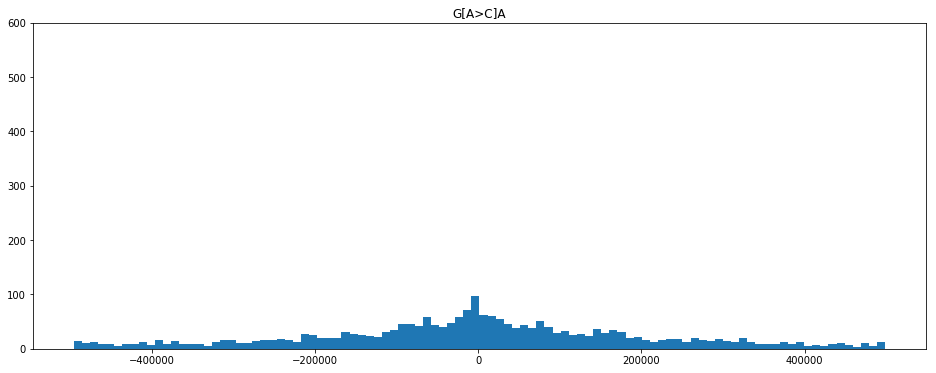

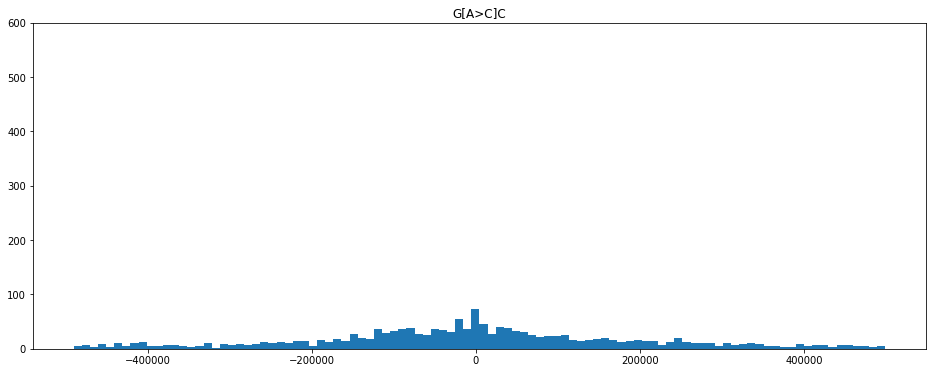

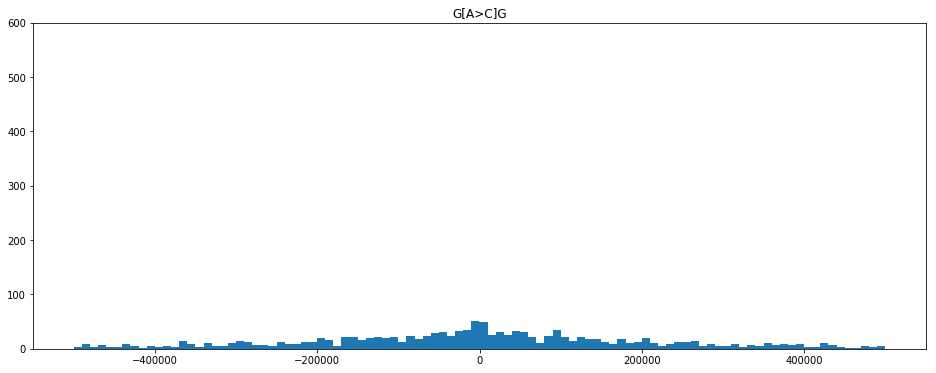

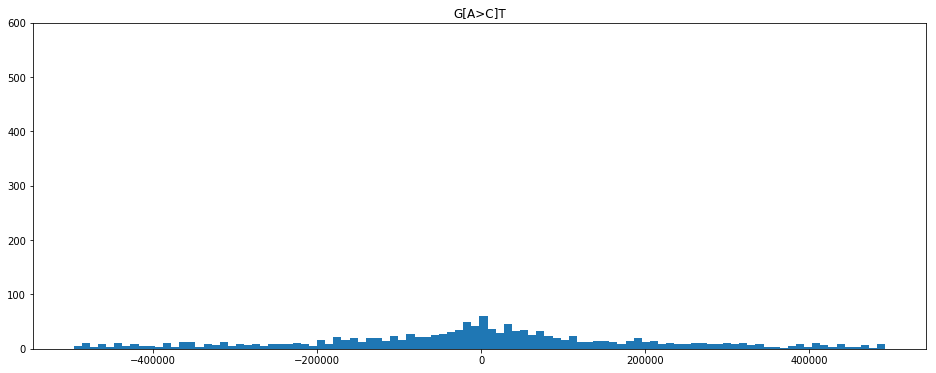

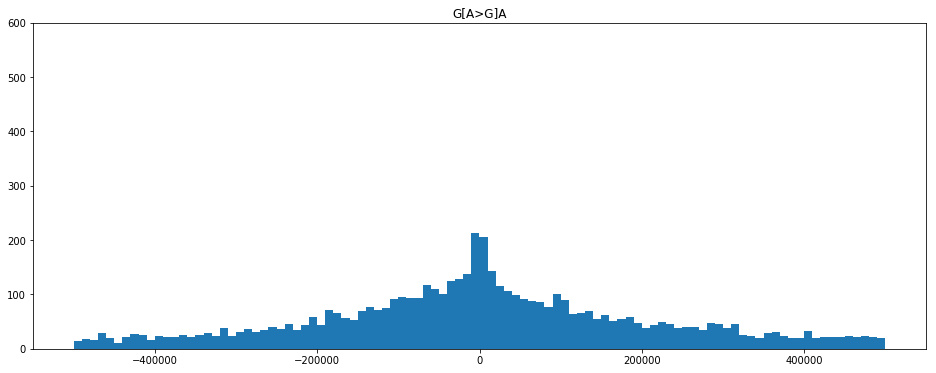

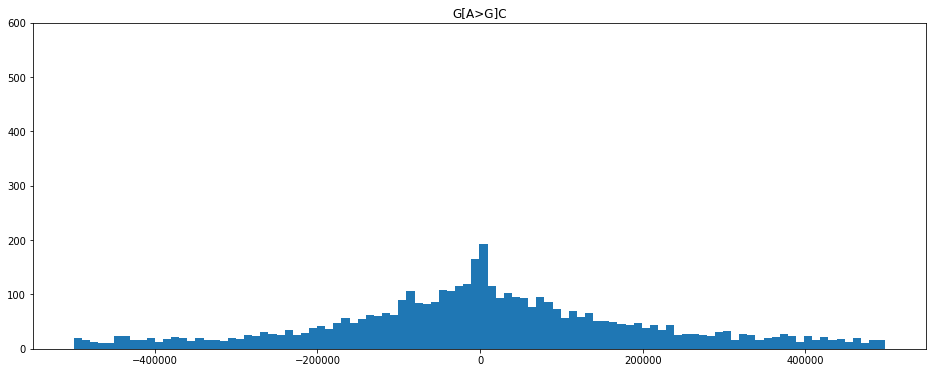

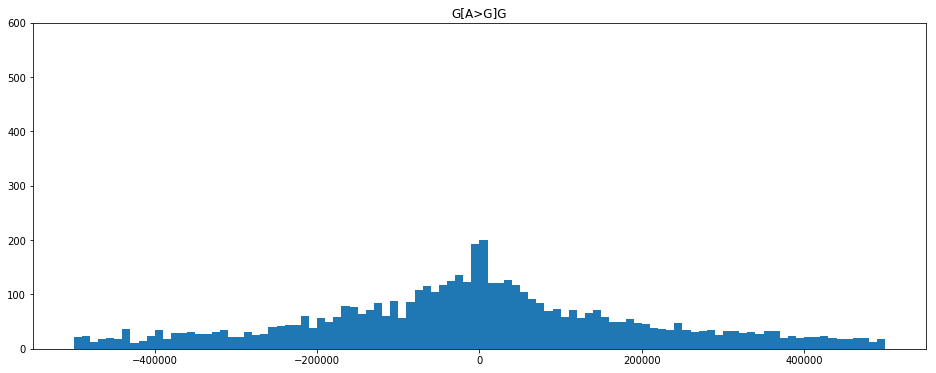

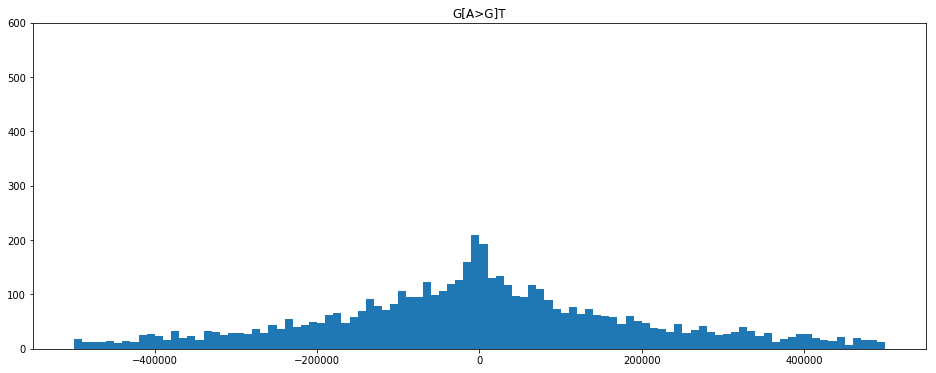

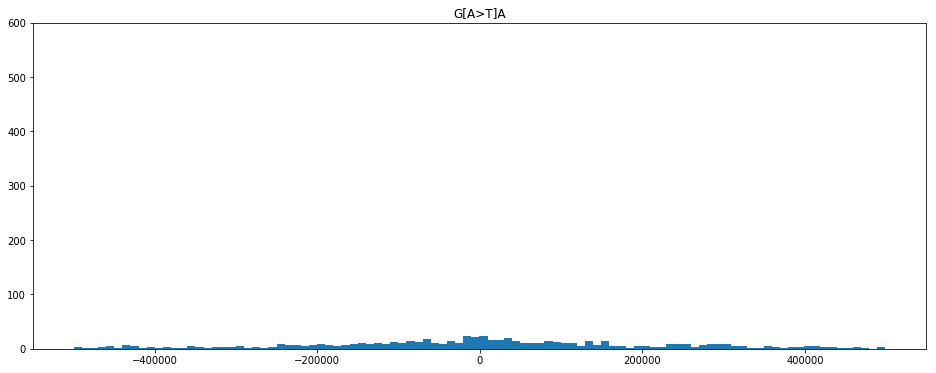

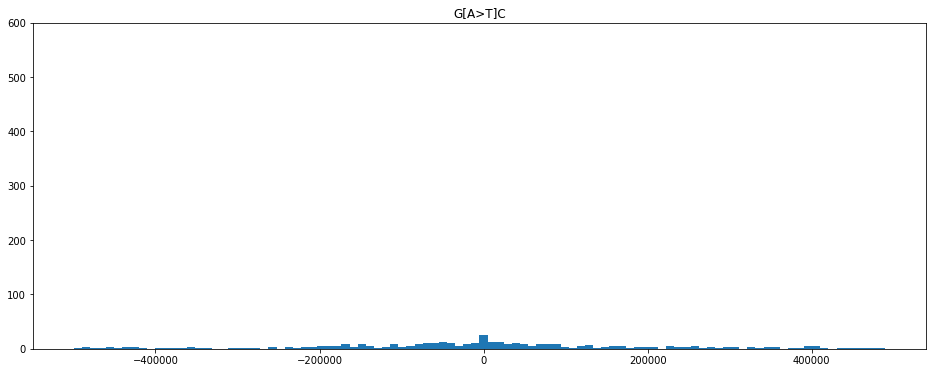

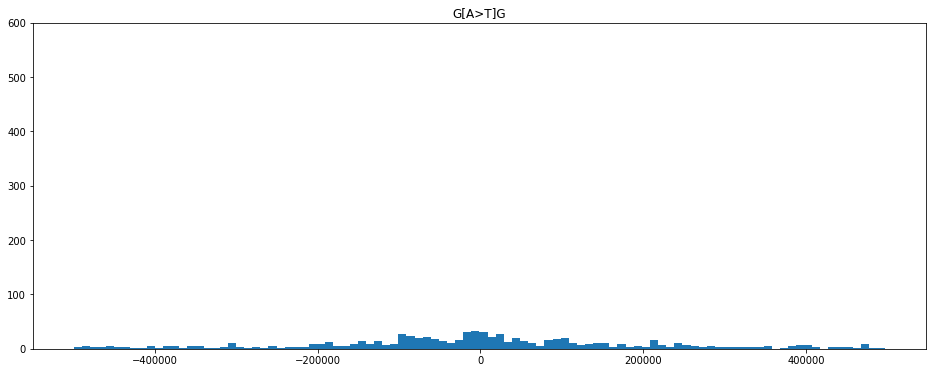

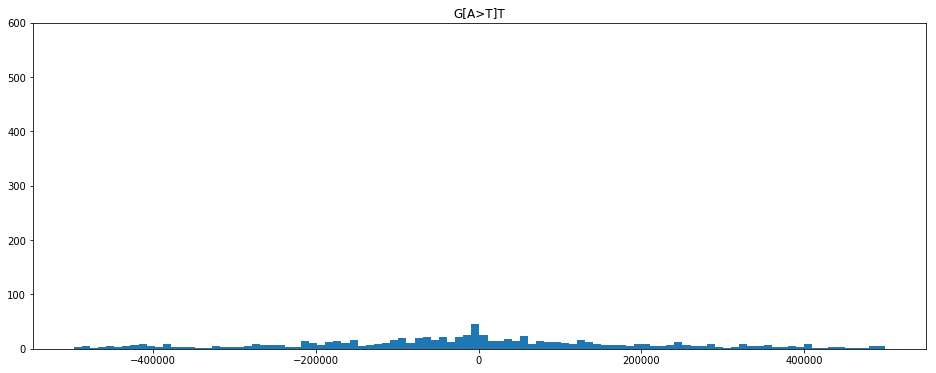

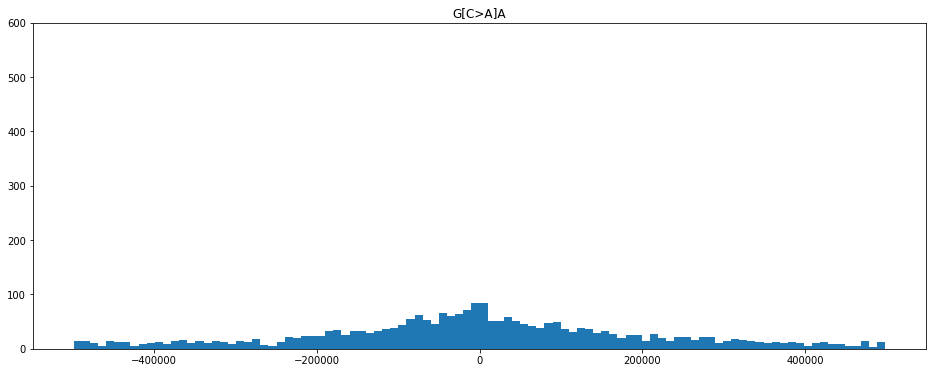

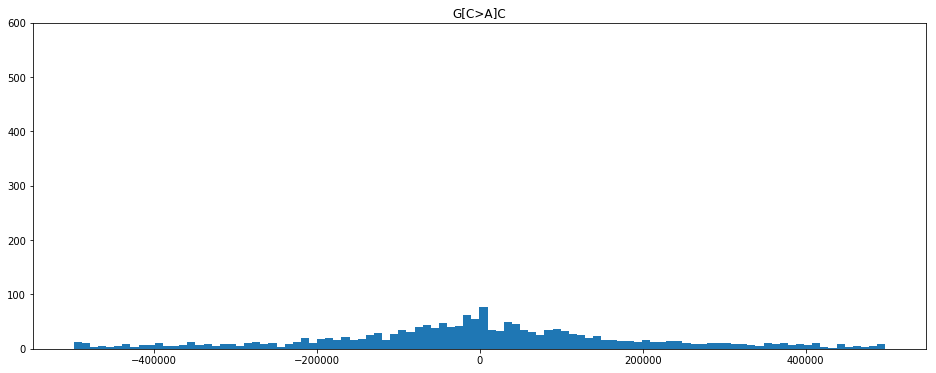

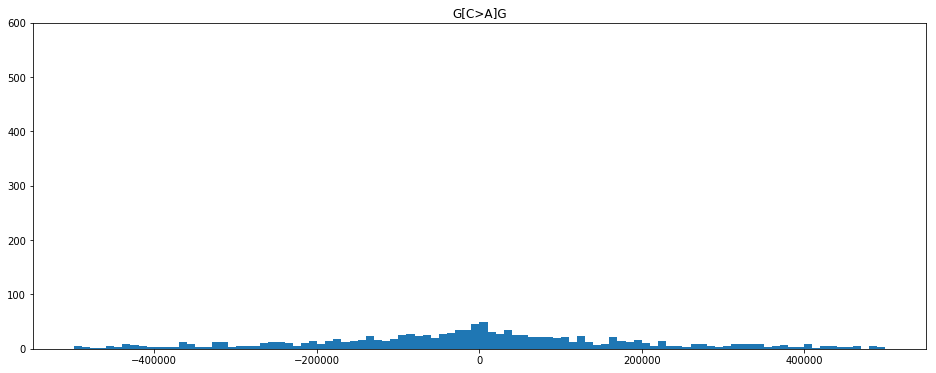

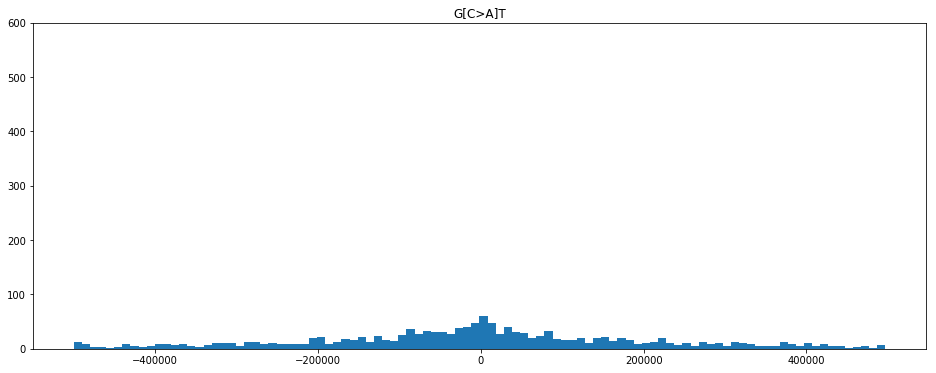

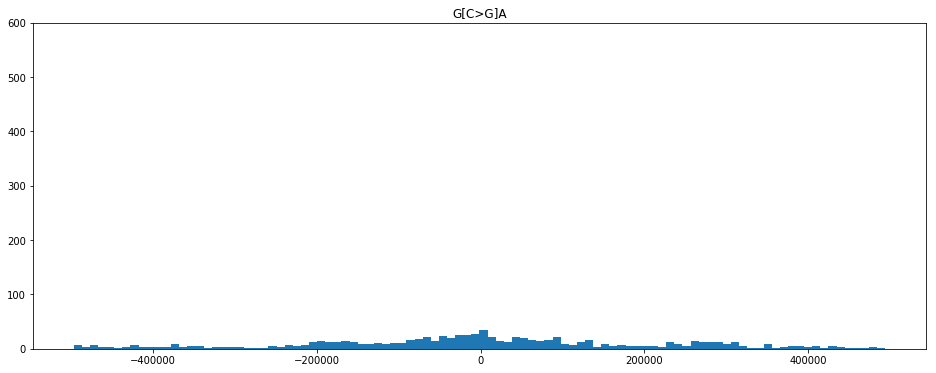

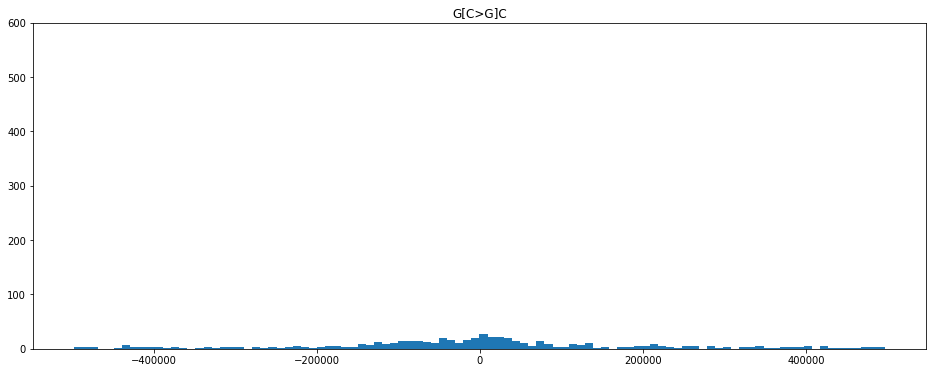

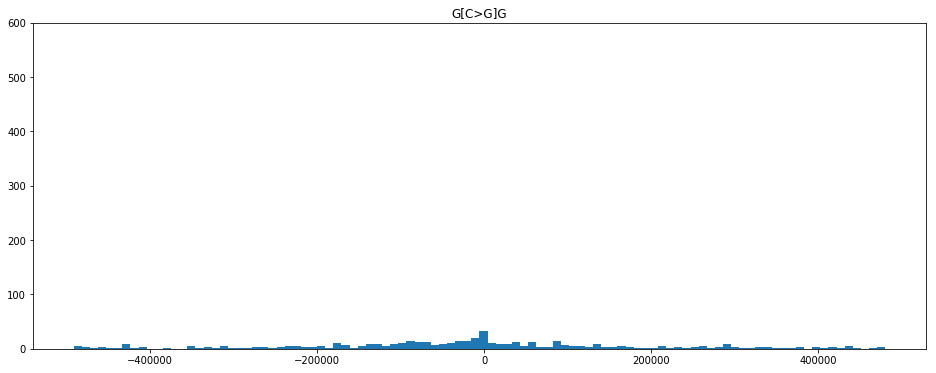

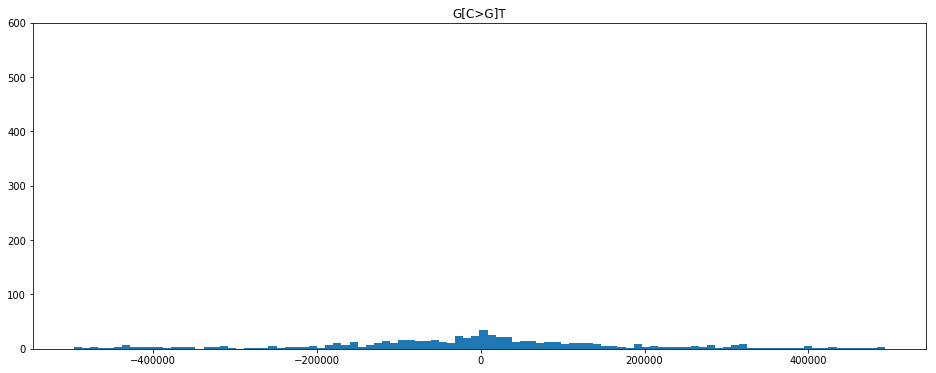

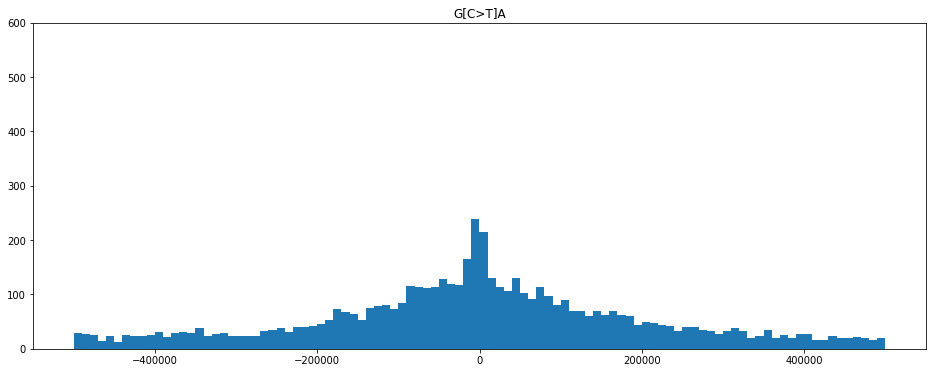

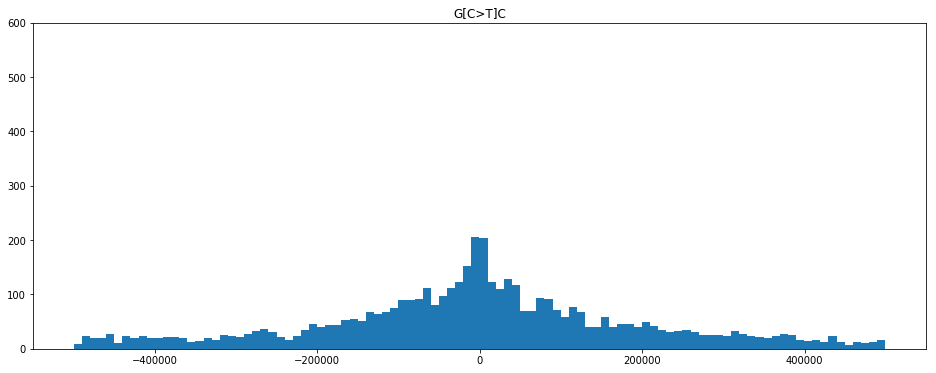

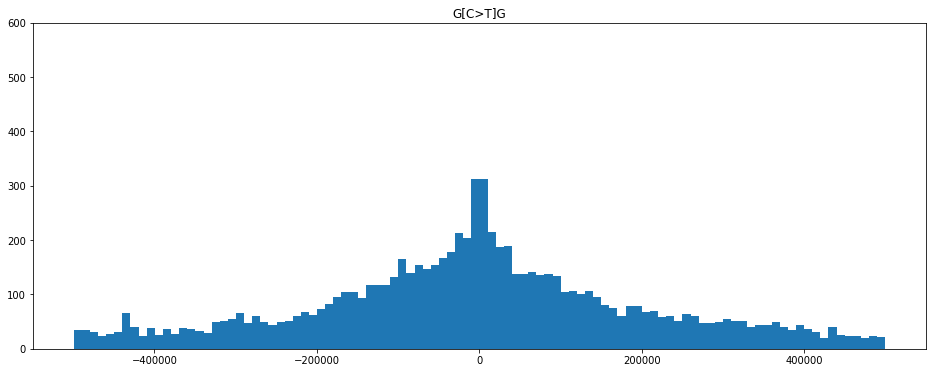

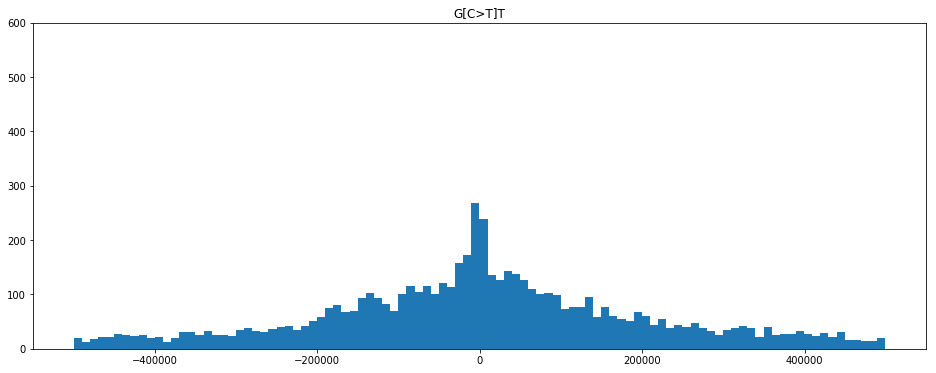

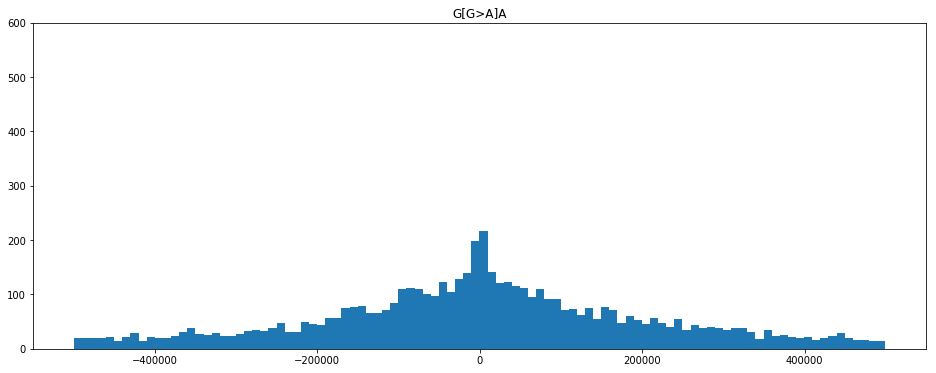

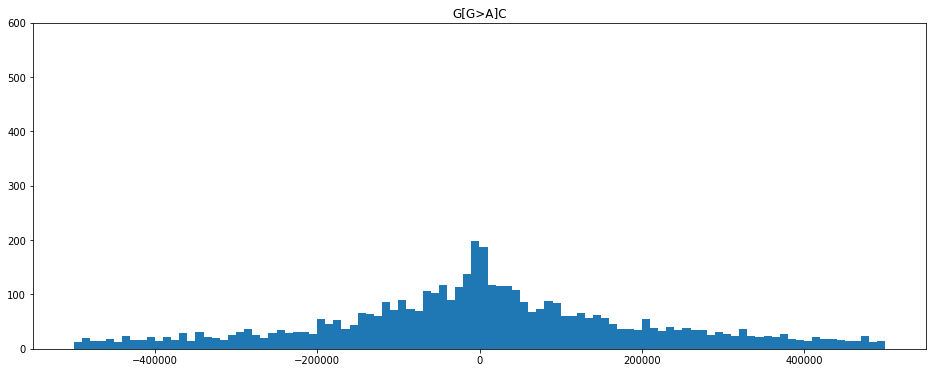

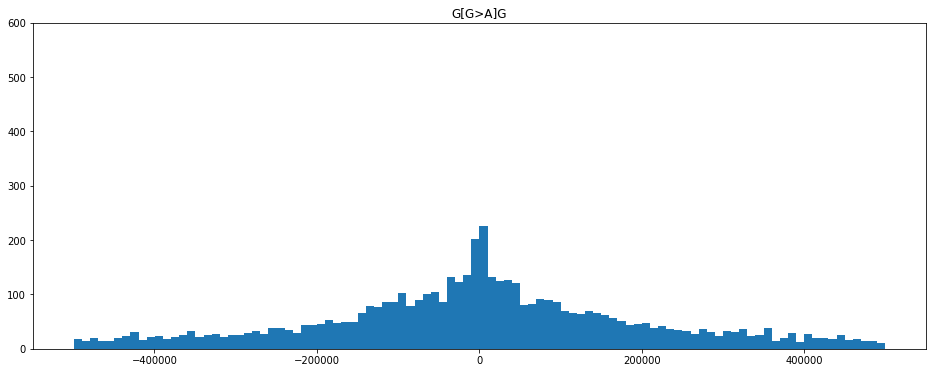

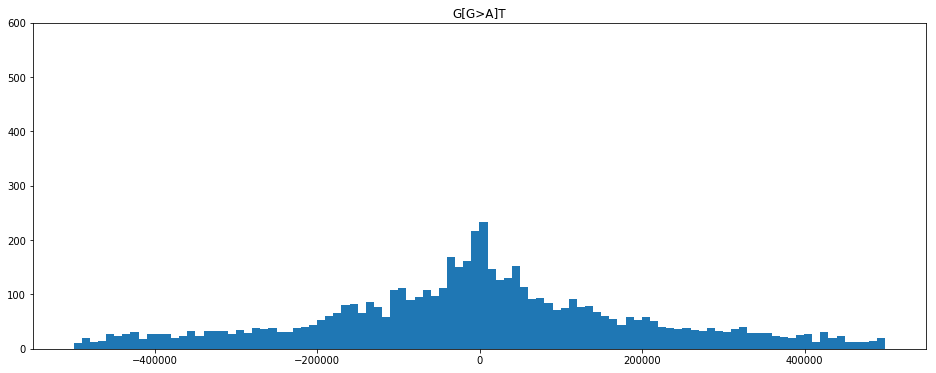

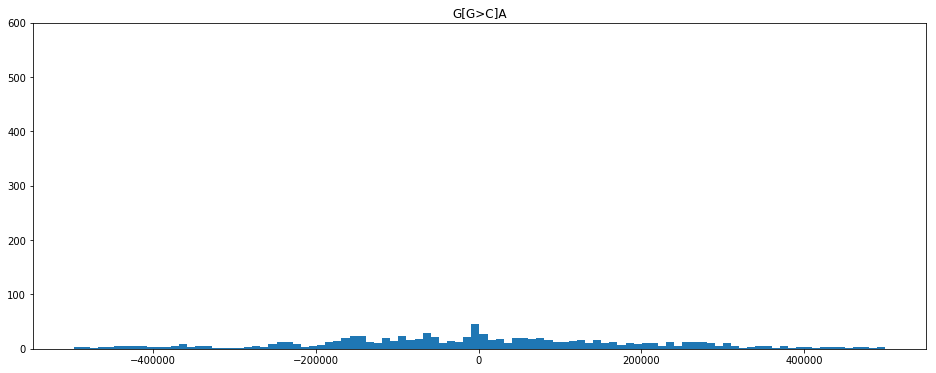

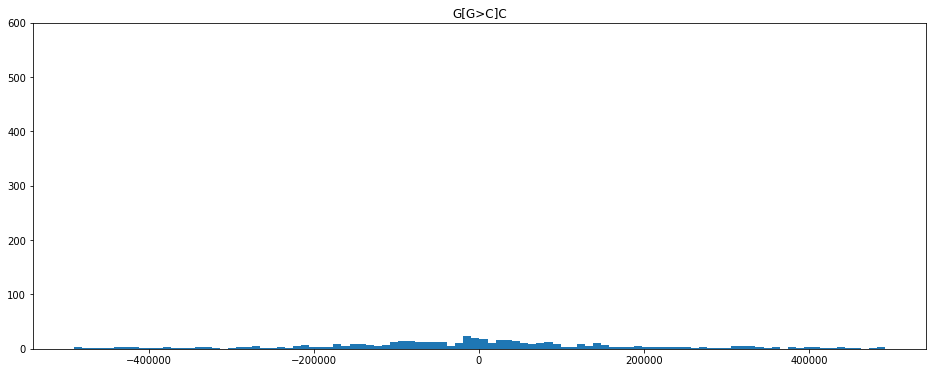

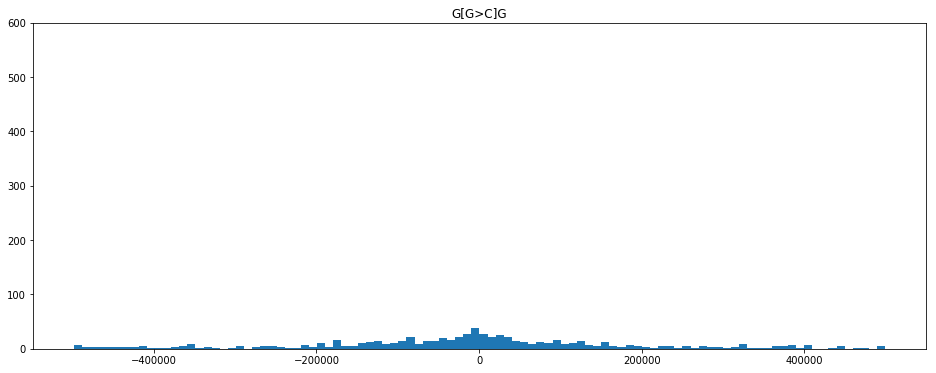

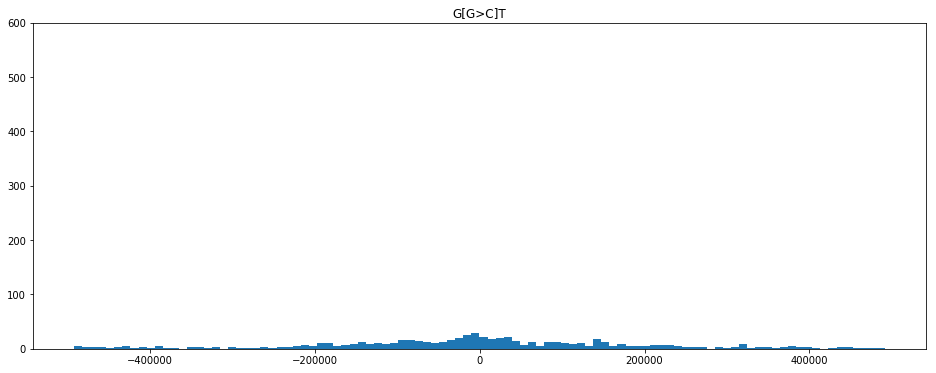

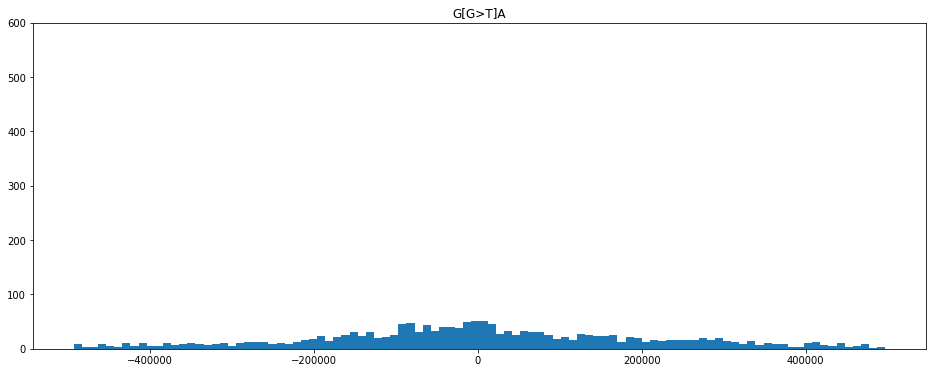

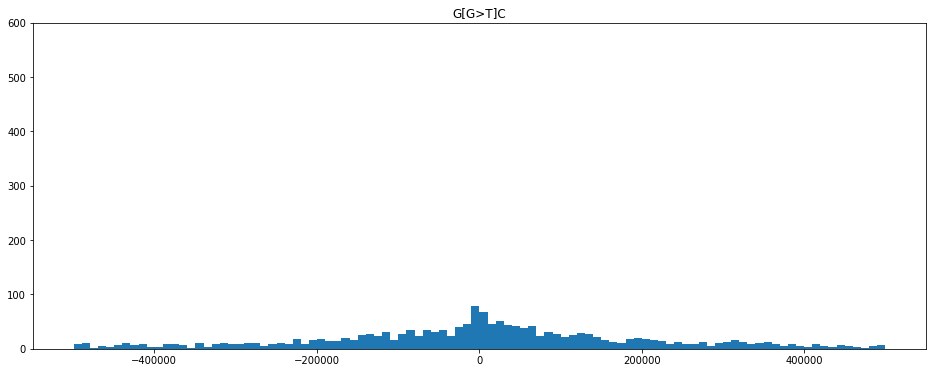

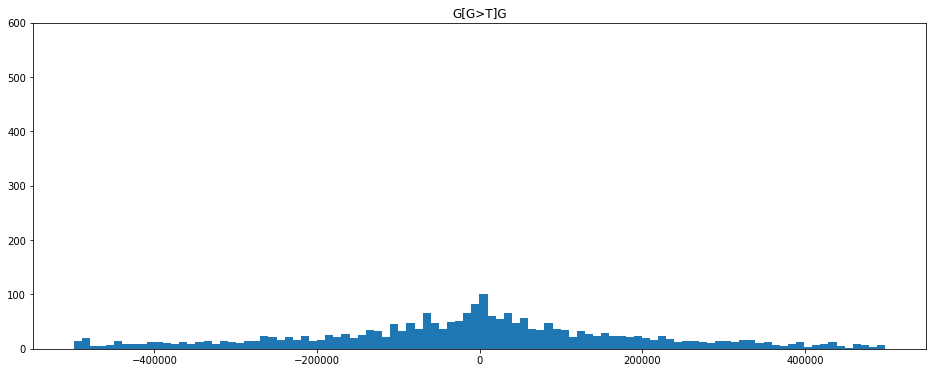

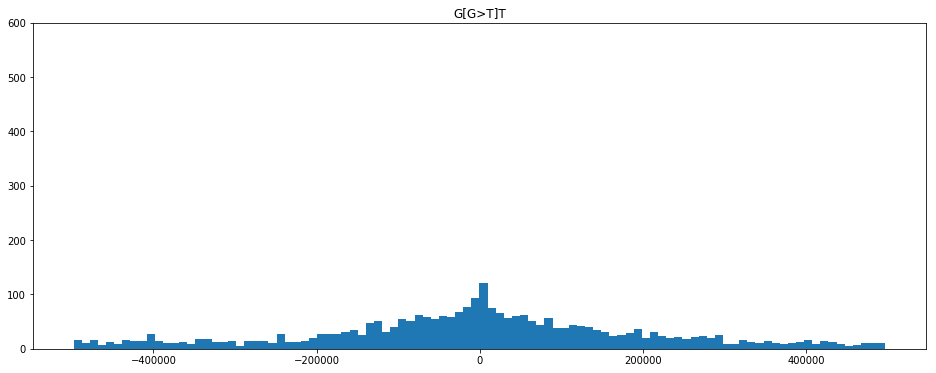

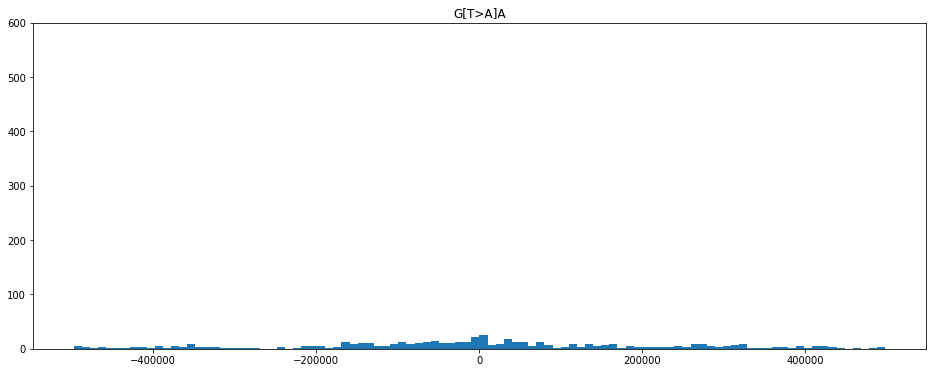

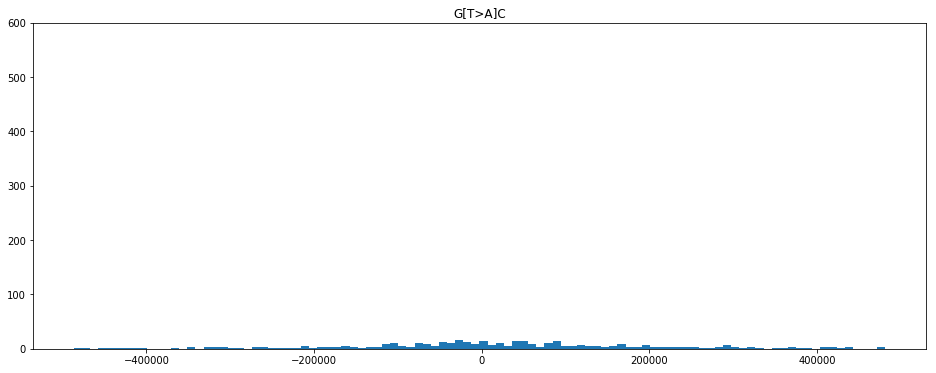

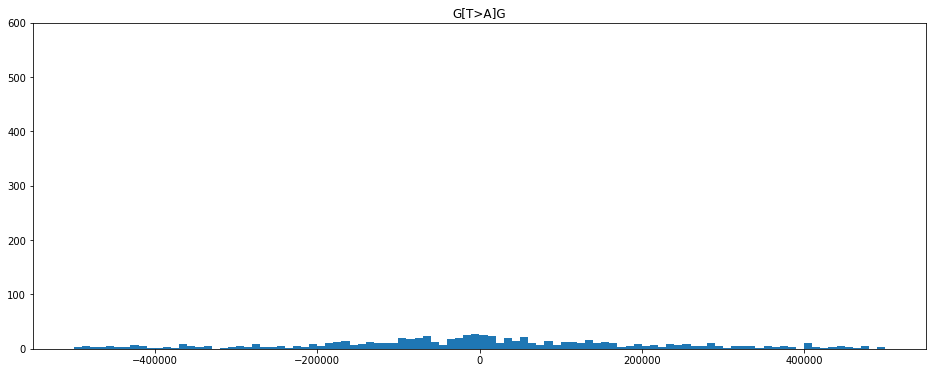

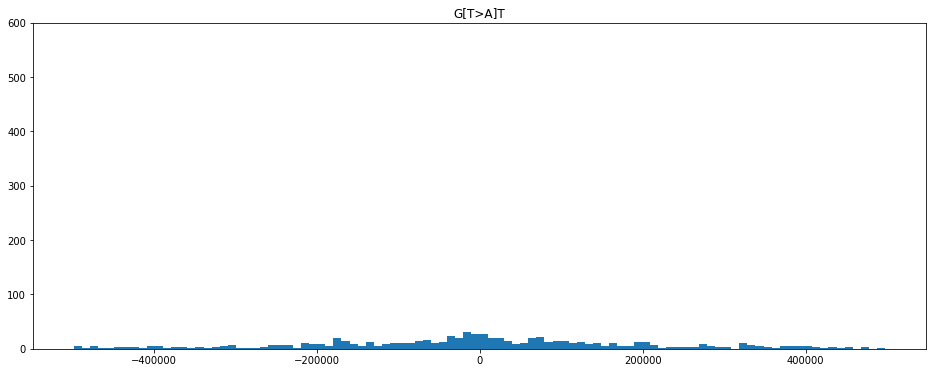

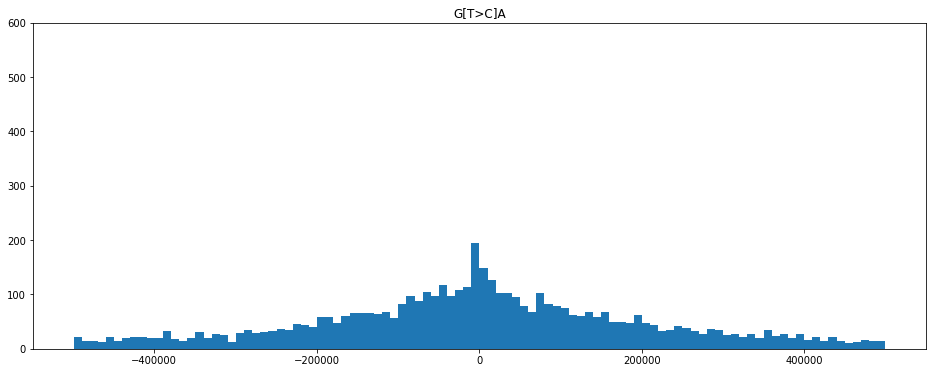

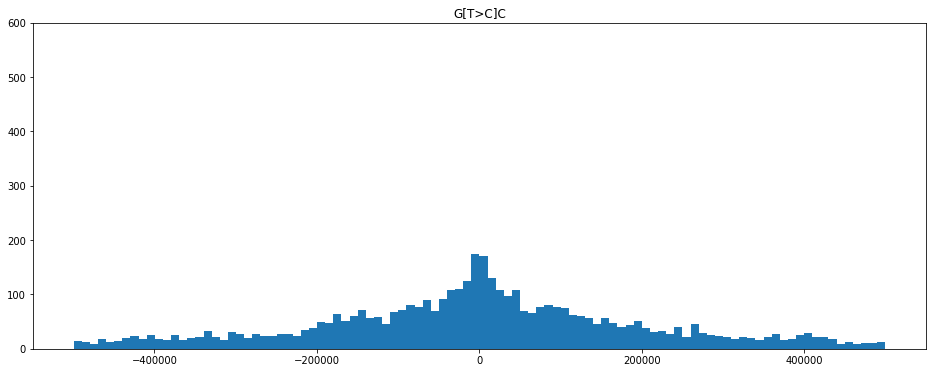

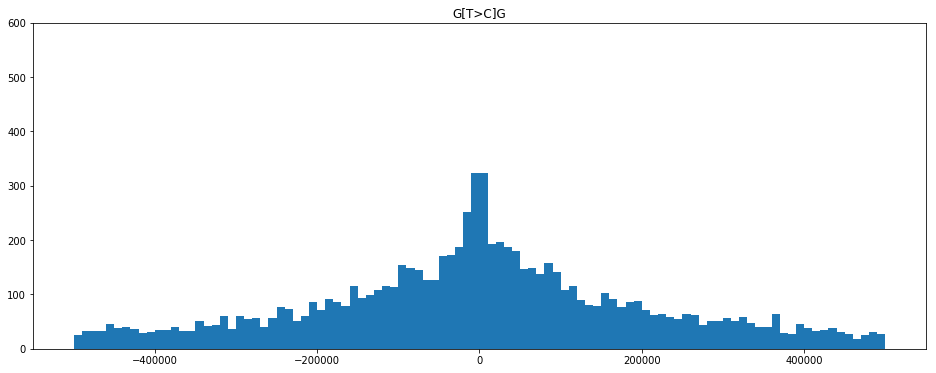

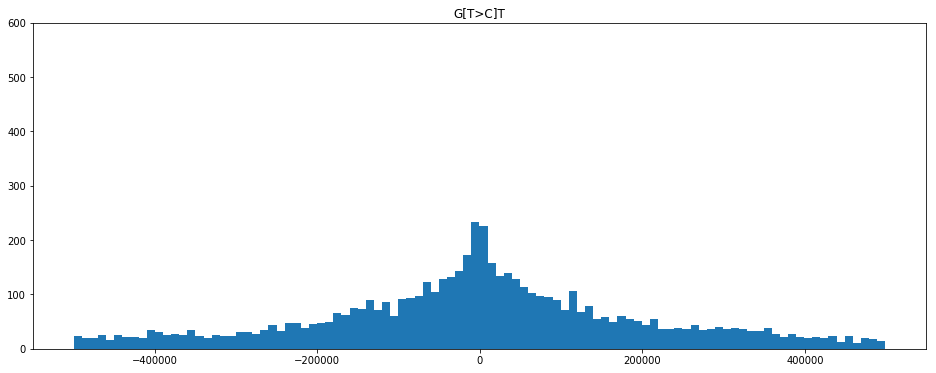

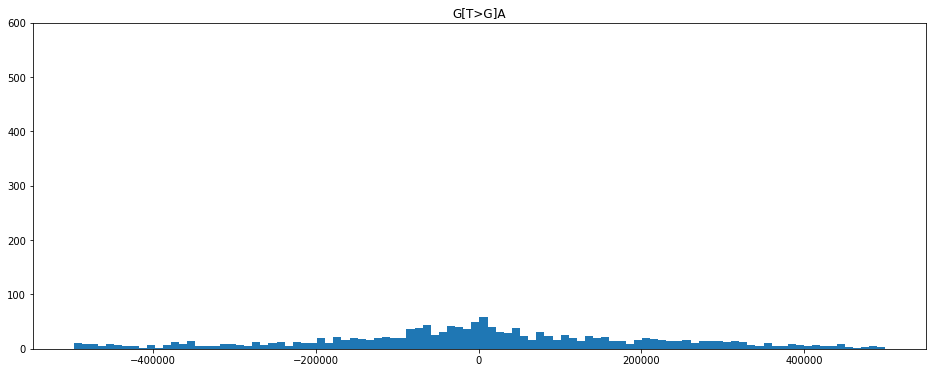

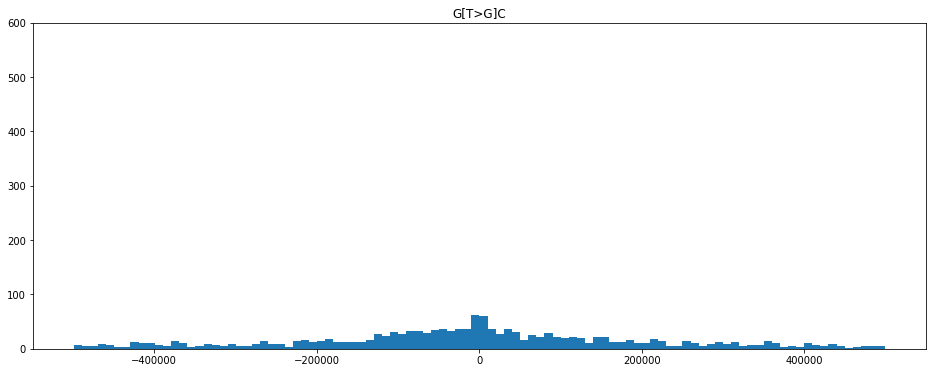

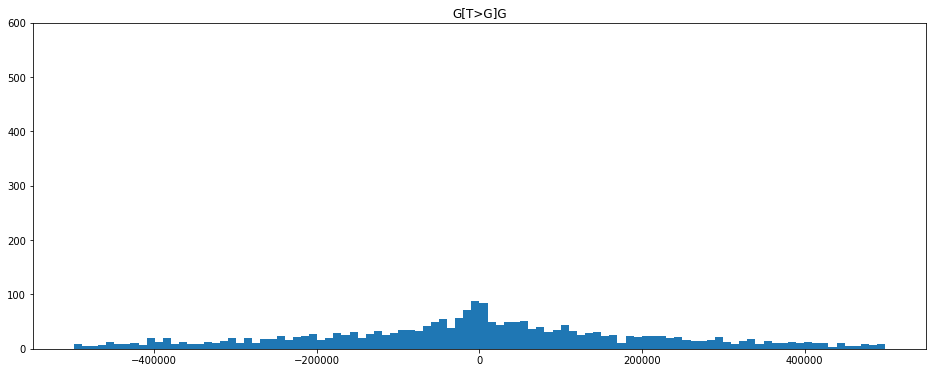

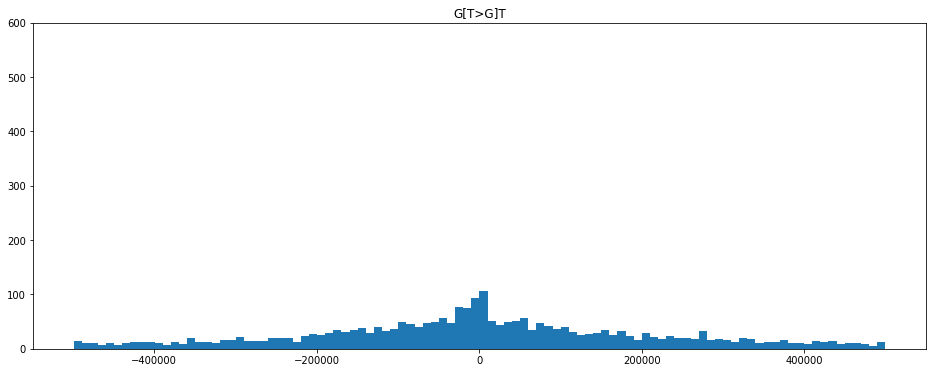

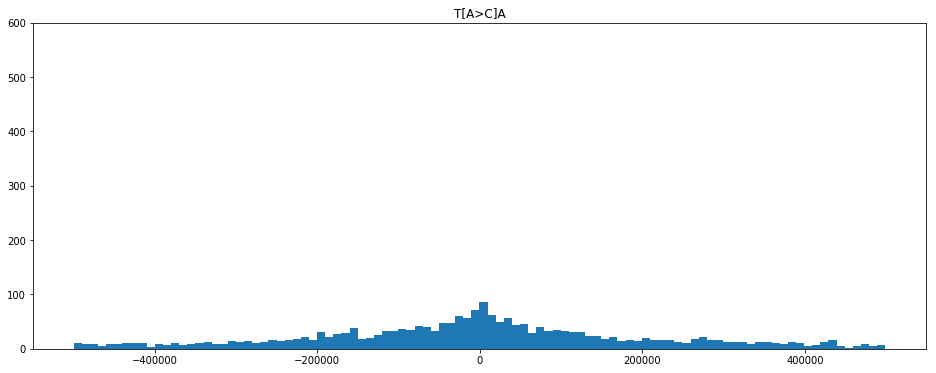

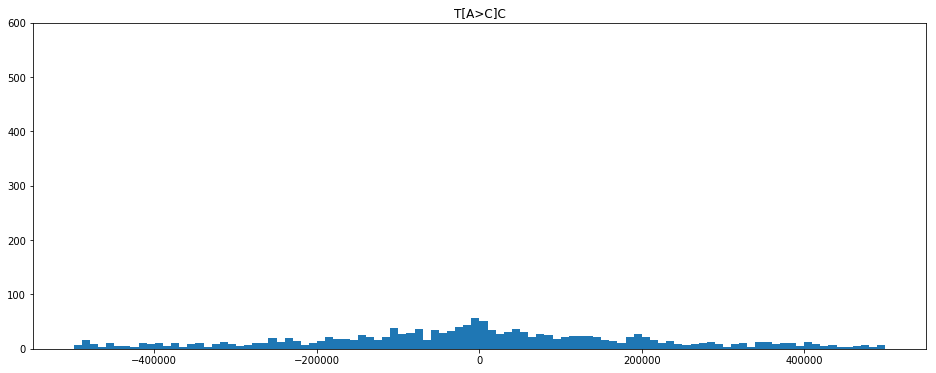

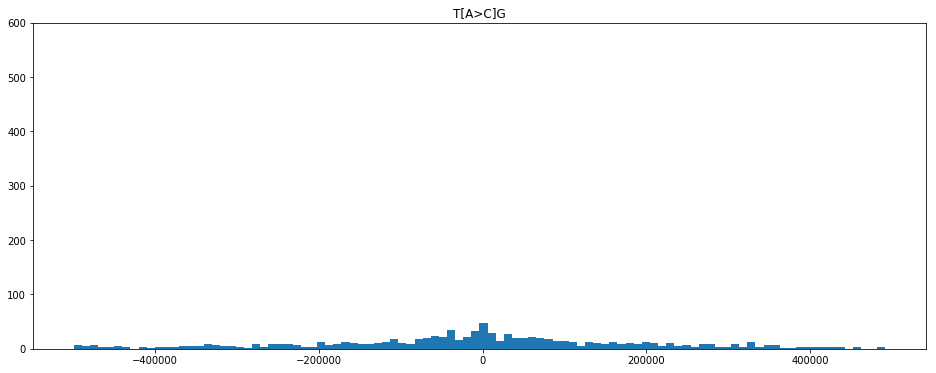

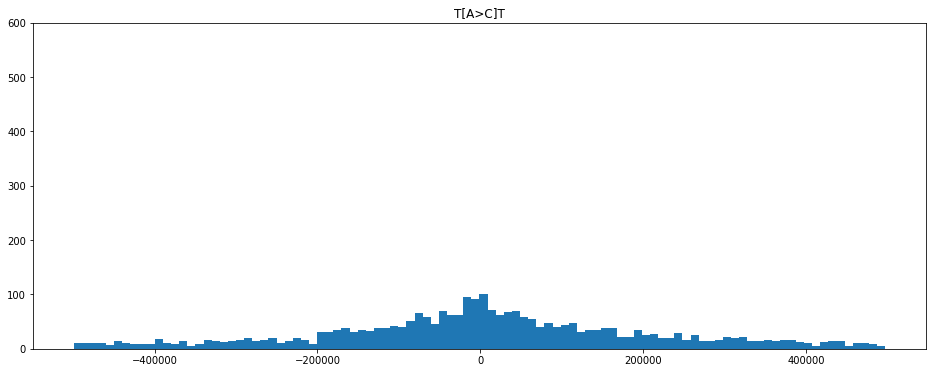

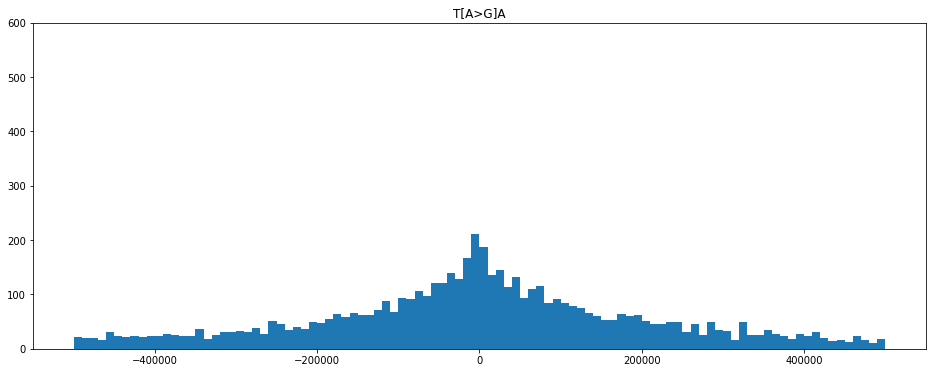

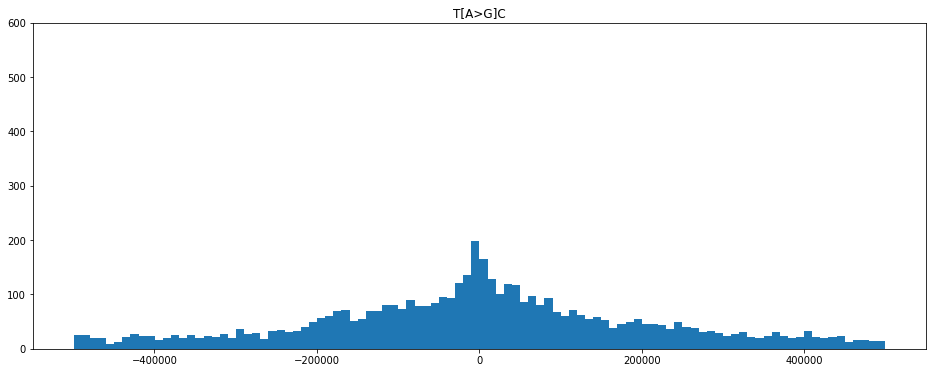

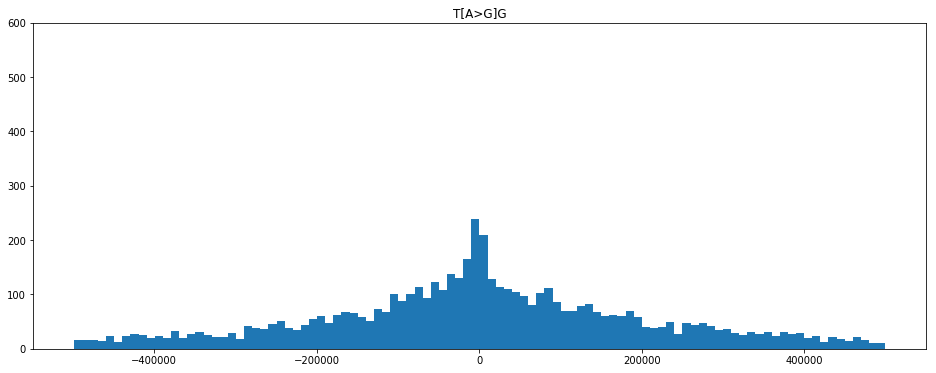

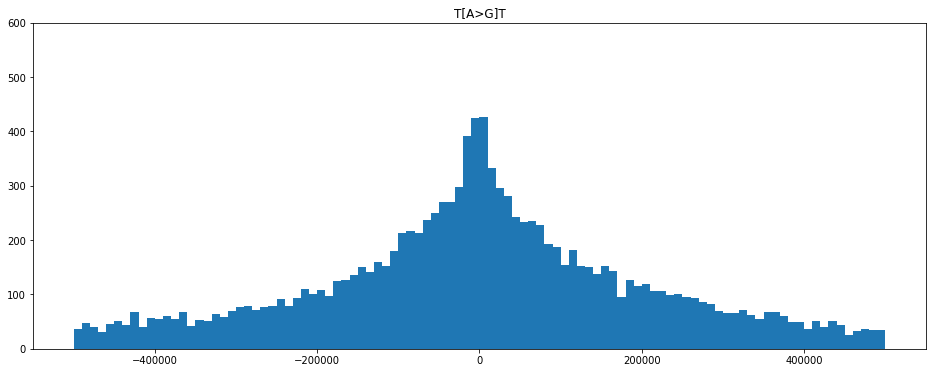

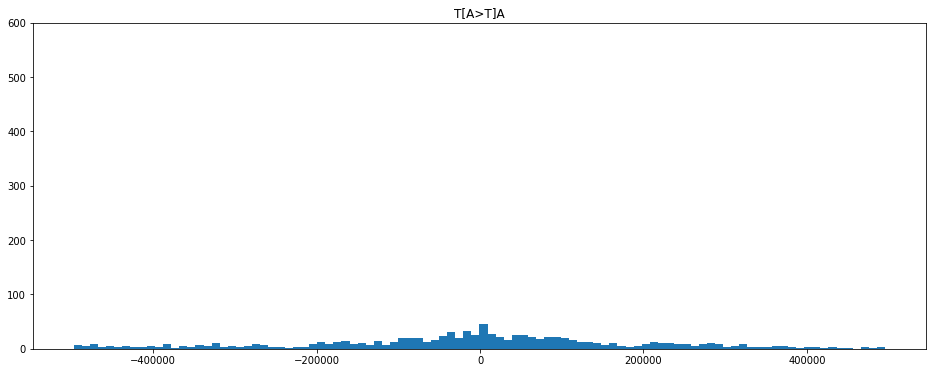

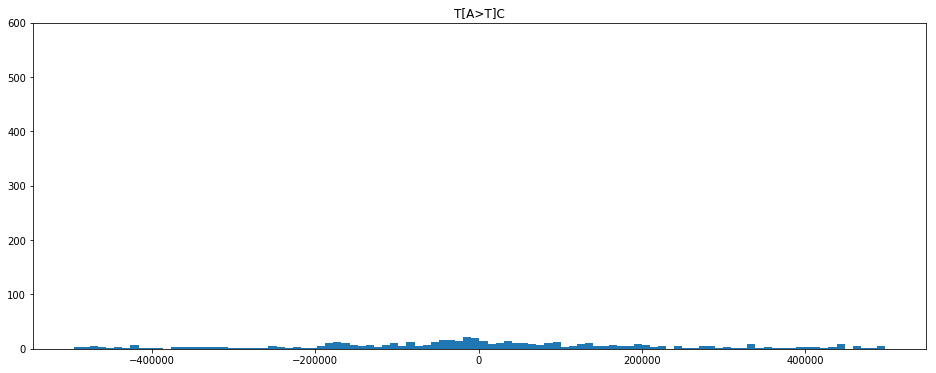

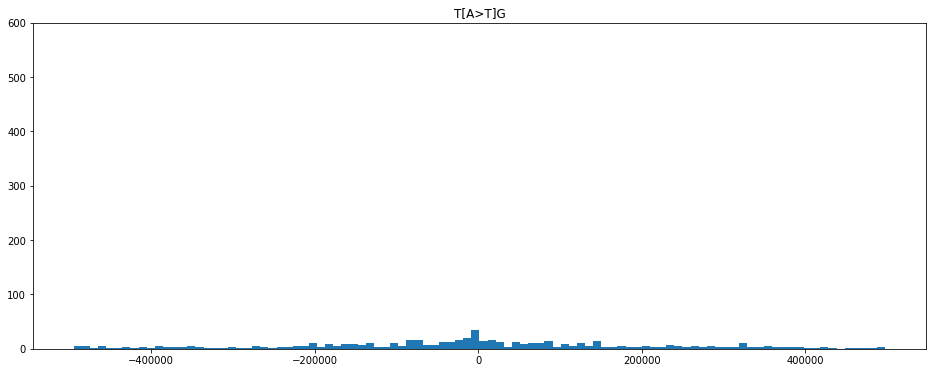

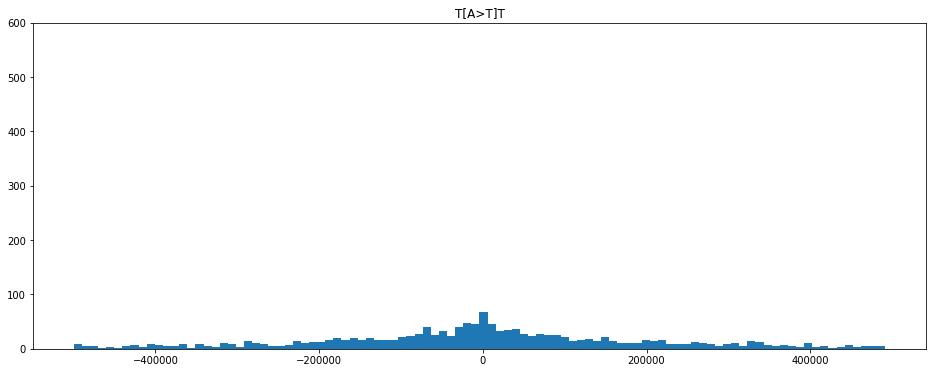

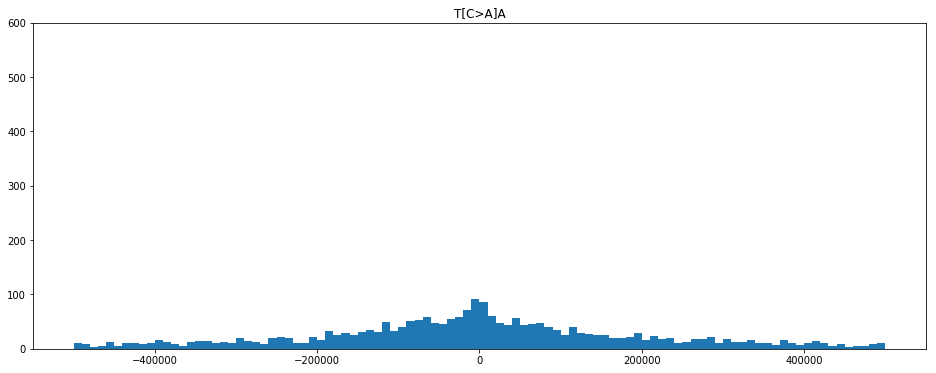

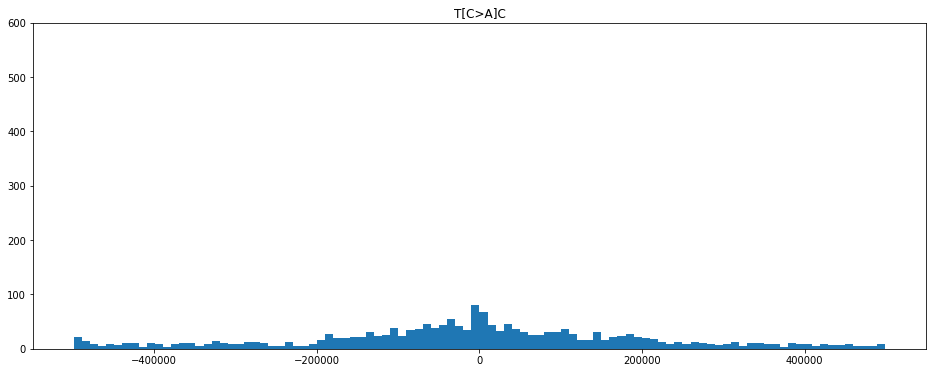

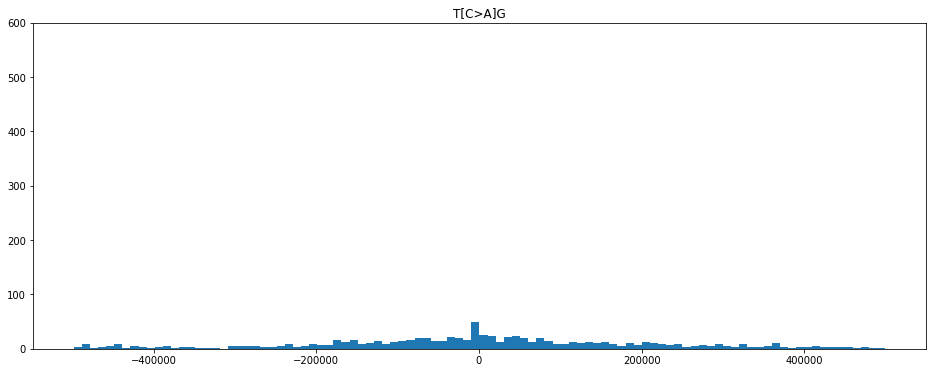

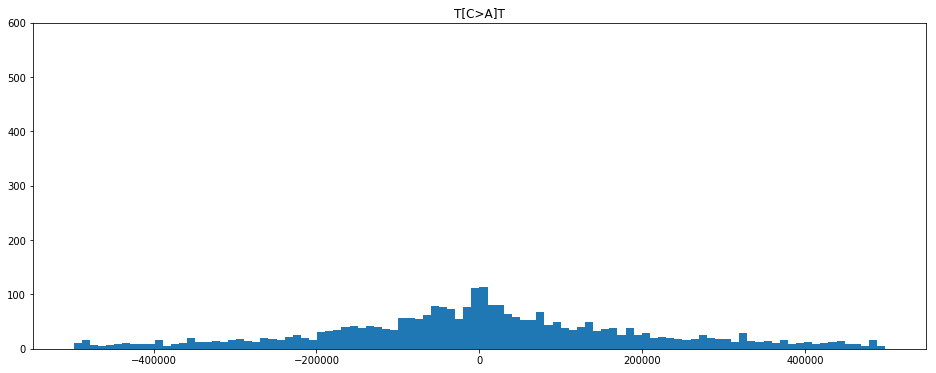

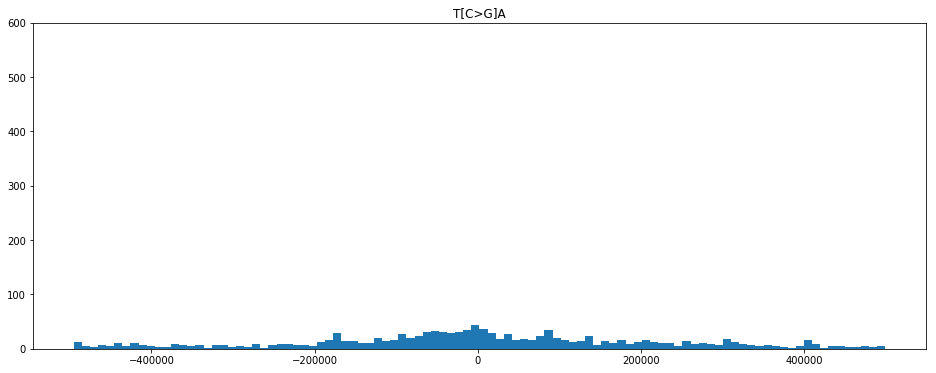

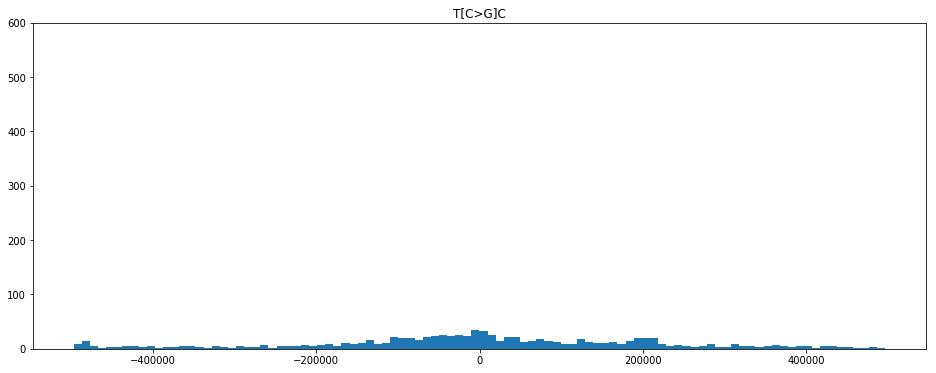

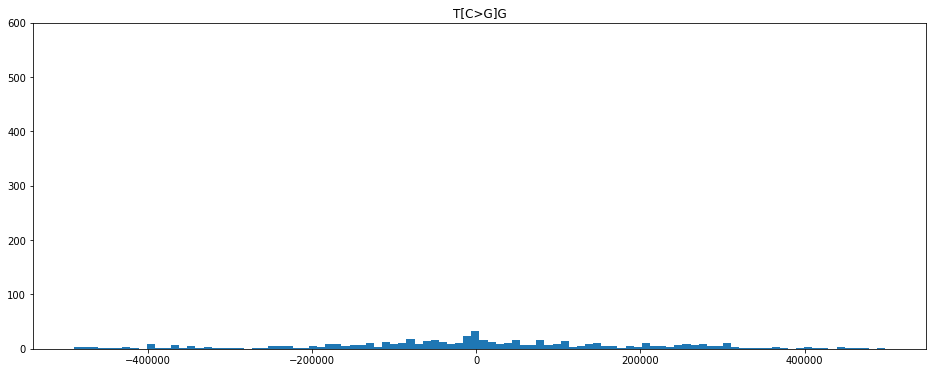

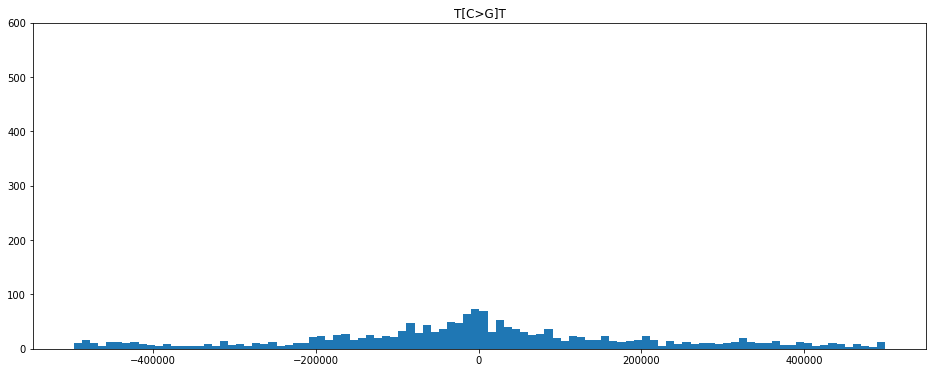

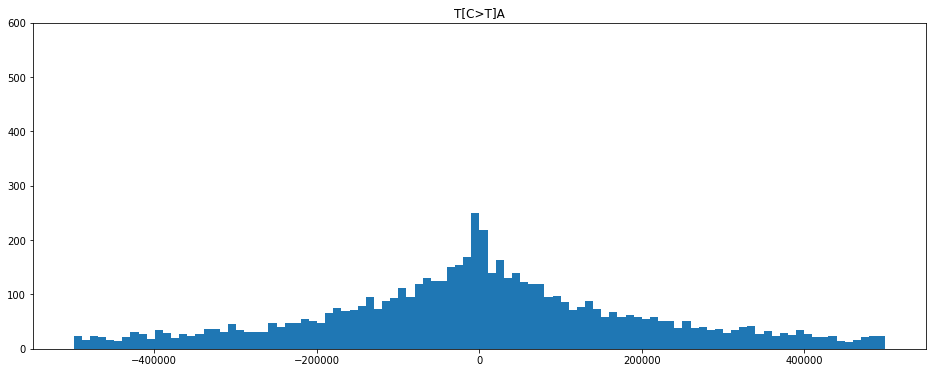

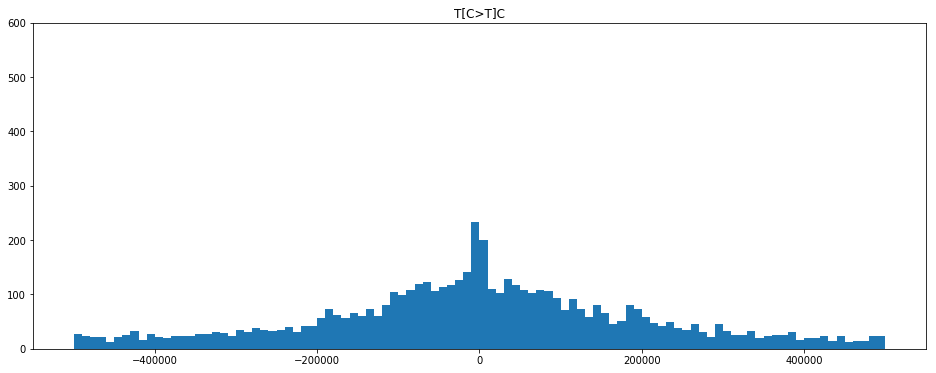

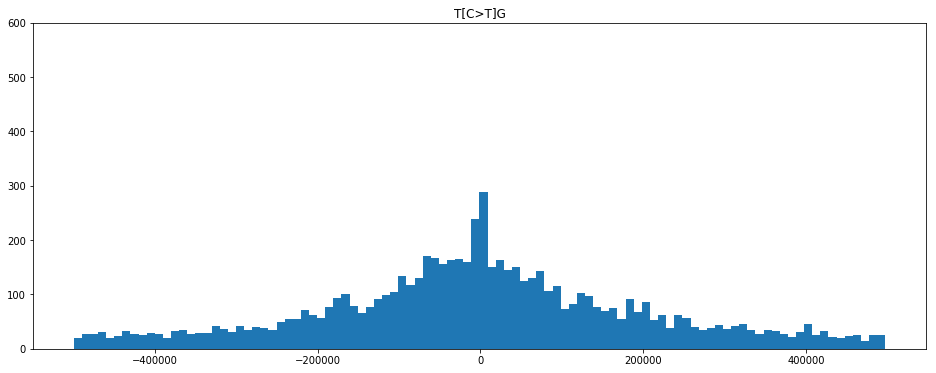

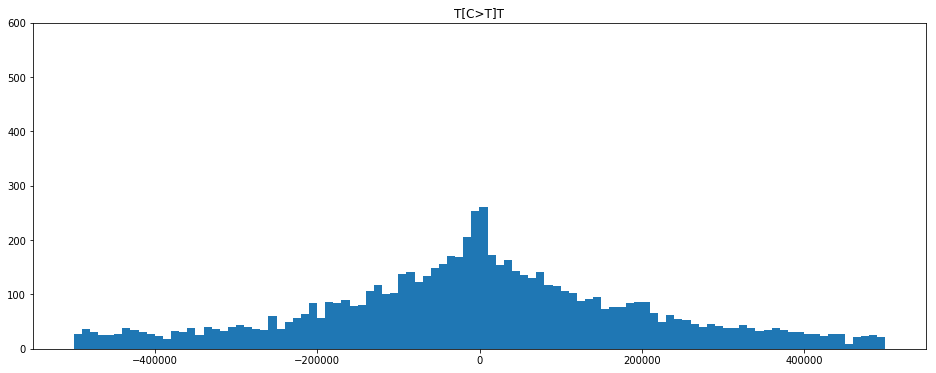

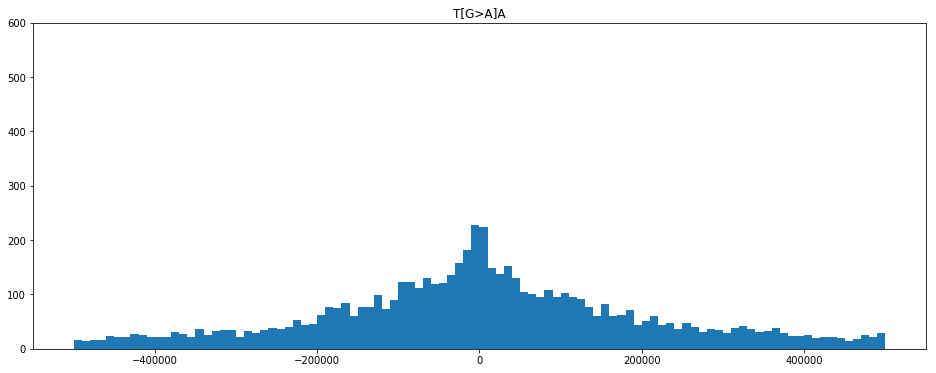

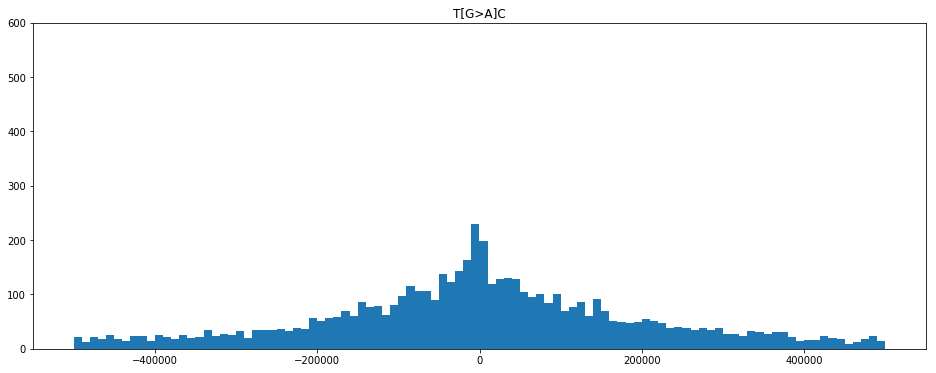

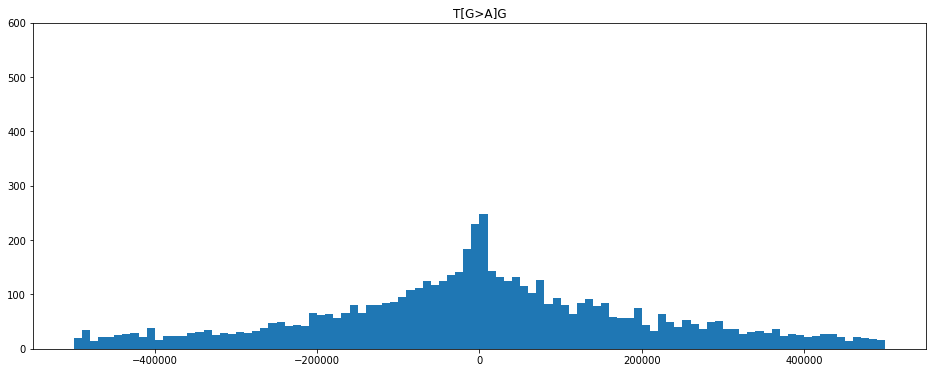

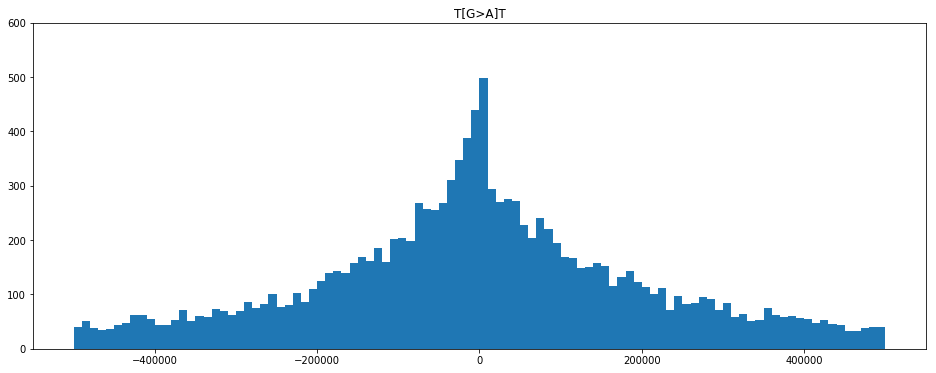

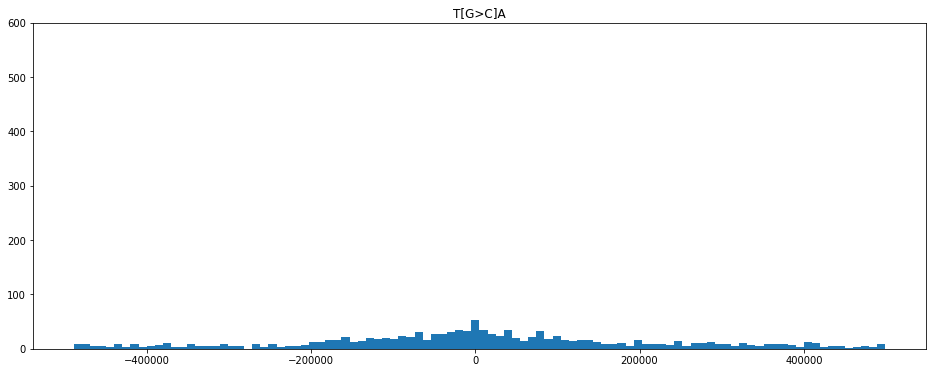

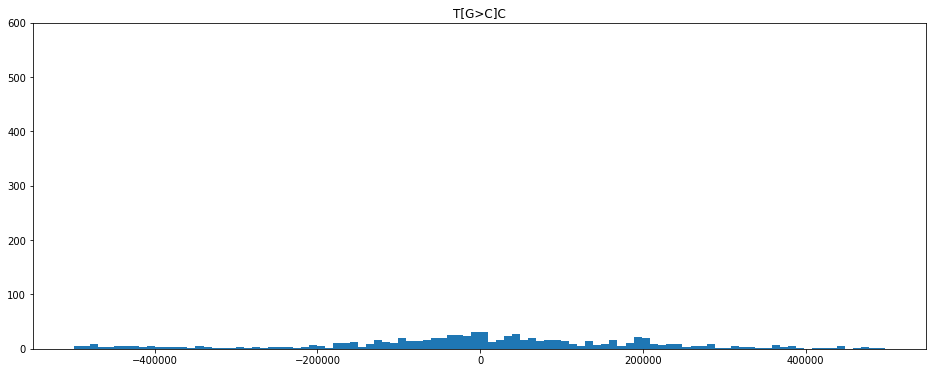

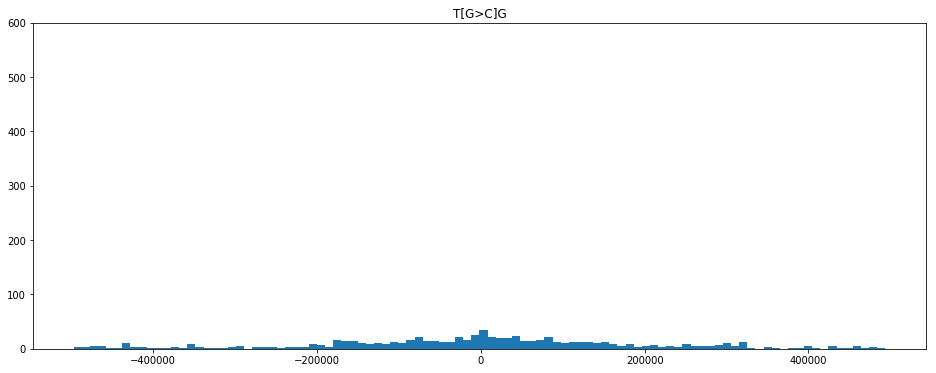

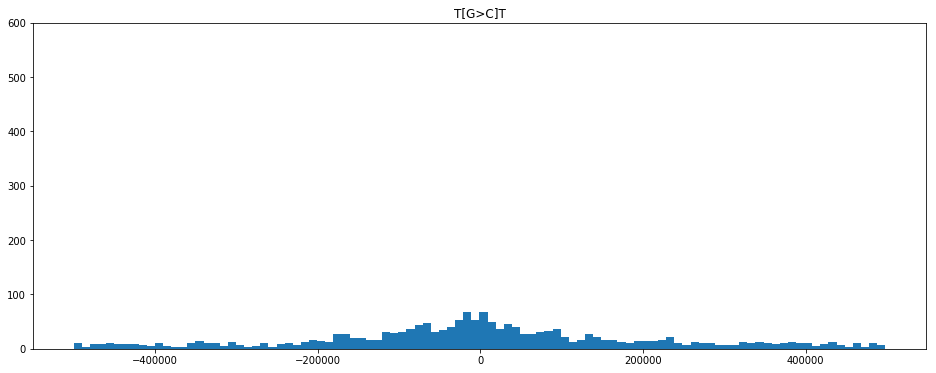

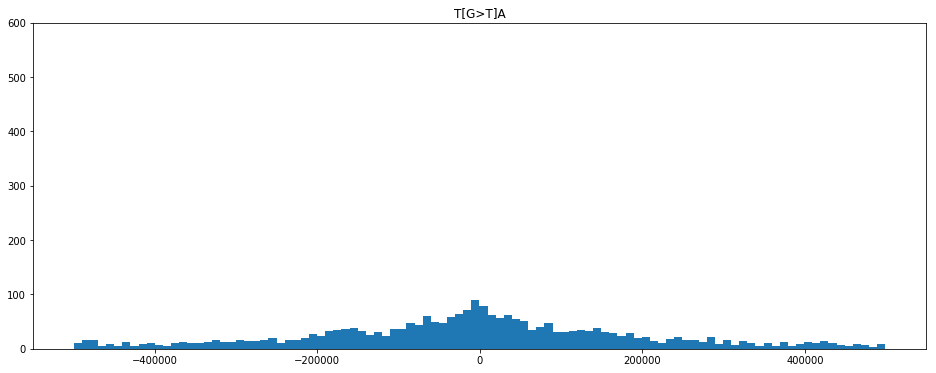

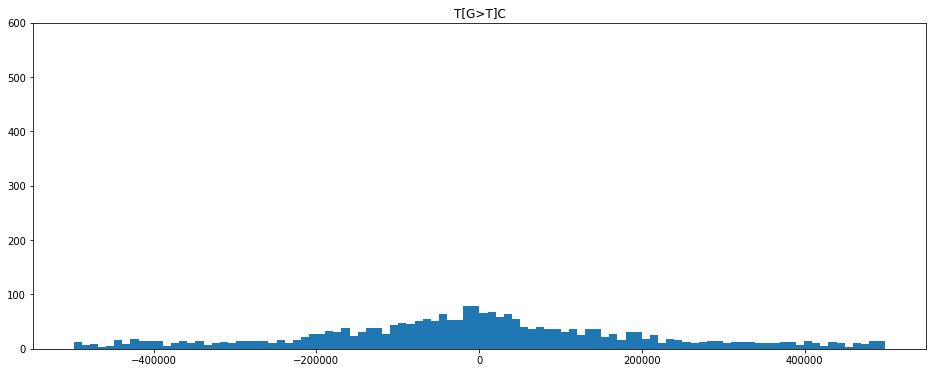

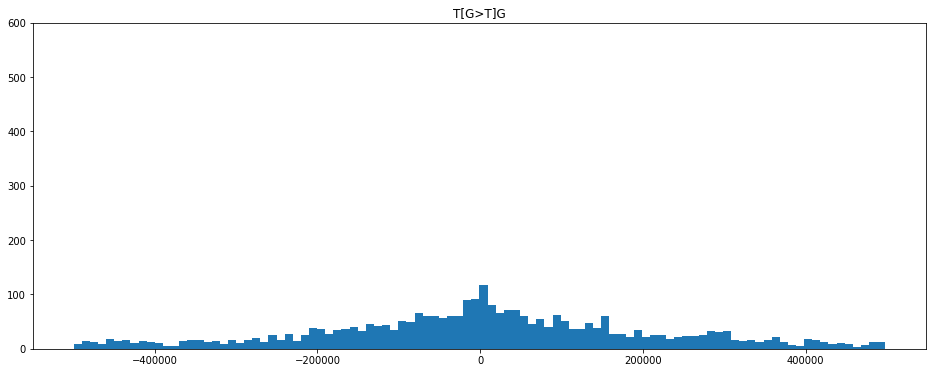

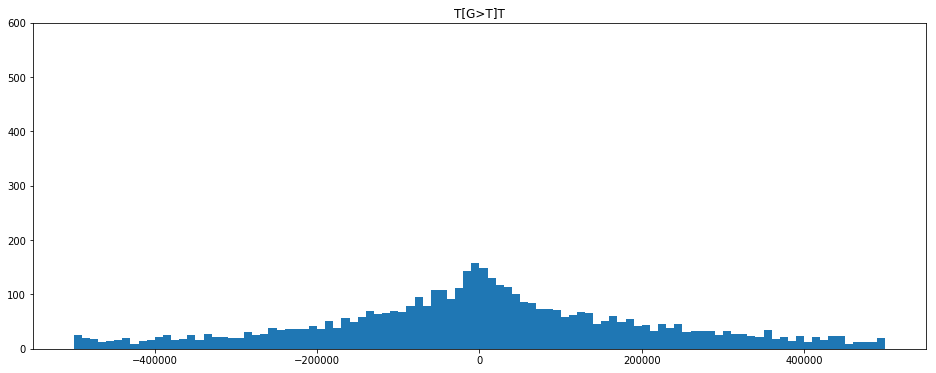

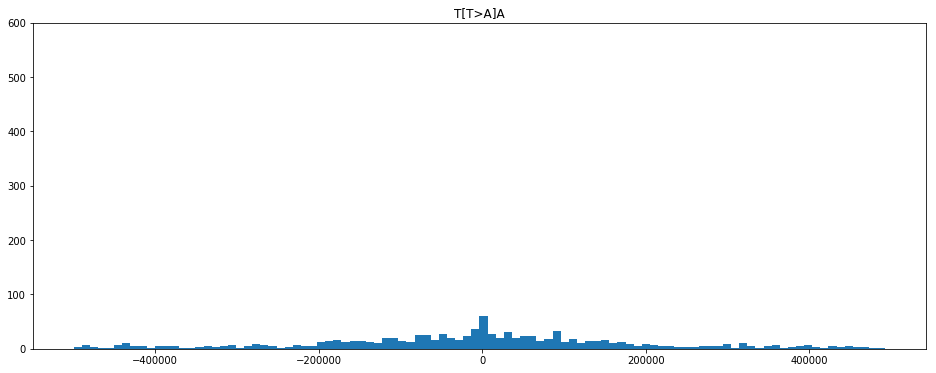

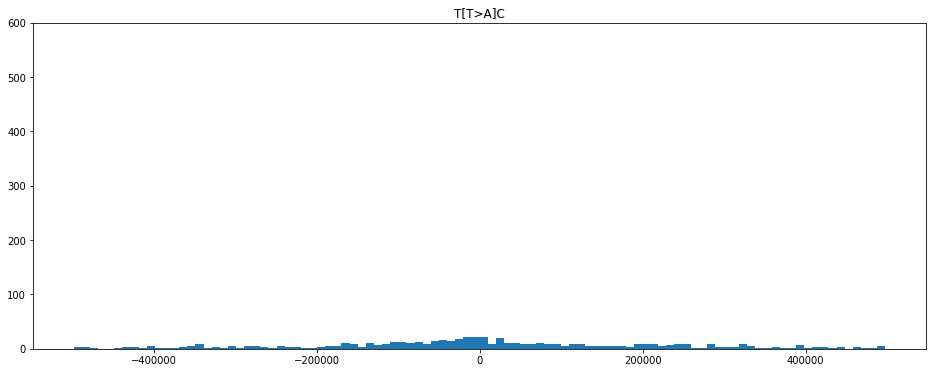

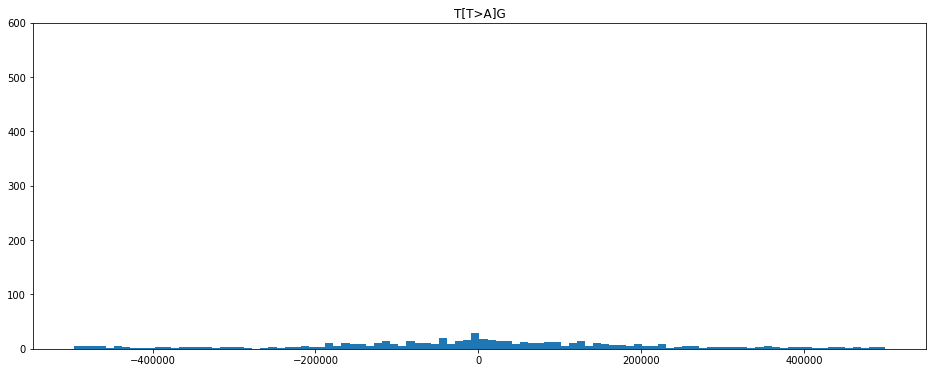

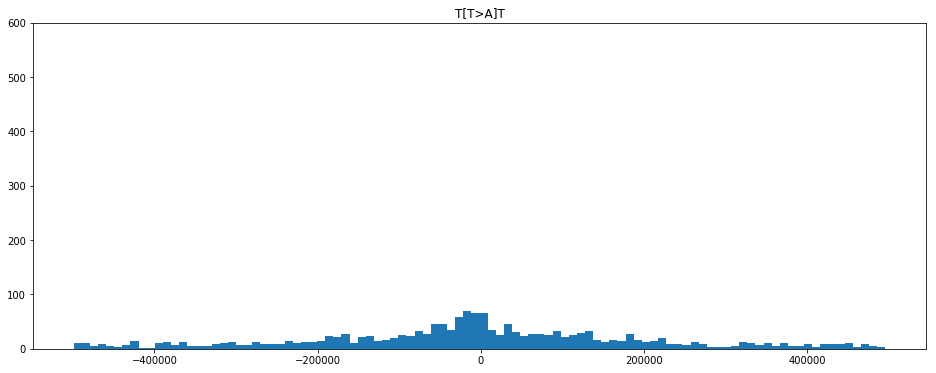

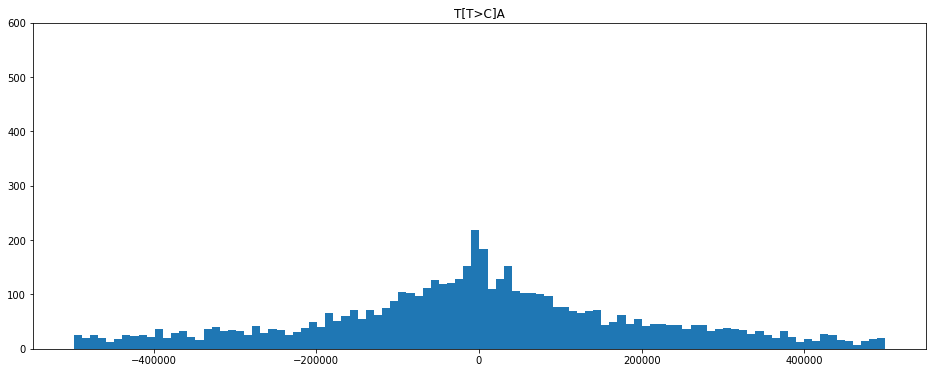

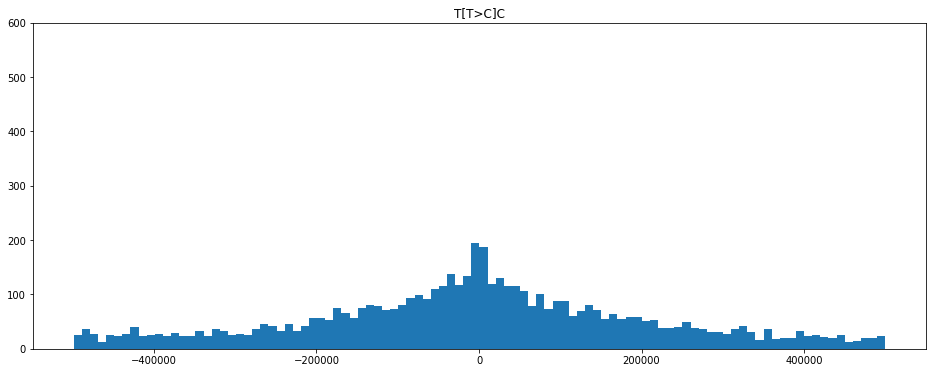

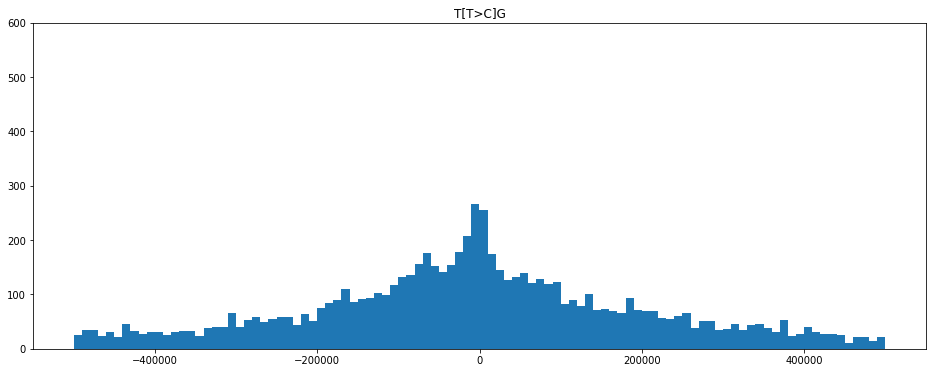

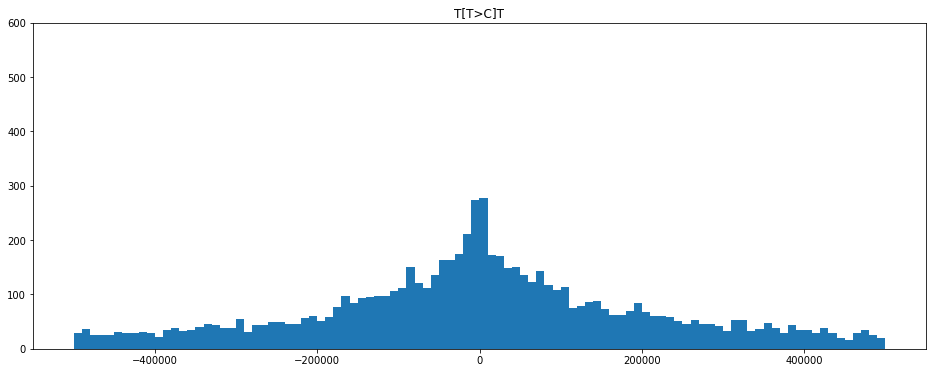

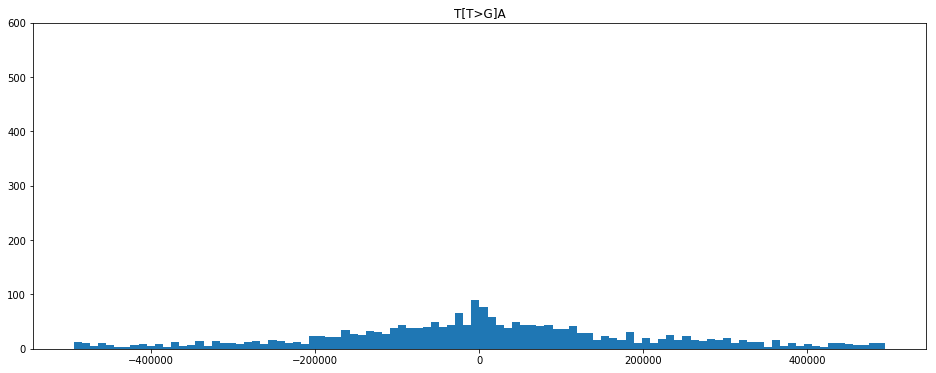

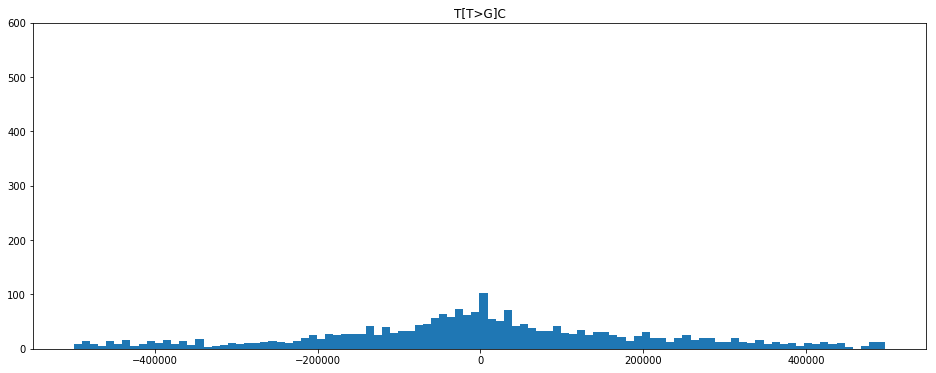

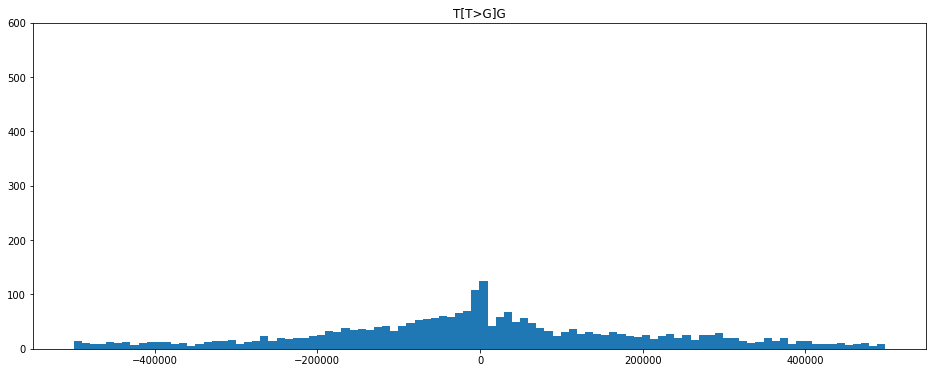

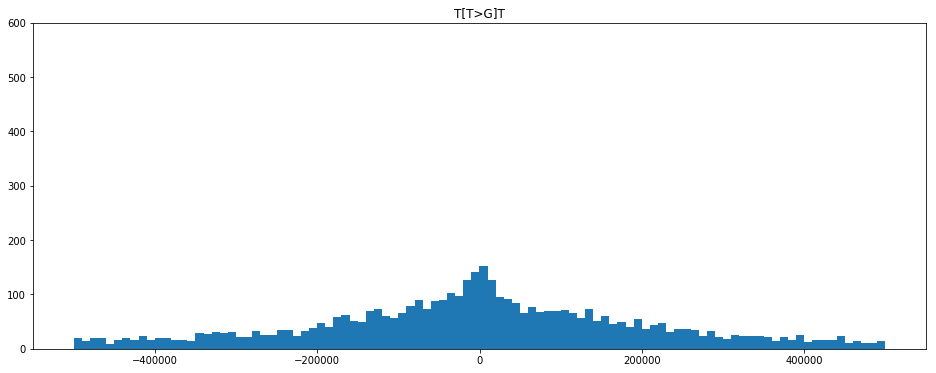

In [18]:
for mut in numpy.sort(df['trinuc_mut'].unique()):
    plt.title(mut)
    plt.ylim(ymax=600)
    plt.hist(df[ (df['trinuc_mut'] == mut ) & ( df['nearest HERV dist'].abs() < 500000 )]['nearest HERV dist'], bins=100)
    plt.show()

In [19]:
df['nearest HERV dist'].median()

-2601.0

In [20]:
df['nearest HERV dist'].mean()

-19054.88673769418

In [21]:
df['nearest HERV dist'].std()

525401.3868971334

In [22]:
df['nearest HERV dist'].var()

276046617353.43134

In [23]:
df[df['trinuc_mut'] == 'C[T>G]T']['nearest HERV dist'].std()

573096.9163416085

In [24]:
df[df['trinuc_mut'] == 'C[C>T]A']['nearest HERV dist'].std()

473609.11788293335

In [25]:
df[df['mut'] == 'C>T']['nearest HERV dist'].std()

487725.229336137

In [26]:
df[df['mut'] == 'C>A']['nearest HERV dist'].std()

541473.4642084152

In [27]:
df[df['mut'] == 'G>A']['nearest HERV dist'].std()

495672.9019737348

In [28]:
df[df['mut'] == 'C>G']['nearest HERV dist'].std()

672382.4922264916

In [29]:
df[df['mut'] == 'A>C']['nearest HERV dist'].std()

541481.6517756984

In [30]:
df['mut'].unique()

array(['C>T', 'C>G', 'A>G', 'T>C', 'G>C', 'G>A', 'T>G', 'G>T', 'C>A',
       'A>T', 'A>C', 'T>A'], dtype=object)

In [31]:
import sys
def printf(format, *args):
    sys.stdout.write(format % args)

In [32]:
numpy.sort(df['mut'].unique())

array(['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T',
       'T>A', 'T>C', 'T>G'], dtype=object)

In [33]:
printf("%4s %8s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['mut'].unique()):
    df_mut=df[df['mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%4s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

 mut    count      mean       median        stdev
 A>C   789488    -19904.74     -1869.50    541481.65
 A>G  2683028    -10681.85     -1303.50    493913.58
 A>T   362615    -59591.38     -5920.00    714784.55
 C>A   819945    -23894.95     -4909.00    541473.46
 C>G   348498    -54110.72    -10212.50    672382.49
 C>T  2722434    -14466.28     -2572.00    487725.23
 G>A  2731668    -14921.61     -2255.00    495672.90
 G>C   355775    -45328.66     -8487.00    667205.27
 G>T   831155    -26692.52     -4027.00    549613.78
 T>A   360430    -50764.30     -6410.00    715772.21
 T>C  2679627    -13808.87     -2011.00    492298.08
 T>G   778734    -21141.84     -2283.50    549461.38


In [34]:
printf("%5s %10s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['trinuc_mut'].unique()):
    df_mut=df[df['trinuc_mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%6s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

  mut      count      mean       median        stdev
A[A>C]A    97622    -14312.90       263.50    529040.36
A[A>C]C    60895    -12049.53      -279.00    527105.13
A[A>C]G    35378    -10837.21     -6848.50    592889.88
A[A>C]T    52155    -21193.12       156.00    550085.59
A[A>G]A   161291     -4758.02      -747.00    498654.50
A[A>G]C   130777    -11051.16     -1664.00    513626.48
A[A>G]G   154185    -15651.04     -1917.00    480312.32
A[A>G]T   215764    -15671.43     -1133.50    481686.41
A[A>T]A    38019    -36882.51     -3216.00    618825.14
A[A>T]C    20938    -89251.08    -13221.00    767770.65
A[A>T]G    25897    -64366.93      -760.00    776229.37
A[A>T]T    31198    -62258.67     -1486.50    660401.13
A[C>A]A   104329    -21762.93     -8111.00    516053.44
A[C>A]C    62795    -19123.19     -5316.00    509791.12
A[C>A]G    34865     -5331.67     -4740.00    529481.12
A[C>A]T    57114    -27515.97      -706.50    573357.83
A[C>G]A    42180    -51557.95    -10352.00    70001

T[A>C]G    21698    -58297.62     -6717.50    604089.58
T[A>C]T    63498     -1080.21       481.50    535794.06
T[A>G]A   125837    -12986.14     -1201.00    496360.16
T[A>G]C   111188     -6734.67      -170.50    491549.70
T[A>G]G   127509     -9421.18     -1480.00    499864.80
T[A>G]T   273543       190.37       237.00    469959.91
T[A>T]A    22800    -50786.72     -1512.00    593297.97
T[A>T]C    13547    -86622.06    -10189.00    723888.72
T[A>T]G    14801    -70182.46    -13604.00    737468.30
T[A>T]T    34580    -10690.91      -793.00    636129.22
T[C>A]A    54245    -34271.66     -8268.00    568572.83
T[C>A]C    41743    -49097.23     -7800.00    553485.44
T[C>A]G    20254    -30667.07      -878.00    585535.44
T[C>A]T    68229      1370.36       227.00    563803.57
T[C>G]A    32547    -75627.97    -10773.00    807657.66
T[C>G]C    23180   -116287.17    -10767.00    741740.33
T[C>G]G    13699    -55498.76     -3738.00    615430.16
T[C>G]T    44289    -49915.36    -10664.00    70

In [35]:
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

from scipy import stats


In [36]:
t, p = stats.ttest_ind(
    df[df['trinuc_mut'] == 'T[C>T]A']['nearest HERV dist'],
    df[df['trinuc_mut'] == 'C[T>G]T']['nearest HERV dist'])
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.2599583526817894
p = 1.5898033336304744


In [37]:
t, p = stats.ttest_ind(
    df[df['trinuc_mut'] == 'T[C>T]A']['nearest HERV dist'],
    df[df['trinuc_mut'] == 'T[C>T]C']['nearest HERV dist'])
print("t = " + str(t))
print("p = " + str(2*p))

t = 2.205272789772945
p = 0.05490231984592787


In [38]:
t, p = stats.ttest_ind(
    df[df['trinuc_mut'] == 'T[C>T]A']['nearest HERV dist'],
    df[df['trinuc_mut'] == 'T[C>T]T']['nearest HERV dist'])
print("t = " + str(t))
print("p = " + str(2*p))

t = -1.232979337402087
p = 0.4352031084446559


In [39]:
t, p = stats.ttest_ind(
    df[df['trinuc_mut'] == 'T[C>T]A']['nearest HERV dist'],
    df[df['trinuc_mut'] == 'T[C>T]G']['nearest HERV dist'])
print("t = " + str(t))
print("p = " + str(2*p))

t = 4.078773365632086
p = 9.099446711205229e-05


scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Parameters:	
a, b : array_like
The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).

axis : int or None, optional
Axis along which to compute test. If None, compute over the whole arrays, a, and b.

equal_var : bool, optional
If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

New in version 0.11.0.

nan_policy : {‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. ‘propagate’ returns nan, ‘raise’ throws an error, ‘omit’ performs the calculations ignoring nan values. Default is ‘propagate’.

Returns:	
statistic : float or array
The calculated t-statistic.

pvalue : float or array
The two-tailed p-value.

In [40]:
trinuc_muts = numpy.sort(df['trinuc_mut'].unique())
ttgrid = pandas.DataFrame(index=trinuc_muts,columns=trinuc_muts)
for mut1 in trinuc_muts:
    for mut2 in trinuc_muts:
        #print("Comparing " + mut1 + " and " + mut2)
        t, p = stats.ttest_ind(
            df[df['trinuc_mut'] == mut1]['nearest HERV dist'],
            df[df['trinuc_mut'] == mut2]['nearest HERV dist'])
        ttgrid[mut1][mut2] = str(round(t,3)) + " / " + str(round(2*p,3))  # WHY 2*p???
        #print (ttgrid[mut1][mut2])
        
#ttgrid[COLUMN][ROW] - seems backwards, nevertheless

ttgrid cells are all t / 2*p (not exactly sure why 2* but that's the way the example showed it)

In [45]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ttgrid)

                A[A>C]A         A[A>C]C         A[A>C]G         A[A>C]T  \
A[A>C]A       0.0 / 2.0    0.19 / 1.698   0.235 / 1.628  -0.542 / 1.175   
A[A>C]C   -0.19 / 1.698       0.0 / 2.0    0.075 / 1.88  -0.654 / 1.027   
A[A>C]G  -0.235 / 1.628   -0.075 / 1.88       0.0 / 2.0  -0.608 / 1.087   
A[A>C]T   0.542 / 1.175   0.654 / 1.027   0.608 / 1.087       0.0 / 2.0   
A[A>G]A  -1.059 / 0.579  -0.694 / 0.975   -0.46 / 1.292  -1.463 / 0.287   
A[A>G]C   -0.34 / 1.468   -0.09 / 1.856   0.015 / 1.975  -0.857 / 0.783   
A[A>G]G    0.15 / 1.761   0.349 / 1.454   0.372 / 1.419   -0.503 / 1.23   
A[A>G]T   0.163 / 1.742   0.368 / 1.426   0.388 / 1.397  -0.524 / 1.201   
A[A>T]A   1.541 / 0.247   1.545 / 0.245   1.334 / 0.365    0.92 / 0.715   
A[A>T]C     3.903 / 0.0     3.697 / 0.0    3.11 / 0.004   3.077 / 0.004   
A[A>T]G   2.787 / 0.011   2.643 / 0.016    2.22 / 0.053    2.055 / 0.08   
A[A>T]T   3.001 / 0.005   2.874 / 0.008    2.429 / 0.03   2.217 / 0.053   
A[C>A]A   0.735 / 0.925  